In [2]:
import json

from schemas.cve import CVE
from utils.cve_utils import find_cve_intersection

# Memcached

In [8]:
memcached_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results/scanning_results_memcached:1.6.32_2024-12-08T12:17:30.652606"
memcached_path_trivy = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_memcached:1.6.32_2025-02-08T15:14:12.818226"

with open(memcached_path_trivy + "/trivy.json", "r") as txt:
    memcached_trivy = json.load(txt)
with open(memcached_path_trivy + "/trivy_sbom.json", "r") as txt:
    memcached_trivy_sbom = json.load(txt)
with open(memcached_path + "/snyk_no_sbom.json", "r") as txt:
    memcached_snyk_no_sbom = json.load(txt)
with open(memcached_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    memcached_grype_no_sbom = json.load(txt)
with open(memcached_path + "/grype_sbom.json", "r") as txt:
    memcached_grype_sbom = json.load(txt)
with open(memcached_path + "/clair.json", "r") as txt:
    memcached_clair = json.load(txt)
with open(memcached_path + "/tool.json", "r") as txt:
    memcached_cve_bin_tool = json.load(txt)
    
memcached_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results/docker_scout_scanning_results_memcached:1.6.32_2024-12-08T23:20:25.949320/docker_scout_no_sbom.json"

with open(memcached_docker_scout_path) as txt:
    memcached_docker_scout = json.load(txt)

In [10]:
len(memcached_trivy_sbom)

10

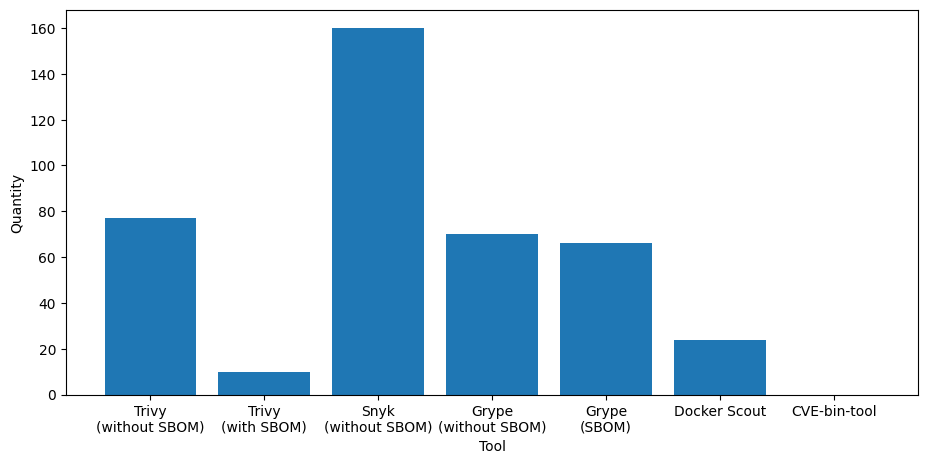

In [6]:
import matplotlib.pyplot as plt
import numpy as np

memcached_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(memcached_trivy), len(memcached_trivy_sbom), len(memcached_snyk_no_sbom), len(memcached_grype_no_sbom), len(memcached_grype_sbom), len(memcached_docker_scout), len(memcached_cve_bin_tool)]
}

x = np.array(memcached_data["Tool"])
y = np.array(memcached_data["Quantity"])

plt.figure(figsize=(11, 5))
plt.xlabel('Tool', fontsize=10)
plt.ylabel('Quantity', fontsize=10)
plt.bar(x,y)
plt.show()

In [4]:
memcached_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), memcached_trivy))
memcached_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), memcached_trivy_sbom))
memcached_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), memcached_snyk_no_sbom))
memcached_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), memcached_grype_no_sbom))
memcached_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), memcached_grype_sbom))
memcached_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), memcached_clair))
memcached_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), memcached_docker_scout))
memcached_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), memcached_cve_bin_tool))

memcached_trivy_no_sbom_intersection = find_cve_intersection(
    memcached_trivy_no_sbom_cve,
    memcached_cve_bin_tool_cve,
)

memcached_trivy_sbom_intersection = find_cve_intersection(
    memcached_trivy_sbom_cve,
    memcached_cve_bin_tool_cve,
)

memcached_snyk_no_sbom_intersection = find_cve_intersection(
    memcached_snyk_no_sbom_cve,
    memcached_cve_bin_tool_cve,
)

memcached_grype_no_sbom_intersection = find_cve_intersection(
    memcached_grype_no_sbom_cve,
    memcached_cve_bin_tool_cve,
)

memcached_grype_sbom_intersection = find_cve_intersection(
    memcached_grype_sbom_cve,
    memcached_cve_bin_tool_cve,
)

memcached_clair_intersection = find_cve_intersection(
    memcached_clair_cve,
    memcached_cve_bin_tool_cve,
)

memcached_docker_scout_intersection = find_cve_intersection(
    memcached_docker_scout_cve,
    memcached_cve_bin_tool_cve,
)

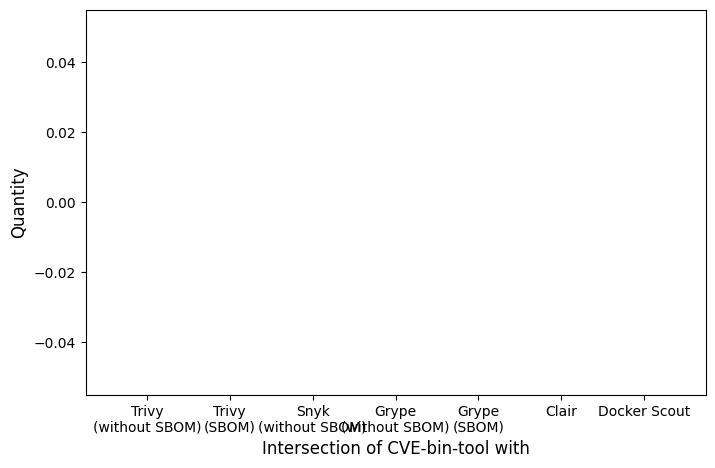

In [61]:
import matplotlib.pyplot as plt

memcached_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(memcached_trivy_no_sbom_intersection), len(memcached_trivy_sbom_intersection), len(memcached_snyk_no_sbom_intersection), len(memcached_grype_no_sbom_intersection), len(memcached_grype_sbom_intersection), len(memcached_clair_intersection), len(memcached_docker_scout_intersection)]
}

x = np.array(memcached_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(memcached_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [5]:
memcached_data = {
    "trivy": len(memcached_trivy),
    "trivy_sbom": len(memcached_trivy_sbom),
    "snyk": len(memcached_snyk_no_sbom),
    "grype": len(memcached_grype_no_sbom),
    "grype_sbom": len(memcached_grype_sbom),
    "clair": len(memcached_clair),
    "docker_scout": len(memcached_docker_scout),
    "cve_bin_tool": len(memcached_cve_bin_tool_cve),
    
    "trivy_intersection": len(memcached_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(memcached_trivy_sbom_intersection),
    "snyk_intersection": len(memcached_snyk_no_sbom_intersection),
    "grype_intersection": len(memcached_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(memcached_grype_sbom_intersection),
    "clair_intersection": len(memcached_clair_intersection),
    "docker_scout_intersection": len(memcached_docker_scout_intersection),
}

# Tensorflow

In [6]:
tensorflow_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_tensorflow_tensorflow:nightly_2024-12-12T21:14:42.184259"

with open(tensorflow_path + "/trivy.json", "r") as txt:
    tensorflow_trivy = json.load(txt)
with open(tensorflow_path + "/trivy_sbom.json", "r") as txt:
    tensorflow_trivy_sbom = json.load(txt)
with open(tensorflow_path + "/snyk_no_sbom.json", "r") as txt:
    tensorflow_snyk_no_sbom = json.load(txt)
with open(tensorflow_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    tensorflow_grype_no_sbom = json.load(txt)
with open(tensorflow_path + "/grype_sbom.json", "r") as txt:
    tensorflow_grype_sbom = json.load(txt)
with open(tensorflow_path + "/clair.json", "r") as txt:
    tensorflow_clair = json.load(txt)
with open(tensorflow_path + "/tool.json", "r") as txt:
    tensorflow_cve_bin_tool = json.load(txt)

tensorflow_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_tensorflow_tensorflow:nightly_2024-12-12T21:14:42.184259/docker_scout_no_sbom.json"

with open(tensorflow_docker_scout_path, "r") as txt:
    tensorflow_docker_scout = json.load(txt)

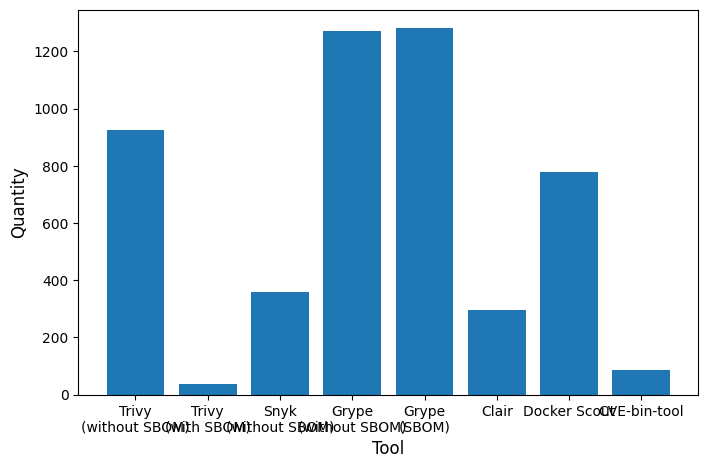

In [27]:
import matplotlib.pyplot as plt
import numpy as np

tensorflow_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(tensorflow_trivy), len(tensorflow_trivy_sbom), len(tensorflow_snyk_no_sbom), len(tensorflow_grype_no_sbom), len(tensorflow_grype_sbom), len(tensorflow_clair), len(tensorflow_docker_scout), len(tensorflow_cve_bin_tool)]
}

x = np.array(tensorflow_data["Tool"])
y = np.array(tensorflow_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [7]:
tensorflow_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), tensorflow_trivy))
tensorflow_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), tensorflow_trivy_sbom))
tensorflow_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), tensorflow_snyk_no_sbom))
tensorflow_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), tensorflow_grype_no_sbom))
tensorflow_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), tensorflow_grype_sbom))
tensorflow_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), tensorflow_clair))
tensorflow_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), tensorflow_docker_scout))
tensorflow_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), tensorflow_cve_bin_tool))

tensorflow_trivy_no_sbom_intersection = find_cve_intersection(
    tensorflow_trivy_no_sbom_cve,
    tensorflow_cve_bin_tool_cve,
)

tensorflow_trivy_sbom_intersection = find_cve_intersection(
    tensorflow_trivy_sbom_cve,
    tensorflow_cve_bin_tool_cve,
)

tensorflow_snyk_no_sbom_intersection = find_cve_intersection(
    tensorflow_snyk_no_sbom_cve,
    tensorflow_cve_bin_tool_cve,
)

tensorflow_grype_no_sbom_intersection = find_cve_intersection(
    tensorflow_grype_no_sbom_cve,
    tensorflow_cve_bin_tool_cve,
)

tensorflow_grype_sbom_intersection = find_cve_intersection(
    tensorflow_grype_sbom_cve,
    tensorflow_cve_bin_tool_cve,
)

tensorflow_clair_intersection = find_cve_intersection(
    tensorflow_clair_cve,
    tensorflow_cve_bin_tool_cve,
)

tensorflow_docker_scout_intersection = find_cve_intersection(
    tensorflow_docker_scout_cve,
    tensorflow_cve_bin_tool_cve,
)

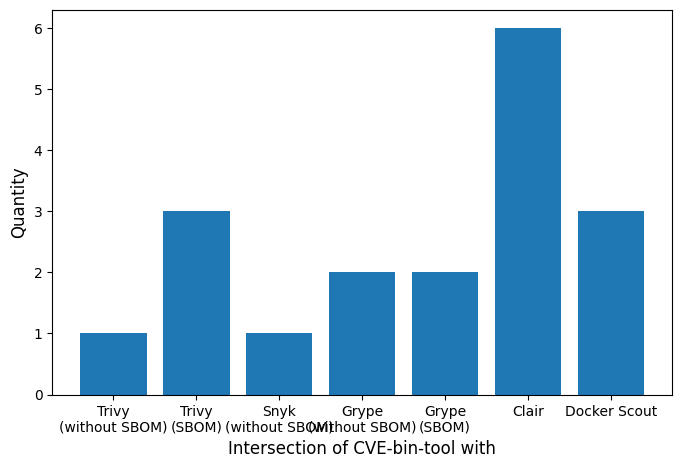

In [64]:
import matplotlib.pyplot as plt

tensorflow_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(trivy_no_sbom_intersection), len(trivy_sbom_intersection), len(snyk_no_sbom_intersection), len(grype_no_sbom_intersection), len(grype_sbom_intersection), len(clair_intersection), len(docker_scout_intersection)]
}

x = np.array(tensorflow_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(tensorflow_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [8]:
tensorflow_data = {
    "trivy": len(tensorflow_trivy),
    "trivy_sbom": len(tensorflow_trivy_sbom),
    "snyk": len(tensorflow_snyk_no_sbom),
    "grype": len(tensorflow_grype_no_sbom),
    "grype_sbom": len(tensorflow_grype_sbom),
    "clair": len(tensorflow_clair),
    "docker_scout": len(tensorflow_docker_scout),
    "cve_bin_tool": len(tensorflow_cve_bin_tool),
    
    "trivy_intersection": len(tensorflow_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(tensorflow_trivy_sbom_intersection),
    "snyk_intersection": len(tensorflow_snyk_no_sbom_intersection),
    "grype_intersection": len(tensorflow_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(tensorflow_grype_sbom_intersection),
    "clair_intersection": len(tensorflow_clair_intersection),
    "docker_scout_intersection": len(tensorflow_docker_scout_intersection),
}

# Nginx

In [9]:
nginx_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_nginx:1.27_2024-12-08T13:10:59.155646"

with open(nginx_path + "/trivy.json", "r") as txt:
    nginx_trivy = json.load(txt)
with open(nginx_path + "/trivy_sbom.json", "r") as txt:
    nginx_trivy_sbom = json.load(txt)
with open(nginx_path + "/snyk_no_sbom.json", "r") as txt:
    nginx_snyk_no_sbom = json.load(txt)
with open(nginx_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    nginx_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_nginx:1.27_2024-12-12T22:49:47.706169/grype_sbom.json", "r") as txt:
    nginx_grype_sbom = json.load(txt)
with open(nginx_path + "/clair.json", "r") as txt:
    nginx_clair = json.load(txt)
with open(nginx_path + "/tool.json", "r") as txt:
    nginx_cve_bin_tool = json.load(txt)

nginx_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_nginx:1.27_2024-12-08T23:49:21.275661/docker_scout_with_sbom.json"

with open(nginx_docker_scout_path, "r") as txt:
    nginx_docker_scout = json.load(txt)

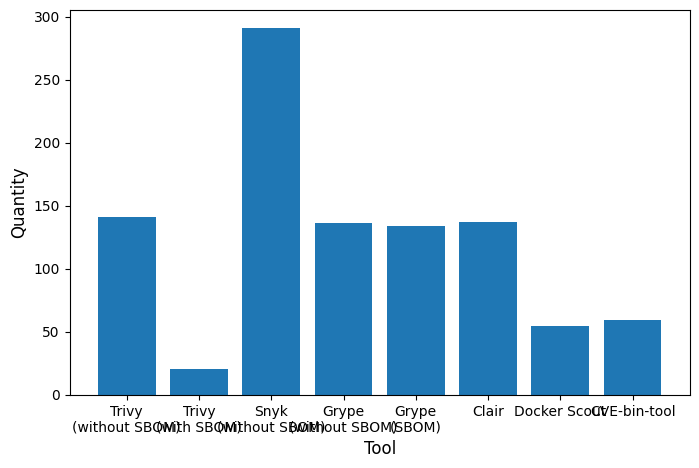

In [39]:
import matplotlib.pyplot as plt
import numpy as np

nginx_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(nginx_trivy), len(nginx_trivy_sbom), len(nginx_snyk_no_sbom), len(nginx_grype_no_sbom), len(nginx_grype_sbom), len(nginx_clair), len(nginx_docker_scout), len(nginx_cve_bin_tool)]
}

x = np.array(nginx_data["Tool"])
y = np.array(nginx_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [10]:
nginx_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), nginx_trivy))
nginx_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), nginx_trivy_sbom))
nginx_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), nginx_snyk_no_sbom))
nginx_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), nginx_grype_no_sbom))
nginx_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), nginx_grype_sbom))
nginx_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), nginx_clair))
nginx_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), nginx_docker_scout))
nginx_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), nginx_cve_bin_tool))

nginx_trivy_no_sbom_intersection = find_cve_intersection(
    nginx_trivy_no_sbom_cve,
    nginx_cve_bin_tool_cve,
)

nginx_trivy_sbom_intersection = find_cve_intersection(
    nginx_trivy_sbom_cve,
    nginx_cve_bin_tool_cve,
)

nginx_snyk_no_sbom_intersection = find_cve_intersection(
    nginx_snyk_no_sbom_cve,
    nginx_cve_bin_tool_cve,
)

nginx_grype_no_sbom_intersection = find_cve_intersection(
    nginx_grype_no_sbom_cve,
    nginx_cve_bin_tool_cve,
)

nginx_grype_sbom_intersection = find_cve_intersection(
    nginx_grype_sbom_cve,
    nginx_cve_bin_tool_cve,
)

nginx_clair_intersection = find_cve_intersection(
    nginx_clair_cve,
    nginx_cve_bin_tool_cve,
)

nginx_docker_scout_intersection = find_cve_intersection(
    nginx_docker_scout_cve,
    nginx_cve_bin_tool_cve,
)

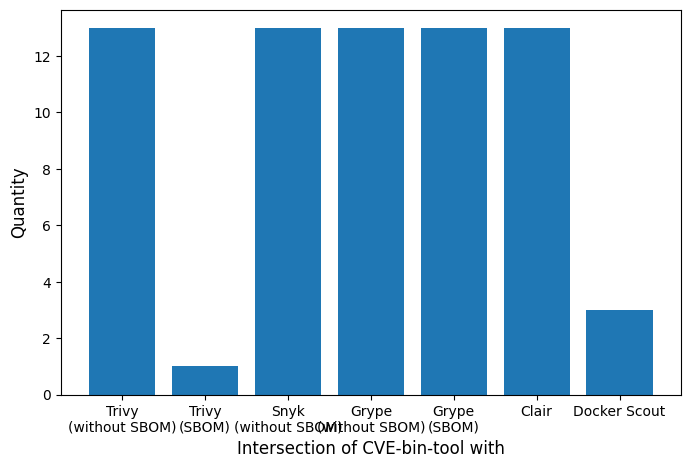

In [37]:
import matplotlib.pyplot as plt

nginx_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(nginx_trivy_no_sbom_intersection), len(nginx_trivy_sbom_intersection), len(nginx_snyk_no_sbom_intersection), len(nginx_grype_no_sbom_intersection), len(nginx_grype_sbom_intersection), len(nginx_clair_intersection), len(nginx_docker_scout_intersection)]
}

x = np.array(nginx_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(nginx_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [11]:
nginx_data = {
    "trivy": len(nginx_trivy),
    "trivy_sbom": len(nginx_trivy_sbom),
    "snyk": len(nginx_snyk_no_sbom),
    "grype": len(nginx_grype_no_sbom),
    "grype_sbom": len(nginx_grype_sbom),
    "clair": len(nginx_clair),
    "docker_scout": len(nginx_docker_scout),
    "cve_bin_tool": len(nginx_cve_bin_tool),
    
    "trivy_intersection": len(nginx_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(nginx_trivy_sbom_intersection),
    "snyk_intersection": len(nginx_snyk_no_sbom_intersection),
    "grype_intersection": len(nginx_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(nginx_grype_sbom_intersection),
    "clair_intersection": len(nginx_clair_intersection),
    "docker_scout_intersection": len(nginx_docker_scout_intersection),
}

# Busybox

In [12]:
busybox_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_busybox:1.37_2024-12-08T13:16:27.308560"

with open(busybox_path + "/trivy.json", "r") as txt:
    busybox_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_busybox:1.37_2024-12-12T21:03:04.299166/trivy_sbom.json", "r") as txt:
    busybox_trivy_sbom = json.load(txt)
with open(busybox_path + "/snyk_no_sbom.json", "r") as txt:
    busybox_snyk_no_sbom = json.load(txt)
with open(busybox_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    busybox_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_busybox:1.37_2024-12-12T22:49:53.789241/grype_sbom.json", "r") as txt:
    busybox_grype_sbom = json.load(txt)
with open(busybox_path + "/clair.json", "r") as txt:
    busybox_clair = json.load(txt)
with open(busybox_path + "/tool.json", "r") as txt:
    busybox_cve_bin_tool = json.load(txt)

busybox_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_busybox:1.37_2024-12-08T23:49:28.657910/docker_scout_with_sbom.json"

with open(busybox_docker_scout_path, "r") as txt:
    busybox_docker_scout = json.load(txt)

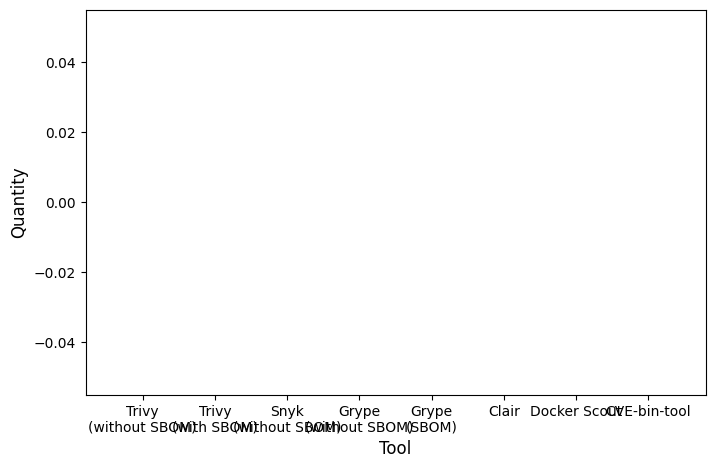

In [43]:
import matplotlib.pyplot as plt
import numpy as np

busybox_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(busybox_trivy), len(busybox_trivy_sbom), len(busybox_snyk_no_sbom), len(busybox_grype_no_sbom), len(busybox_grype_sbom), len(busybox_clair), len(busybox_docker_scout), len(busybox_cve_bin_tool)]
}

x = np.array(busybox_data["Tool"])
y = np.array(busybox_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [13]:
busybox_data = {
    "trivy": len(busybox_trivy),
    "trivy_sbom": len(busybox_trivy_sbom),
    "snyk": len(busybox_snyk_no_sbom),
    "grype": len(busybox_grype_no_sbom),
    "grype_sbom": len(busybox_grype_sbom),
    "clair": len(busybox_clair),
    "docker_scout": len(busybox_docker_scout),
    "cve_bin_tool": len(busybox_cve_bin_tool),
    
    "trivy_intersection": 0,
    "trivy_sbom_intersection": 0,
    "snyk_intersection": 0,
    "grype_intersection": 0,
    "grype_sbom_intersection": 0,
    "clair_intersection": 0,
    "docker_scout_intersection": 0,
}

# Alpine

In [14]:
alpine_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_alpine:3.20_2024-12-08T13:16:36.263571"

with open(alpine_path + "/trivy.json", "r") as txt:
    alpine_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_alpine:3.20_2024-12-12T21:03:05.801069/trivy_sbom.json", "r") as txt:
    alpine_trivy_sbom = json.load(txt)
with open(alpine_path + "/snyk_no_sbom.json", "r") as txt:
    alpine_snyk_no_sbom = json.load(txt)
with open(alpine_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    alpine_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_alpine:3.20_2024-12-12T22:49:55.628791/grype_sbom.json", "r") as txt:
    alpine_grype_sbom = json.load(txt)
with open(alpine_path + "/clair.json", "r") as txt:
    alpine_clair = json.load(txt)
with open(alpine_path + "/tool.json", "r") as txt:
    alpine_cve_bin_tool = json.load(txt)

alpine_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_alpine:3.20_2024-12-08T23:49:31.942411/docker_scout_with_sbom.json"

with open(alpine_docker_scout_path, "r") as txt:
    alpine_docker_scout = json.load(txt)

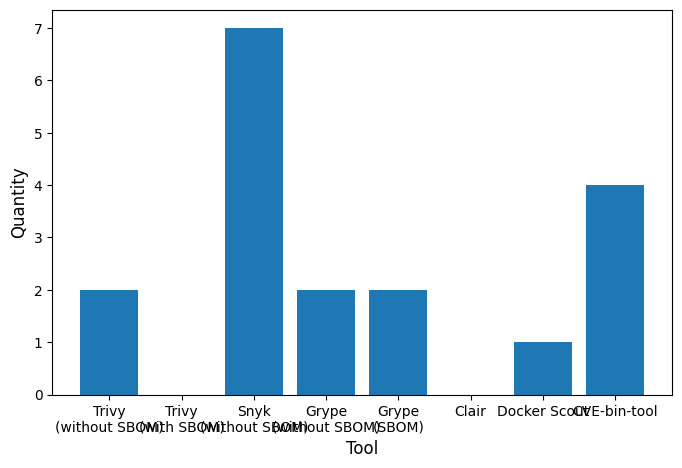

In [70]:
import matplotlib.pyplot as plt
import numpy as np

alpine_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(alpine_trivy), len(alpine_trivy_sbom), len(alpine_snyk_no_sbom), len(alpine_grype_no_sbom), len(alpine_grype_sbom), len(alpine_clair), len(alpine_docker_scout), len(alpine_cve_bin_tool)]
}

x = np.array(alpine_data["Tool"])
y = np.array(alpine_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [15]:
alpine_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), alpine_trivy))
alpine_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), alpine_trivy_sbom))
alpine_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), alpine_snyk_no_sbom))
alpine_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), alpine_grype_no_sbom))
alpine_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), alpine_grype_sbom))
alpine_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), alpine_clair))
alpine_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), alpine_docker_scout))
alpine_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), alpine_cve_bin_tool))

alpine_trivy_no_sbom_intersection = find_cve_intersection(
    alpine_trivy_no_sbom_cve,
    alpine_cve_bin_tool_cve,
)

alpine_trivy_sbom_intersection = find_cve_intersection(
    alpine_trivy_sbom_cve,
    alpine_cve_bin_tool_cve,
)

alpine_snyk_no_sbom_intersection = find_cve_intersection(
    alpine_snyk_no_sbom_cve,
    alpine_cve_bin_tool_cve,
)

alpine_grype_no_sbom_intersection = find_cve_intersection(
    alpine_grype_no_sbom_cve,
    alpine_cve_bin_tool_cve,
)

alpine_grype_sbom_intersection = find_cve_intersection(
    alpine_grype_sbom_cve,
    alpine_cve_bin_tool_cve,
)

alpine_clair_intersection = find_cve_intersection(
    alpine_clair_cve,
    alpine_cve_bin_tool_cve,
)

alpine_docker_scout_intersection = find_cve_intersection(
    alpine_docker_scout_cve,
    alpine_cve_bin_tool_cve,
)

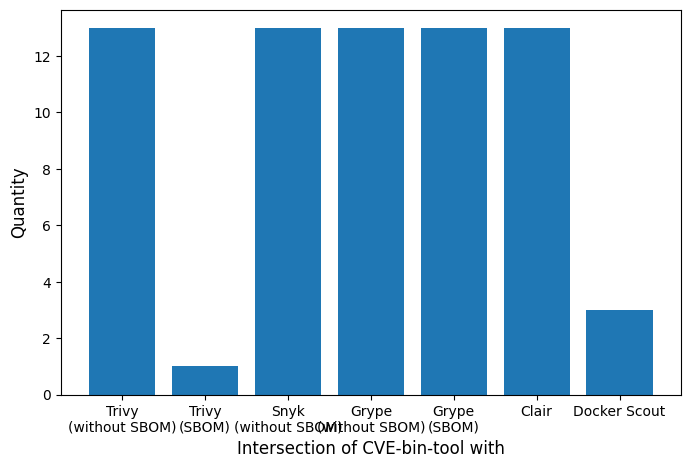

In [72]:
import matplotlib.pyplot as plt

nginx_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(nginx_trivy_no_sbom_intersection), len(nginx_trivy_sbom_intersection), len(nginx_snyk_no_sbom_intersection), len(nginx_grype_no_sbom_intersection), len(nginx_grype_sbom_intersection), len(nginx_clair_intersection), len(nginx_docker_scout_intersection)]
}

x = np.array(nginx_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(nginx_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [16]:
alpine_data = {
    "trivy": len(alpine_trivy),
    "trivy_sbom": len(alpine_trivy_sbom),
    "snyk": len(alpine_snyk_no_sbom),
    "grype": len(alpine_grype_no_sbom),
    "grype_sbom": len(alpine_grype_sbom),
    "clair": len(alpine_clair),
    "docker_scout": len(alpine_docker_scout),
    "cve_bin_tool": len(alpine_cve_bin_tool),
    
    "trivy_intersection": len(alpine_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(alpine_trivy_sbom_intersection),
    "snyk_intersection": len(alpine_snyk_no_sbom_intersection),
    "grype_intersection": len(alpine_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(alpine_grype_sbom_intersection),
    "clair_intersection": len(alpine_clair_intersection),
    "docker_scout_intersection": len(alpine_docker_scout_intersection),
}

# Ubuntu

In [17]:
ubuntu_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_ubuntu:25.04_2024-12-08T15:07:04.829029"

with open(ubuntu_path + "/trivy.json", "r") as txt:
    ubuntu_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_ubuntu:25.04_2024-12-12T21:03:07.455793/trivy_sbom.json", "r") as txt:
    ubuntu_trivy_sbom = json.load(txt)
with open(ubuntu_path + "/snyk_no_sbom.json", "r") as txt:
    ubuntu_snyk_no_sbom = json.load(txt)
with open(ubuntu_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    ubuntu_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_ubuntu:25.04_2024-12-12T22:49:57.529764/grype_sbom.json", "r") as txt:
    ubuntu_grype_sbom = json.load(txt)
with open(ubuntu_path + "/clair.json", "r") as txt:
    ubuntu_clair = json.load(txt)
with open(ubuntu_path + "/tool.json", "r") as txt:
    ubuntu_cve_bin_tool = json.load(txt)

ubuntu_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_ubuntu:25.04_2024-12-08T23:49:35.294025/docker_scout_with_sbom.json"

with open(ubuntu_docker_scout_path, "r") as txt:
    ubuntu_docker_scout = json.load(txt)

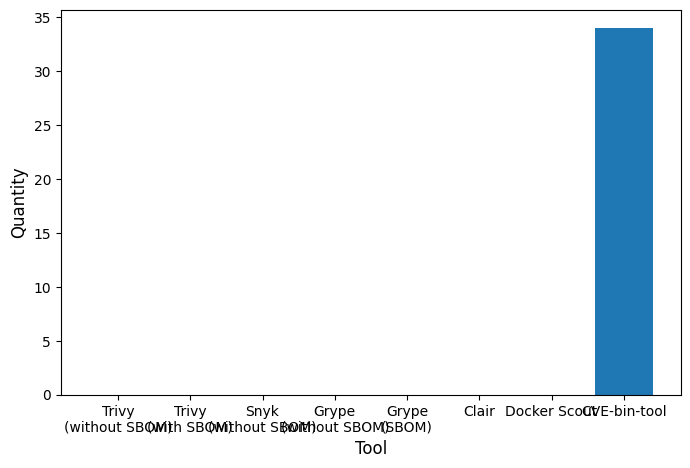

In [75]:
import matplotlib.pyplot as plt
import numpy as np

ubuntu_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(ubuntu_trivy), len(ubuntu_trivy_sbom), len(ubuntu_snyk_no_sbom), len(ubuntu_grype_no_sbom), len(ubuntu_grype_sbom), len(ubuntu_clair), len(ubuntu_docker_scout), len(ubuntu_cve_bin_tool)]
}

x = np.array(ubuntu_data["Tool"])
y = np.array(ubuntu_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [18]:
ubuntu_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), ubuntu_trivy))
ubuntu_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), ubuntu_trivy_sbom))
ubuntu_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), ubuntu_snyk_no_sbom))
ubuntu_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), ubuntu_grype_no_sbom))
ubuntu_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), ubuntu_grype_sbom))
ubuntu_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), ubuntu_clair))
ubuntu_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), ubuntu_docker_scout))
ubuntu_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), ubuntu_cve_bin_tool))

ubuntu_trivy_no_sbom_intersection = find_cve_intersection(
    ubuntu_trivy_no_sbom_cve,
    ubuntu_cve_bin_tool_cve,
)

ubuntu_trivy_sbom_intersection = find_cve_intersection(
    ubuntu_trivy_sbom_cve,
    ubuntu_cve_bin_tool_cve,
)

ubuntu_snyk_no_sbom_intersection = find_cve_intersection(
    ubuntu_snyk_no_sbom_cve,
    ubuntu_cve_bin_tool_cve,
)

ubuntu_grype_no_sbom_intersection = find_cve_intersection(
    ubuntu_grype_no_sbom_cve,
    ubuntu_cve_bin_tool_cve,
)

ubuntu_grype_sbom_intersection = find_cve_intersection(
    ubuntu_grype_sbom_cve,
    ubuntu_cve_bin_tool_cve,
)

ubuntu_clair_intersection = find_cve_intersection(
    ubuntu_clair_cve,
    ubuntu_cve_bin_tool_cve,
)

ubuntu_docker_scout_intersection = find_cve_intersection(
    ubuntu_docker_scout_cve,
    ubuntu_cve_bin_tool_cve,
)

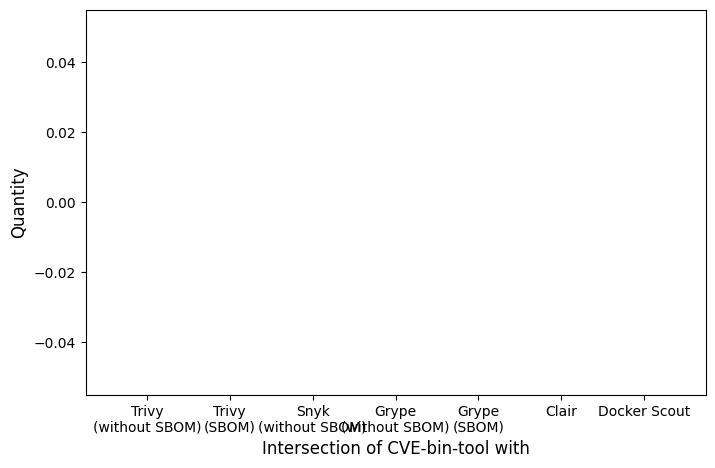

In [80]:
import matplotlib.pyplot as plt

ubuntu_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(ubuntu_trivy_no_sbom_intersection), len(ubuntu_trivy_sbom_intersection), len(ubuntu_snyk_no_sbom_intersection), len(ubuntu_grype_no_sbom_intersection), len(ubuntu_grype_sbom_intersection), len(ubuntu_clair_intersection), len(ubuntu_docker_scout_intersection)]
}

x = np.array(ubuntu_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(ubuntu_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [19]:
ubuntu_data = {
    "trivy": len(ubuntu_trivy),
    "trivy_sbom": len(ubuntu_trivy_sbom),
    "snyk": len(ubuntu_snyk_no_sbom),
    "grype": len(ubuntu_grype_no_sbom),
    "grype_sbom": len(ubuntu_grype_sbom),
    "clair": len(ubuntu_clair),
    "docker_scout": len(ubuntu_docker_scout),
    "cve_bin_tool": len(ubuntu_cve_bin_tool),
    
    "trivy_intersection": len(ubuntu_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(ubuntu_trivy_sbom_intersection),
    "snyk_intersection": len(ubuntu_snyk_no_sbom_intersection),
    "grype_intersection": len(ubuntu_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(ubuntu_grype_sbom_intersection),
    "clair_intersection": len(ubuntu_clair_intersection),
    "docker_scout_intersection": len(ubuntu_docker_scout_intersection),
}

# Redis

In [20]:
redis_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_redis:7.4_2024-12-08T15:22:16.145420"

with open(redis_path + "/trivy.json", "r") as txt:
    redis_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_redis:7.4_2024-12-12T21:03:10.792281/trivy_sbom.json", "r") as txt:
    redis_trivy_sbom = json.load(txt)
with open(redis_path + "/snyk_no_sbom.json", "r") as txt:
    redis_snyk_no_sbom = json.load(txt)
with open(redis_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    redis_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_redis:7.4_2024-12-12T22:50:01.698131/grype_sbom.json", "r") as txt:
    redis_grype_sbom = json.load(txt)
with open(redis_path + "/clair.json", "r") as txt:
    redis_clair = json.load(txt)
with open(redis_path + "/tool.json", "r") as txt:
    redis_cve_bin_tool = json.load(txt)

redis_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_redis:7.4_2024-12-08T23:49:40.829246/docker_scout_with_sbom.json"

with open(redis_docker_scout_path, "r") as txt:
    redis_docker_scout = json.load(txt)

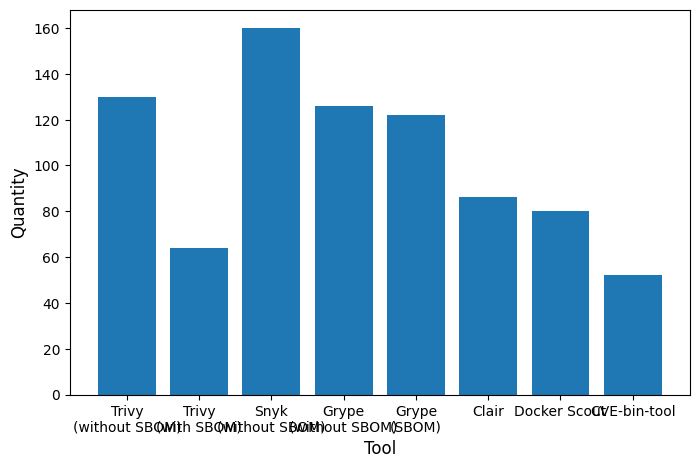

In [85]:
import matplotlib.pyplot as plt
import numpy as np

redis_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(redis_trivy), len(redis_trivy_sbom), len(redis_snyk_no_sbom), len(redis_grype_no_sbom), len(redis_grype_sbom), len(redis_clair), len(redis_docker_scout), len(redis_cve_bin_tool)]
}

x = np.array(redis_data["Tool"])
y = np.array(redis_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [21]:
redis_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), redis_trivy))
redis_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), redis_trivy_sbom))
redis_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), redis_snyk_no_sbom))
redis_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), redis_grype_no_sbom))
redis_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), redis_grype_sbom))
redis_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), redis_clair))
redis_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), redis_docker_scout))
redis_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), redis_cve_bin_tool))

redis_trivy_no_sbom_intersection = find_cve_intersection(
    redis_trivy_no_sbom_cve,
    redis_cve_bin_tool_cve,
)

redis_trivy_sbom_intersection = find_cve_intersection(
    redis_trivy_sbom_cve,
    redis_cve_bin_tool_cve,
)

redis_snyk_no_sbom_intersection = find_cve_intersection(
    redis_snyk_no_sbom_cve,
    redis_cve_bin_tool_cve,
)

redis_grype_no_sbom_intersection = find_cve_intersection(
    redis_grype_no_sbom_cve,
    redis_cve_bin_tool_cve,
)

redis_grype_sbom_intersection = find_cve_intersection(
    redis_grype_sbom_cve,
    redis_cve_bin_tool_cve,
)

redis_clair_intersection = find_cve_intersection(
    redis_clair_cve,
    redis_cve_bin_tool_cve,
)

redis_docker_scout_intersection = find_cve_intersection(
    redis_docker_scout_cve,
    redis_cve_bin_tool_cve,
)

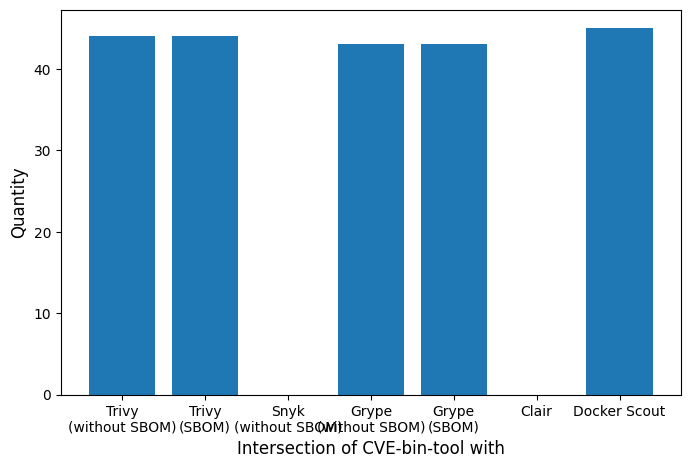

In [87]:
import matplotlib.pyplot as plt

redis_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(redis_trivy_no_sbom_intersection), len(redis_trivy_sbom_intersection), len(redis_snyk_no_sbom_intersection), len(redis_grype_no_sbom_intersection), len(redis_grype_sbom_intersection), len(redis_clair_intersection), len(redis_docker_scout_intersection)]
}

x = np.array(redis_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(redis_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [22]:
redis_data = {
    "trivy": len(redis_trivy),
    "trivy_sbom": len(redis_trivy_sbom),
    "snyk": len(redis_snyk_no_sbom),
    "grype": len(redis_grype_no_sbom),
    "grype_sbom": len(redis_grype_sbom),
    "clair": len(redis_clair),
    "docker_scout": len(redis_docker_scout),
    "cve_bin_tool": len(redis_cve_bin_tool),
    
    "trivy_intersection": len(redis_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(redis_trivy_sbom_intersection),
    "snyk_intersection": len(redis_snyk_no_sbom_intersection),
    "grype_intersection": len(redis_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(redis_grype_sbom_intersection),
    "clair_intersection": len(redis_clair_intersection),
    "docker_scout_intersection": len(redis_docker_scout_intersection),
}

# Postgres

In [23]:
postgres_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_postgres:16.6_2024-12-08T15:23:45.607589"

with open(postgres_path + "/trivy.json", "r") as txt:
    postgres_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_postgres:16.6_2024-12-12T21:03:14.885103/trivy_sbom.json", "r") as txt:
    postgres_trivy_sbom = json.load(txt)
with open(postgres_path + "/snyk_no_sbom.json", "r") as txt:
    postgres_snyk_no_sbom = json.load(txt)
with open(postgres_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    postgres_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_postgres:16.6_2024-12-12T22:50:06.756873/grype_sbom.json", "r") as txt:
    postgres_grype_sbom = json.load(txt)
with open(postgres_path + "/clair.json", "r") as txt:
    postgres_clair = json.load(txt)
with open(postgres_path + "/tool.json", "r") as txt:
    postgres_cve_bin_tool = json.load(txt)

postgres_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_postgres:16.6_2024-12-08T23:49:47.015439/docker_scout_with_sbom.json"

with open(postgres_docker_scout_path, "r") as txt:
    postgres_docker_scout = json.load(txt)

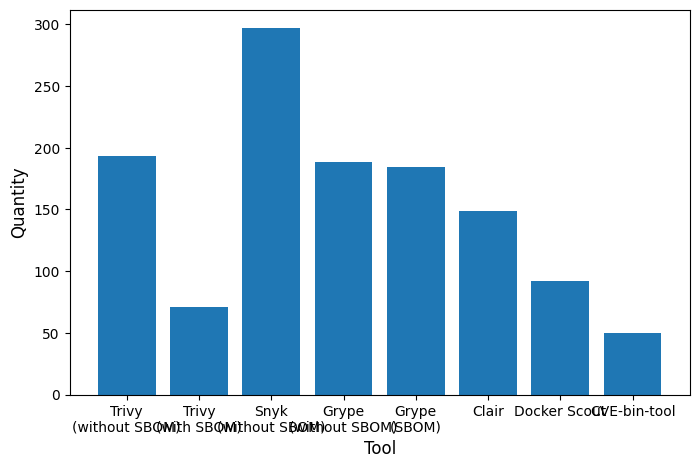

In [96]:
import matplotlib.pyplot as plt
import numpy as np

postgres_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(postgres_trivy), len(postgres_trivy_sbom), len(postgres_snyk_no_sbom), len(postgres_grype_no_sbom), len(postgres_grype_sbom), len(postgres_clair), len(postgres_docker_scout), len(postgres_cve_bin_tool)]
}

x = np.array(postgres_data["Tool"])
y = np.array(postgres_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [24]:
postgres_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), postgres_trivy))
postgres_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), postgres_trivy_sbom))
postgres_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), postgres_snyk_no_sbom))
postgres_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), postgres_grype_no_sbom))
postgres_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), postgres_grype_sbom))
postgres_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), postgres_clair))
postgres_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), postgres_docker_scout))
postgres_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), postgres_cve_bin_tool))

postgres_trivy_no_sbom_intersection = find_cve_intersection(
    postgres_trivy_no_sbom_cve,
    postgres_cve_bin_tool_cve,
)

postgres_trivy_sbom_intersection = find_cve_intersection(
    postgres_trivy_sbom_cve,
    postgres_cve_bin_tool_cve,
)

postgres_snyk_no_sbom_intersection = find_cve_intersection(
    postgres_snyk_no_sbom_cve,
    postgres_cve_bin_tool_cve,
)

postgres_grype_no_sbom_intersection = find_cve_intersection(
    postgres_grype_no_sbom_cve,
    postgres_cve_bin_tool_cve,
)

postgres_grype_sbom_intersection = find_cve_intersection(
    postgres_grype_sbom_cve,
    postgres_cve_bin_tool_cve,
)

postgres_clair_intersection = find_cve_intersection(
    postgres_clair_cve,
    postgres_cve_bin_tool_cve,
)

postgres_docker_scout_intersection = find_cve_intersection(
    postgres_docker_scout_cve,
    postgres_cve_bin_tool_cve,
)

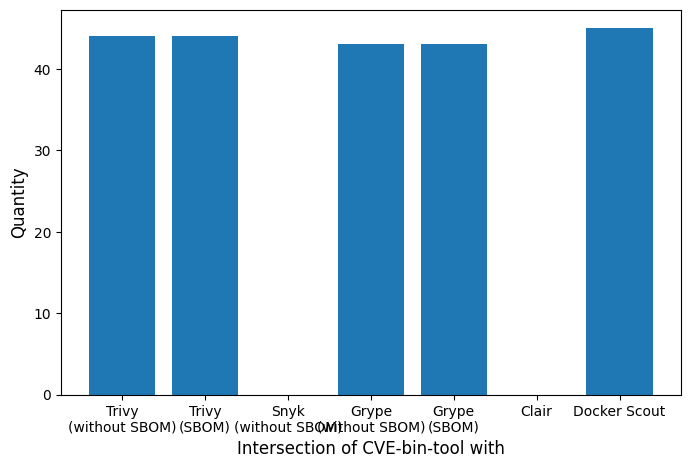

In [98]:
import matplotlib.pyplot as plt

postgres_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(postgres_trivy_no_sbom_intersection), len(postgres_trivy_sbom_intersection), len(postgres_snyk_no_sbom_intersection), len(postgres_grype_no_sbom_intersection), len(postgres_grype_sbom_intersection), len(postgres_clair_intersection), len(postgres_docker_scout_intersection)]
}

x = np.array(postgres_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(postgres_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [25]:
postgres_data = {
    "trivy": len(postgres_trivy),
    "trivy_sbom": len(postgres_trivy_sbom),
    "snyk": len(postgres_snyk_no_sbom),
    "grype": len(postgres_grype_no_sbom),
    "grype_sbom": len(postgres_grype_sbom),
    "clair": len(postgres_clair),
    "docker_scout": len(postgres_docker_scout),
    "cve_bin_tool": len(postgres_cve_bin_tool),
    
    "trivy_intersection": len(postgres_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(postgres_trivy_sbom_intersection),
    "snyk_intersection": len(postgres_snyk_no_sbom_intersection),
    "grype_intersection": len(postgres_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(postgres_grype_sbom_intersection),
    "clair_intersection": len(postgres_clair_intersection),
    "docker_scout_intersection": len(postgres_docker_scout_intersection),
}

# Python

In [26]:
python_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_python:3.13_2024-12-08T15:26:00.782369"

with open(python_path + "/trivy.json", "r") as txt:
    python_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_python:3.13_2024-12-12T21:03:24.055925/trivy_sbom.json", "r") as txt:
    python_trivy_sbom = json.load(txt)
with open(python_path + "/snyk_no_sbom.json", "r") as txt:
    python_snyk_no_sbom = json.load(txt)
with open(python_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    python_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_python:3.13_2024-12-12T22:50:18.697067/grype_sbom.json", "r") as txt:
    python_grype_sbom = json.load(txt)
with open(python_path + "/clair.json", "r") as txt:
    python_clair = json.load(txt)
with open(python_path + "/tool.json", "r") as txt:
    python_cve_bin_tool = json.load(txt)

python_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_python:3.13_2024-12-08T23:49:59.883650/docker_scout_with_sbom.json"

with open(python_docker_scout_path, "r") as txt:
    python_docker_scout = json.load(txt)

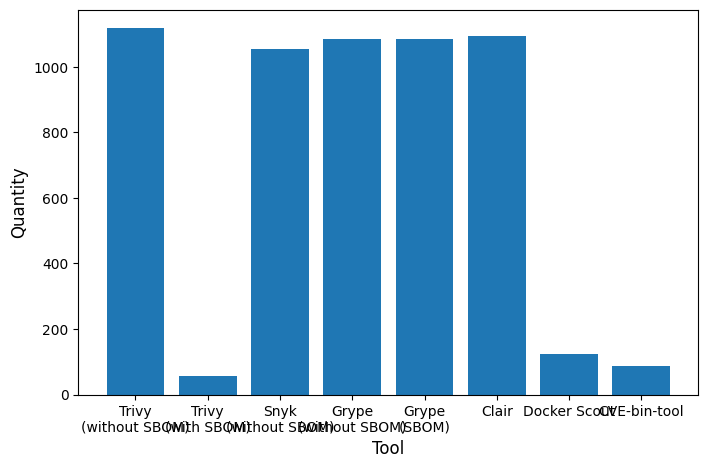

In [103]:
import matplotlib.pyplot as plt
import numpy as np

python_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(python_trivy), len(python_trivy_sbom), len(python_snyk_no_sbom), len(python_grype_no_sbom), len(python_grype_sbom), len(python_clair), len(python_docker_scout), len(python_cve_bin_tool)]
}

x = np.array(python_data["Tool"])
y = np.array(python_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [27]:
python_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), python_trivy))
python_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), python_trivy_sbom))
python_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), python_snyk_no_sbom))
python_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), python_grype_no_sbom))
python_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), python_grype_sbom))
python_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), python_clair))
python_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), python_docker_scout))
python_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), python_cve_bin_tool))

python_trivy_no_sbom_intersection = find_cve_intersection(
    python_trivy_no_sbom_cve,
    python_cve_bin_tool_cve,
)

python_trivy_sbom_intersection = find_cve_intersection(
    python_trivy_sbom_cve,
    python_cve_bin_tool_cve,
)

python_snyk_no_sbom_intersection = find_cve_intersection(
    python_snyk_no_sbom_cve,
    python_cve_bin_tool_cve,
)

python_grype_no_sbom_intersection = find_cve_intersection(
    python_grype_no_sbom_cve,
    python_cve_bin_tool_cve,
)

python_grype_sbom_intersection = find_cve_intersection(
    python_grype_sbom_cve,
    python_cve_bin_tool_cve,
)

python_clair_intersection = find_cve_intersection(
    python_clair_cve,
    python_cve_bin_tool_cve,
)

python_docker_scout_intersection = find_cve_intersection(
    python_docker_scout_cve,
    python_cve_bin_tool_cve,
)

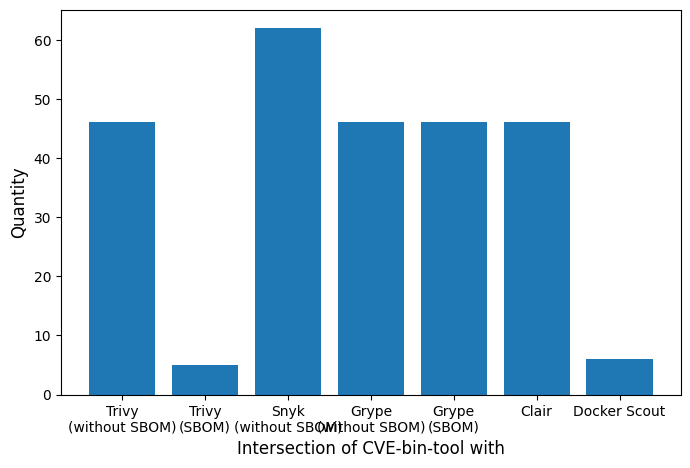

In [105]:
import matplotlib.pyplot as plt

python_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(python_trivy_no_sbom_intersection), len(python_trivy_sbom_intersection), len(python_snyk_no_sbom_intersection), len(python_grype_no_sbom_intersection), len(python_grype_sbom_intersection), len(python_clair_intersection), len(python_docker_scout_intersection)]
}

x = np.array(python_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(python_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [28]:
python_data = {
    "trivy": len(python_trivy),
    "trivy_sbom": len(python_trivy_sbom),
    "snyk": len(python_snyk_no_sbom),
    "grype": len(python_grype_no_sbom),
    "grype_sbom": len(python_grype_sbom),
    "clair": len(python_clair),
    "docker_scout": len(python_docker_scout),
    "cve_bin_tool": len(python_cve_bin_tool),
    
    "trivy_intersection": len(python_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(python_trivy_sbom_intersection),
    "snyk_intersection": len(python_snyk_no_sbom_intersection),
    "grype_intersection": len(python_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(python_grype_sbom_intersection),
    "clair_intersection": len(python_clair_intersection),
    "docker_scout_intersection": len(python_docker_scout_intersection),
}

# Node

In [29]:
node_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_node:23_2024-12-08T15:35:41.530462"

with open(node_path + "/trivy.json", "r") as txt:
    node_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_node:23_2024-12-12T21:03:44.176438/trivy_sbom.json", "r") as txt:
    node_trivy_sbom = json.load(txt)
with open(node_path + "/snyk_no_sbom.json", "r") as txt:
    node_snyk_no_sbom = json.load(txt)
with open(node_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    node_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_node:23_2024-12-12T22:50:46.385475/grype_sbom.json", "r") as txt:
    node_grype_sbom = json.load(txt)
with open(node_path + "/clair.json", "r") as txt:
    node_clair = json.load(txt)
with open(node_path + "/tool.json", "r") as txt:
    node_cve_bin_tool = json.load(txt)

node_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_node:23_2024-12-08T23:50:28.387150/docker_scout_with_sbom.json"

with open(node_docker_scout_path, "r") as txt:
    node_docker_scout = json.load(txt)

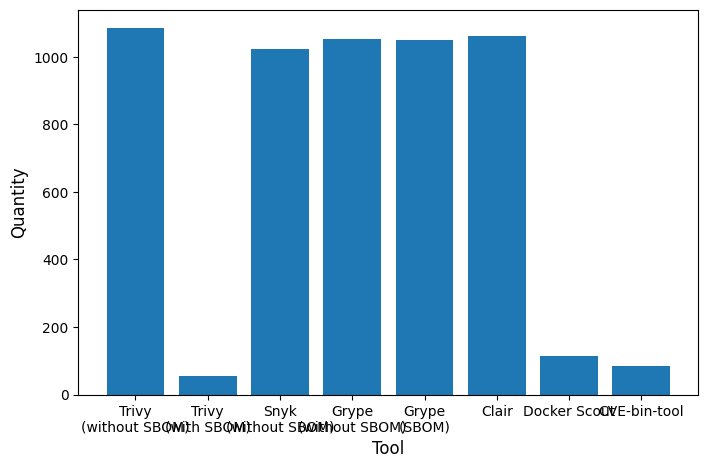

In [119]:
import matplotlib.pyplot as plt
import numpy as np

node_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(node_trivy), len(node_trivy_sbom), len(node_snyk_no_sbom), len(node_grype_no_sbom), len(node_grype_sbom), len(node_clair), len(node_docker_scout), len(node_cve_bin_tool)]
}

x = np.array(node_data["Tool"])
y = np.array(node_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [120]:
# print(len(python_trivy))
# print(len(node_trivy))
# print(len(python_trivy_no_sbom_intersection))
# print(len(node_trivy_no_sbom_intersection))

In [30]:
node_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), node_trivy))
node_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), node_trivy_sbom))
node_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), node_snyk_no_sbom))
node_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), node_grype_no_sbom))
node_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), node_grype_sbom))
node_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), node_clair))
node_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), node_docker_scout))
node_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), node_cve_bin_tool))

node_trivy_no_sbom_intersection = find_cve_intersection(
    node_trivy_no_sbom_cve,
    node_cve_bin_tool_cve,
)

node_trivy_sbom_intersection = find_cve_intersection(
    node_trivy_sbom_cve,
    node_cve_bin_tool_cve,
)

node_snyk_no_sbom_intersection = find_cve_intersection(
    node_snyk_no_sbom_cve,
    node_cve_bin_tool_cve,
)

node_grype_no_sbom_intersection = find_cve_intersection(
    node_grype_no_sbom_cve,
    node_cve_bin_tool_cve,
)

node_grype_sbom_intersection = find_cve_intersection(
    node_grype_sbom_cve,
    node_cve_bin_tool_cve,
)

node_clair_intersection = find_cve_intersection(
    node_clair_cve,
    node_cve_bin_tool_cve,
)

node_docker_scout_intersection = find_cve_intersection(
    node_docker_scout_cve,
    node_cve_bin_tool_cve,
)

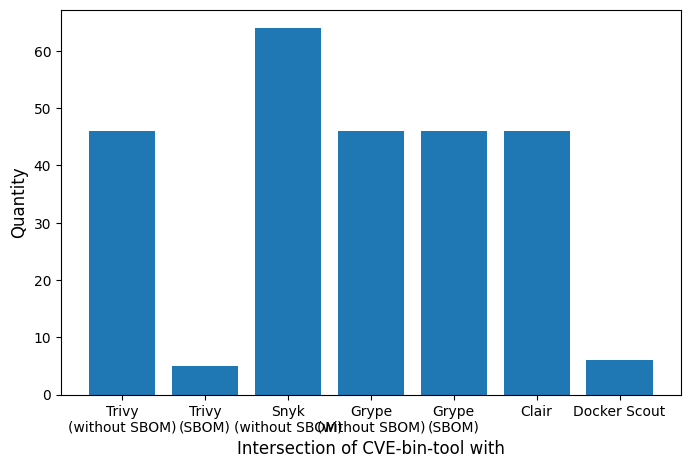

In [122]:
import matplotlib.pyplot as plt

node_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(node_trivy_no_sbom_intersection), len(node_trivy_sbom_intersection), len(node_snyk_no_sbom_intersection), len(node_grype_no_sbom_intersection), len(node_grype_sbom_intersection), len(node_clair_intersection), len(node_docker_scout_intersection)]
}

x = np.array(node_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(node_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [31]:
node_data = {
    "trivy": len(node_trivy),
    "trivy_sbom": len(node_trivy_sbom),
    "snyk": len(node_snyk_no_sbom),
    "grype": len(node_grype_no_sbom),
    "grype_sbom": len(node_grype_sbom),
    "clair": len(node_clair),
    "docker_scout": len(node_docker_scout),
    "cve_bin_tool": len(node_cve_bin_tool),
    
    "trivy_intersection": len(node_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(node_trivy_sbom_intersection),
    "snyk_intersection": len(node_snyk_no_sbom_intersection),
    "grype_intersection": len(node_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(node_grype_sbom_intersection),
    "clair_intersection": len(node_clair_intersection),
    "docker_scout_intersection": len(node_docker_scout_intersection),
}

# httpd

In [32]:
httpd_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_httpd:2.4.62_2024-12-08T15:47:45.938648"

with open(httpd_path + "/trivy.json", "r") as txt:
    httpd_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_httpd:2.4.62_2024-12-12T21:04:06.365216/trivy_sbom.json", "r") as txt:
    httpd_trivy_sbom = json.load(txt)
with open(httpd_path + "/snyk_no_sbom.json", "r") as txt:
    httpd_snyk_no_sbom = json.load(txt)
with open(httpd_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    httpd_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_httpd:2.4.62_2024-12-12T22:51:14.469501/grype_sbom.json", "r") as txt:
    httpd_grype_sbom = json.load(txt)
with open(httpd_path + "/clair.json", "r") as txt:
    httpd_clair = json.load(txt)
with open(httpd_path + "/tool.json", "r") as txt:
    httpd_cve_bin_tool = json.load(txt)

httpd_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_httpd:2.4.62_2024-12-08T23:50:55.460446/docker_scout_with_sbom.json"

with open(httpd_docker_scout_path, "r") as txt:
    httpd_docker_scout = json.load(txt)

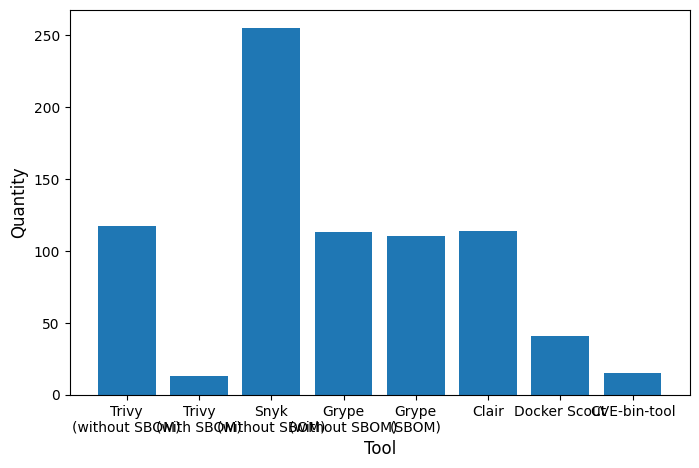

In [113]:
import matplotlib.pyplot as plt
import numpy as np

httpd_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(httpd_trivy), len(httpd_trivy_sbom), len(httpd_snyk_no_sbom), len(httpd_grype_no_sbom),
                 len(httpd_grype_sbom), len(httpd_clair), len(httpd_docker_scout), len(httpd_cve_bin_tool)]
}

x = np.array(httpd_data["Tool"])
y = np.array(httpd_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [33]:
httpd_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), httpd_trivy))
httpd_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), httpd_trivy_sbom))
httpd_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), httpd_snyk_no_sbom))
httpd_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), httpd_grype_no_sbom))
httpd_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), httpd_grype_sbom))
httpd_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), httpd_clair))
httpd_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), httpd_docker_scout))
httpd_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), httpd_cve_bin_tool))

httpd_trivy_no_sbom_intersection = find_cve_intersection(
    httpd_trivy_no_sbom_cve,
    httpd_cve_bin_tool_cve,
)

httpd_trivy_sbom_intersection = find_cve_intersection(
    httpd_trivy_sbom_cve,
    httpd_cve_bin_tool_cve,
)

httpd_snyk_no_sbom_intersection = find_cve_intersection(
    httpd_snyk_no_sbom_cve,
    httpd_cve_bin_tool_cve,
)

httpd_grype_no_sbom_intersection = find_cve_intersection(
    httpd_grype_no_sbom_cve,
    httpd_cve_bin_tool_cve,
)

httpd_grype_sbom_intersection = find_cve_intersection(
    httpd_grype_sbom_cve,
    httpd_cve_bin_tool_cve,
)

httpd_clair_intersection = find_cve_intersection(
    httpd_clair_cve,
    httpd_cve_bin_tool_cve,
)

httpd_docker_scout_intersection = find_cve_intersection(
    httpd_docker_scout_cve,
    httpd_cve_bin_tool_cve,
)

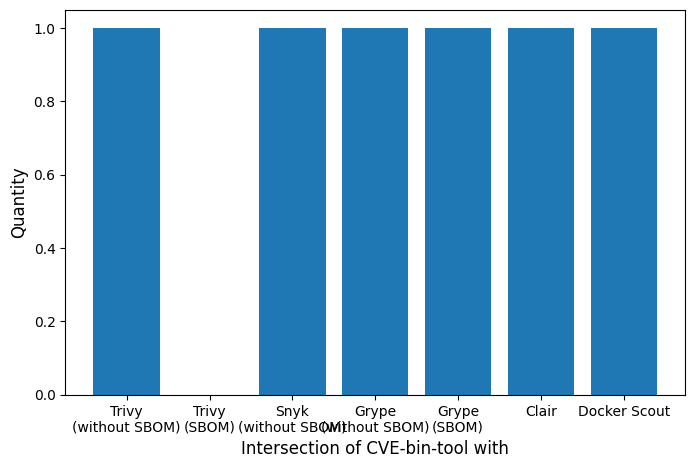

In [125]:
import matplotlib.pyplot as plt

httpd_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(httpd_trivy_no_sbom_intersection), len(httpd_trivy_sbom_intersection), len(httpd_snyk_no_sbom_intersection), len(httpd_grype_no_sbom_intersection), len(httpd_grype_sbom_intersection), len(httpd_clair_intersection), len(httpd_docker_scout_intersection)]
}

x = np.array(httpd_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(httpd_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [34]:
httpd_data = {
    "trivy": len(httpd_trivy),
    "trivy_sbom": len(httpd_trivy_sbom),
    "snyk": len(httpd_snyk_no_sbom),
    "grype": len(httpd_grype_no_sbom),
    "grype_sbom": len(httpd_grype_sbom),
    "clair": len(httpd_clair),
    "docker_scout": len(httpd_docker_scout),
    "cve_bin_tool": len(httpd_cve_bin_tool),
    
    "trivy_intersection": len(httpd_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(httpd_trivy_sbom_intersection),
    "snyk_intersection": len(httpd_snyk_no_sbom_intersection),
    "grype_intersection": len(httpd_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(httpd_grype_sbom_intersection),
    "clair_intersection": len(httpd_clair_intersection),
    "docker_scout_intersection": len(httpd_docker_scout_intersection),
}

# Mongo

In [35]:
mongo_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_mongo:8.0_2024-12-08T16:21:11.753258"

with open(mongo_path + "/trivy.json", "r") as txt:
    mongo_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_mongo:8.0_2024-12-12T21:04:10.918335/trivy_sbom.json", "r") as txt:
    mongo_trivy_sbom = json.load(txt)
with open(mongo_path + "/snyk_no_sbom.json", "r") as txt:
    mongo_snyk_no_sbom = json.load(txt)
with open(mongo_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    mongo_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_mongo:8.0_2024-12-12T22:51:20.922812/grype_sbom.json", "r") as txt:
    mongo_grype_sbom = json.load(txt)
with open(mongo_path + "/clair.json", "r") as txt:
    mongo_clair = json.load(txt)
with open(mongo_path + "/tool.json", "r") as txt:
    mongo_cve_bin_tool = json.load(txt)

mongo_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_mongo:8.0_2024-12-08T23:51:02.561020/docker_scout_with_sbom.json"

with open(mongo_docker_scout_path, "r") as txt:
    mongo_docker_scout = json.load(txt)

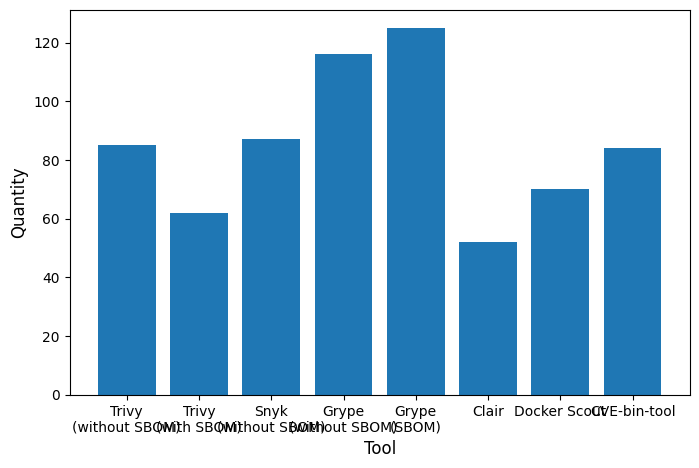

In [127]:
import matplotlib.pyplot as plt
import numpy as np

mongo_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(mongo_trivy), len(mongo_trivy_sbom), len(mongo_snyk_no_sbom), len(mongo_grype_no_sbom),
                 len(mongo_grype_sbom), len(mongo_clair), len(mongo_docker_scout), len(mongo_cve_bin_tool)]
}

x = np.array(mongo_data["Tool"])
y = np.array(mongo_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [36]:
mongo_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mongo_trivy))
mongo_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mongo_trivy_sbom))
mongo_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mongo_snyk_no_sbom))
mongo_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mongo_grype_no_sbom))
mongo_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mongo_grype_sbom))
mongo_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mongo_clair))
mongo_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mongo_docker_scout))
mongo_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mongo_cve_bin_tool))

mongo_trivy_no_sbom_intersection = find_cve_intersection(
    mongo_trivy_no_sbom_cve,
    mongo_cve_bin_tool_cve,
)

mongo_trivy_sbom_intersection = find_cve_intersection(
    mongo_trivy_sbom_cve,
    mongo_cve_bin_tool_cve,
)

mongo_snyk_no_sbom_intersection = find_cve_intersection(
    mongo_snyk_no_sbom_cve,
    mongo_cve_bin_tool_cve,
)

mongo_grype_no_sbom_intersection = find_cve_intersection(
    mongo_grype_no_sbom_cve,
    mongo_cve_bin_tool_cve,
)

mongo_grype_sbom_intersection = find_cve_intersection(
    mongo_grype_sbom_cve,
    mongo_cve_bin_tool_cve,
)

mongo_clair_intersection = find_cve_intersection(
    mongo_clair_cve,
    mongo_cve_bin_tool_cve,
)

mongo_docker_scout_intersection = find_cve_intersection(
    mongo_docker_scout_cve,
    mongo_cve_bin_tool_cve,
)

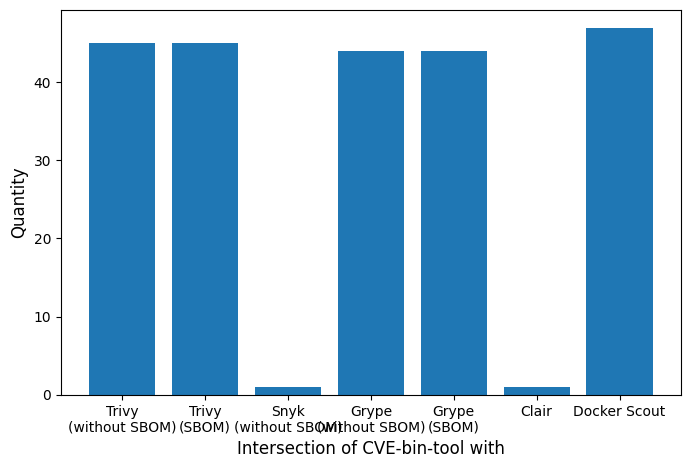

In [129]:
import matplotlib.pyplot as plt

mongo_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(mongo_trivy_no_sbom_intersection), len(mongo_trivy_sbom_intersection), len(mongo_snyk_no_sbom_intersection), len(mongo_grype_no_sbom_intersection), len(mongo_grype_sbom_intersection), len(mongo_clair_intersection), len(mongo_docker_scout_intersection)]
}

x = np.array(mongo_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(mongo_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()


In [37]:
mongo_data = {
    "trivy": len(mongo_trivy),
    "trivy_sbom": len(mongo_trivy_sbom),
    "snyk": len(mongo_snyk_no_sbom),
    "grype": len(mongo_grype_no_sbom),
    "grype_sbom": len(mongo_grype_sbom),
    "clair": len(mongo_clair),
    "docker_scout": len(mongo_docker_scout),
    "cve_bin_tool": len(mongo_cve_bin_tool),
    
    "trivy_intersection": len(mongo_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(mongo_trivy_sbom_intersection),
    "snyk_intersection": len(mongo_snyk_no_sbom_intersection),
    "grype_intersection": len(mongo_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(mongo_grype_sbom_intersection),
    "clair_intersection": len(mongo_clair_intersection),
    "docker_scout_intersection": len(mongo_docker_scout_intersection),
}

# RabbitMQ

In [38]:
rabbitmq_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_rabbitmq:4_2024-12-08T16:37:14.525319"

with open(rabbitmq_path + "/trivy.json", "r") as txt:
    rabbitmq_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_rabbitmq:4_2024-12-12T21:04:30.751264/trivy_sbom.json", "r") as txt:
    rabbitmq_trivy_sbom = json.load(txt)
with open(rabbitmq_path + "/snyk_no_sbom.json", "r") as txt:
    rabbitmq_snyk_no_sbom = json.load(txt)
with open(rabbitmq_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    rabbitmq_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_rabbitmq:4_2024-12-12T22:51:46.492654/grype_sbom.json", "r") as txt:
    rabbitmq_grype_sbom = json.load(txt)
with open(rabbitmq_path + "/clair.json", "r") as txt:
    rabbitmq_clair = json.load(txt)
with open(rabbitmq_path + "/tool.json", "r") as txt:
    rabbitmq_cve_bin_tool = json.load(txt)

rabbitmq_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_rabbitmq:4_2024-12-08T23:51:28.199713/docker_scout_with_sbom.json"

with open(rabbitmq_docker_scout_path, "r") as txt:
    rabbitmq_docker_scout = json.load(txt)

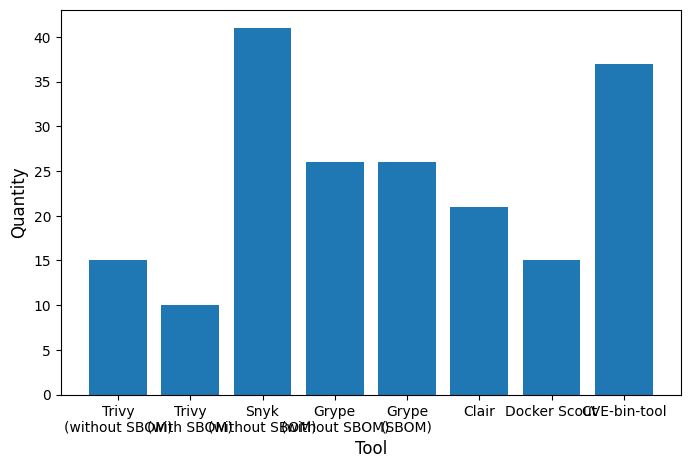

In [131]:
import matplotlib.pyplot as plt
import numpy as np

rabbitmq_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(rabbitmq_trivy), len(rabbitmq_trivy_sbom), len(rabbitmq_snyk_no_sbom), len(rabbitmq_grype_no_sbom),
                 len(rabbitmq_grype_sbom), len(rabbitmq_clair), len(rabbitmq_docker_scout), len(rabbitmq_cve_bin_tool)]
}

x = np.array(rabbitmq_data["Tool"])
y = np.array(rabbitmq_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [39]:
rabbitmq_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rabbitmq_trivy))
rabbitmq_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rabbitmq_trivy_sbom))
rabbitmq_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rabbitmq_snyk_no_sbom))
rabbitmq_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rabbitmq_grype_no_sbom))
rabbitmq_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rabbitmq_grype_sbom))
rabbitmq_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rabbitmq_clair))
rabbitmq_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rabbitmq_docker_scout))
rabbitmq_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rabbitmq_cve_bin_tool))

rabbitmq_trivy_no_sbom_intersection = find_cve_intersection(
    rabbitmq_trivy_no_sbom_cve,
    rabbitmq_cve_bin_tool_cve,
)

rabbitmq_trivy_sbom_intersection = find_cve_intersection(
    rabbitmq_trivy_sbom_cve,
    rabbitmq_cve_bin_tool_cve,
)

rabbitmq_snyk_no_sbom_intersection = find_cve_intersection(
    rabbitmq_snyk_no_sbom_cve,
    rabbitmq_cve_bin_tool_cve,
)

rabbitmq_grype_no_sbom_intersection = find_cve_intersection(
    rabbitmq_grype_no_sbom_cve,
    rabbitmq_cve_bin_tool_cve,
)

rabbitmq_grype_sbom_intersection = find_cve_intersection(
    rabbitmq_grype_sbom_cve,
    rabbitmq_cve_bin_tool_cve,
)

rabbitmq_clair_intersection = find_cve_intersection(
    rabbitmq_clair_cve,
    rabbitmq_cve_bin_tool_cve,
)

rabbitmq_docker_scout_intersection = find_cve_intersection(
    rabbitmq_docker_scout_cve,
    rabbitmq_cve_bin_tool_cve,
)

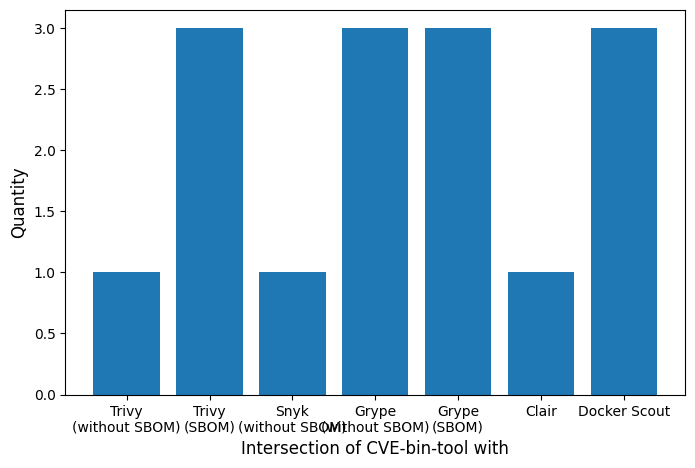

In [133]:
import matplotlib.pyplot as plt

rabbitmq_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(rabbitmq_trivy_no_sbom_intersection), len(rabbitmq_trivy_sbom_intersection), len(rabbitmq_snyk_no_sbom_intersection), len(rabbitmq_grype_no_sbom_intersection), len(rabbitmq_grype_sbom_intersection), len(rabbitmq_clair_intersection), len(rabbitmq_docker_scout_intersection)]
}

x = np.array(rabbitmq_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(rabbitmq_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [40]:
rabbitmq_data = {
    "trivy": len(rabbitmq_trivy),
    "trivy_sbom": len(rabbitmq_trivy_sbom),
    "snyk": len(rabbitmq_snyk_no_sbom),
    "grype": len(rabbitmq_grype_no_sbom),
    "grype_sbom": len(rabbitmq_grype_sbom),
    "clair": len(rabbitmq_clair),
    "docker_scout": len(rabbitmq_docker_scout),
    "cve_bin_tool": len(rabbitmq_cve_bin_tool),
    
    "trivy_intersection": len(rabbitmq_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(rabbitmq_trivy_sbom_intersection),
    "snyk_intersection": len(rabbitmq_snyk_no_sbom_intersection),
    "grype_intersection": len(rabbitmq_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(rabbitmq_grype_sbom_intersection),
    "clair_intersection": len(rabbitmq_clair_intersection),
    "docker_scout_intersection": len(rabbitmq_docker_scout_intersection),
}

# MariaDB

In [41]:
mariadb_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_mariadb:11_2024-12-08T16:50:18.212835"

with open(mariadb_path + "/trivy.json", "r") as txt:
    mariadb_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_mariadb:11_2024-12-12T21:04:35.559961/trivy_sbom.json", "r") as txt:
    mariadb_trivy_sbom = json.load(txt)
with open(mariadb_path + "/snyk_no_sbom.json", "r") as txt:
    mariadb_snyk_no_sbom = json.load(txt)
with open(mariadb_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    mariadb_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_mariadb:11_2024-12-12T22:51:53.332160/grype_sbom.json", "r") as txt:
    mariadb_grype_sbom = json.load(txt)
with open(mariadb_path + "/clair.json", "r") as txt:
    mariadb_clair = json.load(txt)
with open(mariadb_path + "/tool.json", "r") as txt:
    mariadb_cve_bin_tool = json.load(txt)

mariadb_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_mariadb:11_2024-12-08T23:51:37.811637/docker_scout_with_sbom.json"

with open(mariadb_docker_scout_path, "r") as txt:
    mariadb_docker_scout = json.load(txt)

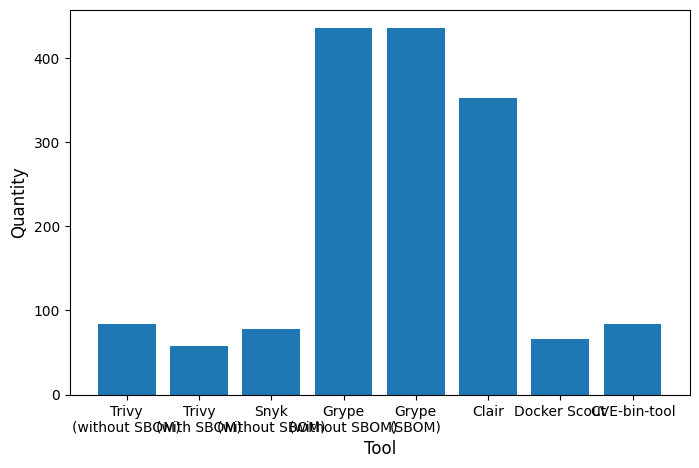

In [137]:
import matplotlib.pyplot as plt
import numpy as np

mariadb_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(mariadb_trivy), len(mariadb_trivy_sbom), len(mariadb_snyk_no_sbom), len(mariadb_grype_no_sbom),
                 len(mariadb_grype_sbom), len(mariadb_clair), len(mariadb_docker_scout), len(mariadb_cve_bin_tool)]
}

x = np.array(mariadb_data["Tool"])
y = np.array(mariadb_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [42]:
mariadb_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mariadb_trivy))
mariadb_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mariadb_trivy_sbom))
mariadb_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mariadb_snyk_no_sbom))
mariadb_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mariadb_grype_no_sbom))
mariadb_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mariadb_grype_sbom))
mariadb_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mariadb_clair))
mariadb_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mariadb_docker_scout))
mariadb_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mariadb_cve_bin_tool))

mariadb_trivy_no_sbom_intersection = find_cve_intersection(
    mariadb_trivy_no_sbom_cve,
    mariadb_cve_bin_tool_cve,
)

mariadb_trivy_sbom_intersection = find_cve_intersection(
    mariadb_trivy_sbom_cve,
    mariadb_cve_bin_tool_cve,
)

mariadb_snyk_no_sbom_intersection = find_cve_intersection(
    mariadb_snyk_no_sbom_cve,
    mariadb_cve_bin_tool_cve,
)

mariadb_grype_no_sbom_intersection = find_cve_intersection(
    mariadb_grype_no_sbom_cve,
    mariadb_cve_bin_tool_cve,
)

mariadb_grype_sbom_intersection = find_cve_intersection(
    mariadb_grype_sbom_cve,
    mariadb_cve_bin_tool_cve,
)

mariadb_clair_intersection = find_cve_intersection(
    mariadb_clair_cve,
    mariadb_cve_bin_tool_cve,
)

mariadb_docker_scout_intersection = find_cve_intersection(
    mariadb_docker_scout_cve,
    mariadb_cve_bin_tool_cve,
)

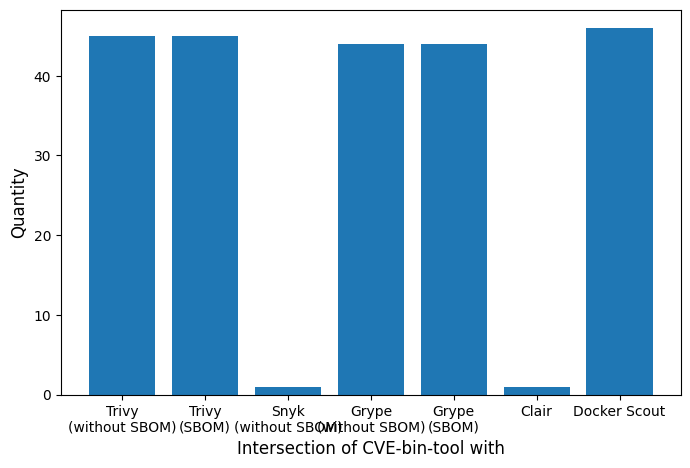

In [140]:
import matplotlib.pyplot as plt

mariadb_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(mariadb_trivy_no_sbom_intersection), len(mariadb_trivy_sbom_intersection), len(mariadb_snyk_no_sbom_intersection), len(mariadb_grype_no_sbom_intersection), len(mariadb_grype_sbom_intersection), len(mariadb_clair_intersection), len(mariadb_docker_scout_intersection)]
}

x = np.array(mariadb_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(mariadb_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [43]:
mariadb_data = {
    "trivy": len(mariadb_trivy),
    "trivy_sbom": len(mariadb_trivy_sbom),
    "snyk": len(mariadb_snyk_no_sbom),
    "grype": len(mariadb_grype_no_sbom),
    "grype_sbom": len(mariadb_grype_sbom),
    "clair": len(mariadb_clair),
    "docker_scout": len(mariadb_docker_scout),
    "cve_bin_tool": len(mariadb_cve_bin_tool),
    
    "trivy_intersection": len(mariadb_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(mariadb_trivy_sbom_intersection),
    "snyk_intersection": len(mariadb_snyk_no_sbom_intersection),
    "grype_intersection": len(mariadb_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(mariadb_grype_sbom_intersection),
    "clair_intersection": len(mariadb_clair_intersection),
    "docker_scout_intersection": len(mariadb_docker_scout_intersection),
}

# Registry

In [45]:
registry_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_registry:2_2024-12-08T17:31:18.390105"

with open(registry_path + "/trivy.json", "r") as txt:
    registry_trivy = json.load(txt)
# with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_registry:11_2024-12-12T21:04:35.559961/trivy_sbom.json", "r") as txt:
#     registry_trivy_sbom = json.load(txt)
with open(registry_path + "/snyk_no_sbom.json", "r") as txt:
    registry_snyk_no_sbom = json.load(txt)
with open(registry_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    registry_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_registry:2_2024-12-12T22:52:03.595946/grype_sbom.json", "r") as txt:
    registry_grype_sbom = json.load(txt)
with open(registry_path + "/clair.json", "r") as txt:
    registry_clair = json.load(txt)
with open(registry_path + "/tool.json", "r") as txt:
    registry_cve_bin_tool = json.load(txt)

registry_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_registry:2_2024-12-08T23:21:13.409882/docker_scout_no_sbom.json"

with open(registry_docker_scout_path, "r") as txt:
    registry_docker_scout = json.load(txt)

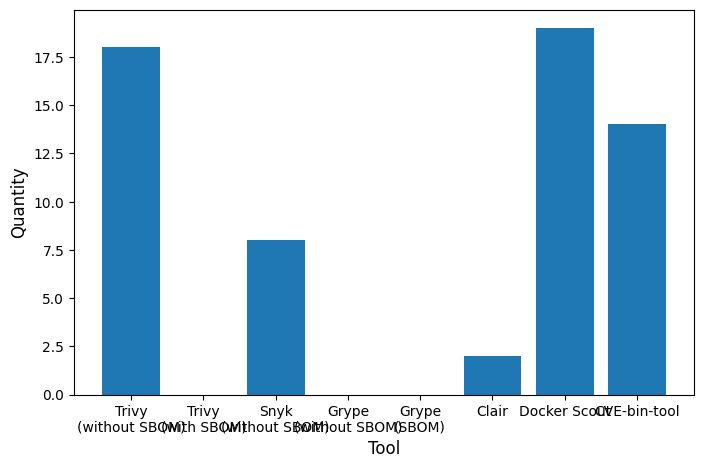

In [46]:
import matplotlib.pyplot as plt
import numpy as np

registry_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(registry_trivy), 0, len(registry_snyk_no_sbom), len(registry_grype_no_sbom),
                 len(registry_grype_sbom), len(registry_clair), len(registry_docker_scout), len(registry_cve_bin_tool)]
}

x = np.array(registry_data["Tool"])
y = np.array(registry_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [47]:
registry_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), registry_trivy))
registry_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), []))
registry_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), registry_snyk_no_sbom))
registry_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), registry_grype_no_sbom))
registry_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), registry_grype_sbom))
registry_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), registry_clair))
registry_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), registry_docker_scout))
registry_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), registry_cve_bin_tool))

registry_trivy_no_sbom_intersection = find_cve_intersection(
    registry_trivy_no_sbom_cve,
    registry_cve_bin_tool_cve,
)

registry_trivy_sbom_intersection = find_cve_intersection(
    registry_trivy_sbom_cve,
    registry_cve_bin_tool_cve,
)

registry_snyk_no_sbom_intersection = find_cve_intersection(
    registry_snyk_no_sbom_cve,
    registry_cve_bin_tool_cve,
)

registry_grype_no_sbom_intersection = find_cve_intersection(
    registry_grype_no_sbom_cve,
    registry_cve_bin_tool_cve,
)

registry_grype_sbom_intersection = find_cve_intersection(
    registry_grype_sbom_cve,
    registry_cve_bin_tool_cve,
)

registry_clair_intersection = find_cve_intersection(
    registry_clair_cve,
    registry_cve_bin_tool_cve,
)

registry_docker_scout_intersection = find_cve_intersection(
    registry_docker_scout_cve,
    registry_cve_bin_tool_cve,
)

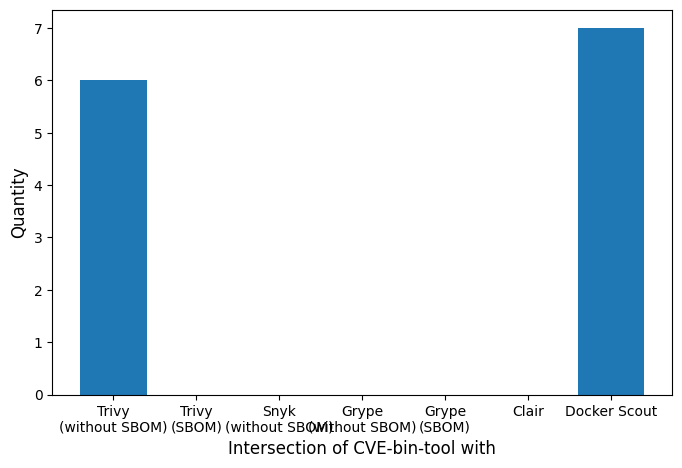

In [148]:
import matplotlib.pyplot as plt

registry_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(registry_trivy_no_sbom_intersection), len(registry_trivy_sbom_intersection), len(registry_snyk_no_sbom_intersection), len(registry_grype_no_sbom_intersection), len(registry_grype_sbom_intersection), len(registry_clair_intersection), len(registry_docker_scout_intersection)]
}

x = np.array(registry_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(registry_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [48]:
registry_data = {
    "trivy": len(registry_trivy),
    "trivy_sbom": 0,
    "snyk": len(registry_snyk_no_sbom),
    "grype": len(registry_grype_no_sbom),
    "grype_sbom": len(registry_grype_sbom),
    "clair": len(registry_clair),
    "docker_scout": len(registry_docker_scout),
    "cve_bin_tool": len(registry_cve_bin_tool),

    "trivy_intersection": len(registry_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(registry_trivy_sbom_intersection),
    "snyk_intersection": len(registry_snyk_no_sbom_intersection),
    "grype_intersection": len(registry_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(registry_grype_sbom_intersection),
    "clair_intersection": len(registry_clair_intersection),
    "docker_scout_intersection": len(registry_docker_scout_intersection),
}

# Debian

In [49]:
debian_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_debian:12_2024-12-08T17:33:29.868807"

with open(debian_path + "/trivy.json", "r") as txt:
    debian_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_debian:12_2024-12-14T15:08:57.590712/trivy_sbom.json", "r") as txt:
    debian_trivy_sbom = json.load(txt)
with open(debian_path + "/snyk_no_sbom.json", "r") as txt:
    debian_snyk_no_sbom = json.load(txt)
with open(debian_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    debian_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_debian:12_2024-12-12T22:52:04.949244/grype_sbom.json", "r") as txt:
    debian_grype_sbom = json.load(txt)
with open(debian_path + "/clair.json", "r") as txt:
    debian_clair = json.load(txt)
with open(debian_path + "/tool.json", "r") as txt:
    debian_cve_bin_tool = json.load(txt)

debian_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_debian:12_2024-12-08T23:21:16.653369/docker_scout_no_sbom.json"

with open(debian_docker_scout_path, "r") as txt:
    debian_docker_scout = json.load(txt)

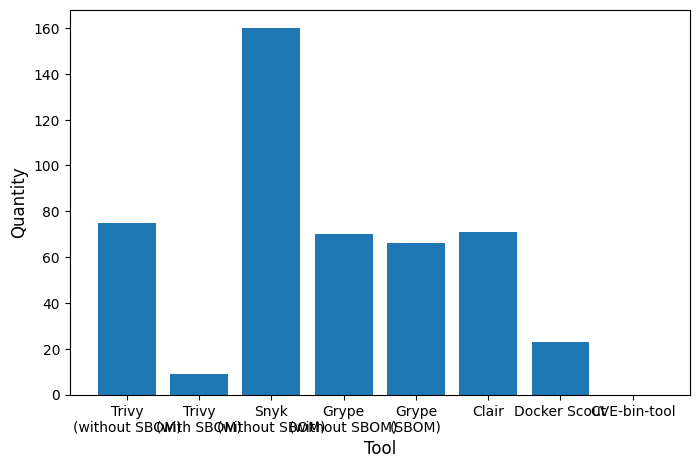

In [181]:
import matplotlib.pyplot as plt
import numpy as np

debian_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(debian_trivy), len(debian_trivy_sbom), len(debian_snyk_no_sbom), len(debian_grype_no_sbom),
                 len(debian_grype_sbom), len(debian_clair), len(debian_docker_scout), len(debian_cve_bin_tool)]
}

x = np.array(debian_data["Tool"])
y = np.array(debian_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [50]:
debian_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), debian_trivy))
debian_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), debian_trivy_sbom))
debian_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), debian_snyk_no_sbom))
debian_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), debian_grype_no_sbom))
debian_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), debian_grype_sbom))
debian_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), debian_clair))
debian_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), debian_docker_scout))
debian_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), debian_cve_bin_tool))

debian_trivy_no_sbom_intersection = find_cve_intersection(
    debian_trivy_no_sbom_cve,
    debian_cve_bin_tool_cve,
)

debian_trivy_sbom_intersection = find_cve_intersection(
    debian_trivy_sbom_cve,
    debian_cve_bin_tool_cve,
)

debian_snyk_no_sbom_intersection = find_cve_intersection(
    debian_snyk_no_sbom_cve,
    debian_cve_bin_tool_cve,
)

debian_grype_no_sbom_intersection = find_cve_intersection(
    debian_grype_no_sbom_cve,
    debian_cve_bin_tool_cve,
)

debian_grype_sbom_intersection = find_cve_intersection(
    debian_grype_sbom_cve,
    debian_cve_bin_tool_cve,
)

debian_clair_intersection = find_cve_intersection(
    debian_clair_cve,
    debian_cve_bin_tool_cve,
)

debian_docker_scout_intersection = find_cve_intersection(
    debian_docker_scout_cve,
    debian_cve_bin_tool_cve,
)

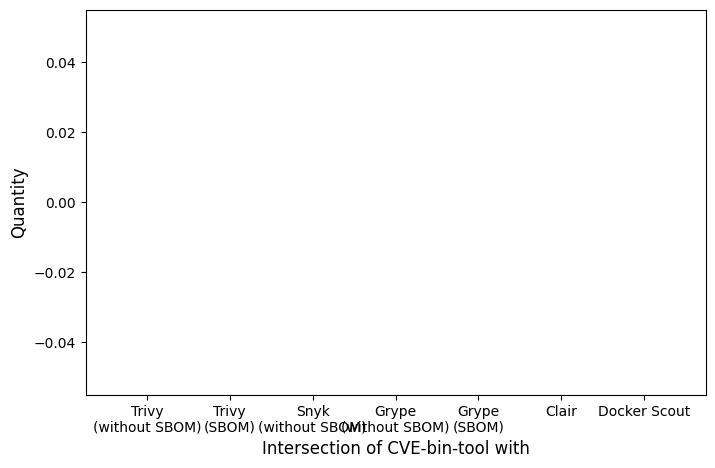

In [180]:
import matplotlib.pyplot as plt

debian_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(debian_trivy_no_sbom_intersection), len(debian_trivy_sbom_intersection), len(debian_snyk_no_sbom_intersection), len(debian_grype_no_sbom_intersection), len(debian_grype_sbom_intersection), len(debian_clair_intersection), len(debian_docker_scout_intersection)]
}

x = np.array(debian_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(debian_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [51]:
debian_data = {
    "trivy": len(debian_trivy),
    "trivy_sbom": len(debian_trivy_sbom),
    "snyk": len(debian_snyk_no_sbom),
    "grype": len(debian_grype_no_sbom),
    "grype_sbom": len(debian_grype_sbom),
    "clair": len(debian_clair),
    "docker_scout": len(debian_docker_scout),
    "cve_bin_tool": len(debian_cve_bin_tool),
    
    "trivy_intersection": len(debian_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(debian_trivy_sbom_intersection),
    "snyk_intersection": len(debian_snyk_no_sbom_intersection),
    "grype_intersection": len(debian_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(debian_grype_sbom_intersection),
    "clair_intersection": len(debian_clair_intersection),
    "docker_scout_intersection": len(debian_docker_scout_intersection),
}

# PHP

In [52]:
php_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_php:8.2_2024-12-08T17:37:51.324448"

with open(php_path + "/trivy.json", "r") as txt:
    php_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_php:8.2_2024-12-14T15:09:04.448245/trivy_sbom.json", "r") as txt:
    php_trivy_sbom = json.load(txt)
with open(php_path + "/snyk_no_sbom.json", "r") as txt:
    php_snyk_no_sbom = json.load(txt)
with open(php_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    php_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_php:8.2_2024-12-12T22:52:09.347654/grype_sbom.json", "r") as txt:
    php_grype_sbom = json.load(txt)
with open(php_path + "/clair.json", "r") as txt:
    php_clair = json.load(txt)
with open(php_path + "/tool.json", "r") as txt:
    php_cve_bin_tool = json.load(txt)

php_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_php:8.2_2024-12-08T23:21:19.620576/docker_scout_no_sbom.json"

with open(php_docker_scout_path, "r") as txt:
    php_docker_scout = json.load(txt)

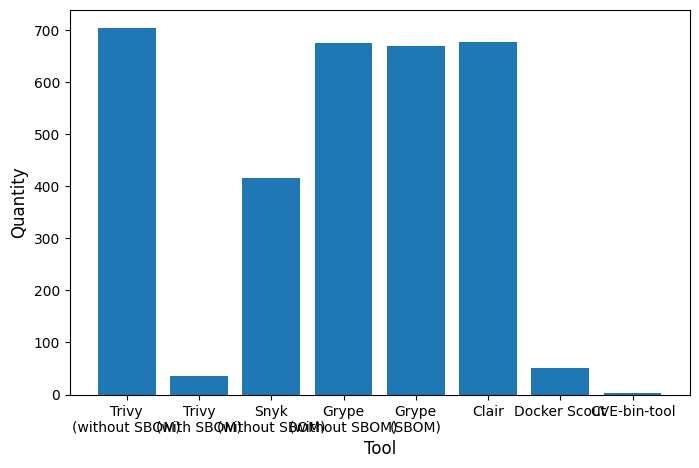

In [178]:
import matplotlib.pyplot as plt
import numpy as np

php_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(php_trivy), len(php_trivy_sbom), len(php_snyk_no_sbom), len(php_grype_no_sbom),
                 len(php_grype_sbom), len(php_clair), len(php_docker_scout), len(php_cve_bin_tool)]
}

x = np.array(php_data["Tool"])
y = np.array(php_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [53]:
php_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), php_trivy))
php_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), php_trivy_sbom))
php_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), php_snyk_no_sbom))
php_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), php_grype_no_sbom))
php_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), php_grype_sbom))
php_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), php_clair))
php_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), php_docker_scout))
php_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), php_cve_bin_tool))

php_trivy_no_sbom_intersection = find_cve_intersection(
    php_trivy_no_sbom_cve,
    php_cve_bin_tool_cve,
)

php_trivy_sbom_intersection = find_cve_intersection(
    php_trivy_sbom_cve,
    php_cve_bin_tool_cve,
)

php_snyk_no_sbom_intersection = find_cve_intersection(
    php_snyk_no_sbom_cve,
    php_cve_bin_tool_cve,
)

php_grype_no_sbom_intersection = find_cve_intersection(
    php_grype_no_sbom_cve,
    php_cve_bin_tool_cve,
)

php_grype_sbom_intersection = find_cve_intersection(
    php_grype_sbom_cve,
    php_cve_bin_tool_cve,
)

php_clair_intersection = find_cve_intersection(
    php_clair_cve,
    php_cve_bin_tool_cve,
)

php_docker_scout_intersection = find_cve_intersection(
    php_docker_scout_cve,
    php_cve_bin_tool_cve,
)

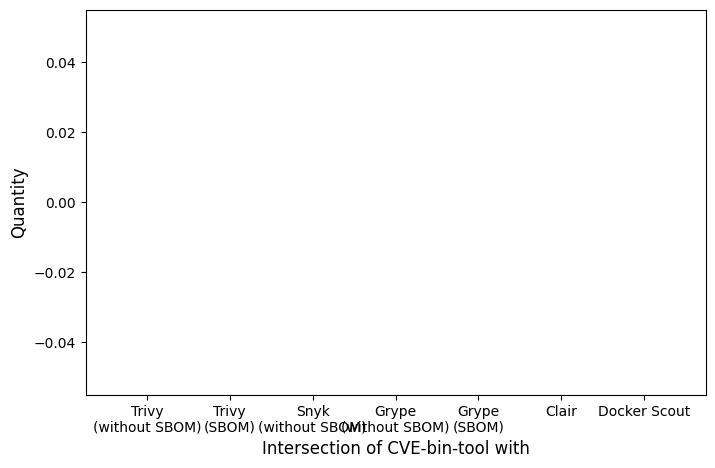

In [177]:
import matplotlib.pyplot as plt

php_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(php_trivy_no_sbom_intersection), len(php_trivy_sbom_intersection), len(php_snyk_no_sbom_intersection), len(php_grype_no_sbom_intersection), len(php_grype_sbom_intersection), len(php_clair_intersection), len(php_docker_scout_intersection)]
}

x = np.array(php_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(php_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [54]:
php_data = {
    "trivy": len(php_trivy),
    "trivy_sbom": len(php_trivy_sbom),
    "snyk": len(php_snyk_no_sbom),
    "grype": len(php_grype_no_sbom),
    "grype_sbom": len(php_grype_sbom),
    "clair": len(php_clair),
    "docker_scout": len(php_docker_scout),
    "cve_bin_tool": len(php_cve_bin_tool),
    
    "trivy_intersection": len(php_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(php_trivy_sbom_intersection),
    "snyk_intersection": len(php_snyk_no_sbom_intersection),
    "grype_intersection": len(php_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(php_grype_sbom_intersection),
    "clair_intersection": len(php_clair_intersection),
    "docker_scout_intersection": len(php_docker_scout_intersection),
}

# CentOS

In [55]:
centos_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_centos:centos7_2024-12-08T17:39:44.353977"

with open(centos_path + "/trivy.json", "r") as txt:
    centos_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_centos:centos7_2024-12-14T15:09:17.756740/trivy_sbom.json", "r") as txt:
    centos_trivy_sbom = json.load(txt)
with open(centos_path + "/snyk_no_sbom.json", "r") as txt:
    centos_snyk_no_sbom = json.load(txt)
with open(centos_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    centos_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_centos:centos7_2024-12-12T22:52:22.972183/grype_sbom.json", "r") as txt:
    centos_grype_sbom = json.load(txt)
with open(centos_path + "/clair.json", "r") as txt:
    centos_clair = json.load(txt)
with open(centos_path + "/tool.json", "r") as txt:
    centos_cve_bin_tool = json.load(txt)

centos_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_centos:centos7_2024-12-08T23:21:23.019308/docker_scout_no_sbom.json"

with open(centos_docker_scout_path, "r") as txt:
    centos_docker_scout = json.load(txt)

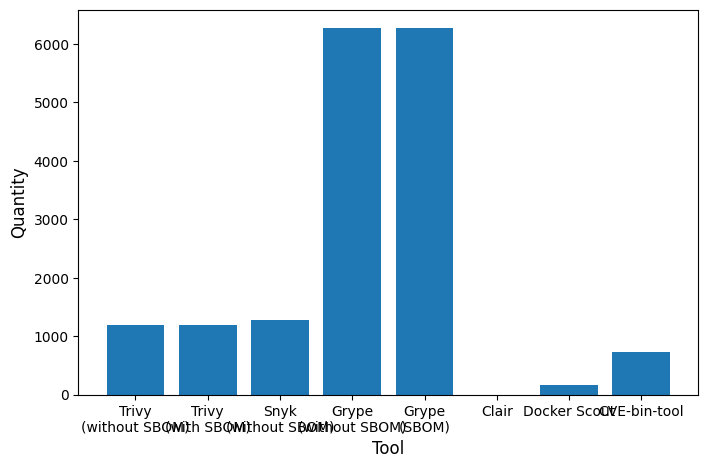

In [182]:
import matplotlib.pyplot as plt
import numpy as np

centos_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(centos_trivy), len(centos_trivy_sbom), len(centos_snyk_no_sbom), len(centos_grype_no_sbom),
                 len(centos_grype_sbom), len(centos_clair), len(centos_docker_scout), len(centos_cve_bin_tool)]
}

x = np.array(centos_data["Tool"])
y = np.array(centos_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [56]:
centos_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), centos_trivy))
centos_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), centos_trivy_sbom))
centos_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), centos_snyk_no_sbom))
centos_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), centos_grype_no_sbom))
centos_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), centos_grype_sbom))
centos_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), centos_clair))
centos_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), centos_docker_scout))
centos_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), centos_cve_bin_tool))

centos_trivy_no_sbom_intersection = find_cve_intersection(
    centos_trivy_no_sbom_cve,
    centos_cve_bin_tool_cve,
)

centos_trivy_sbom_intersection = find_cve_intersection(
    centos_trivy_sbom_cve,
    centos_cve_bin_tool_cve,
)

centos_snyk_no_sbom_intersection = find_cve_intersection(
    centos_snyk_no_sbom_cve,
    centos_cve_bin_tool_cve,
)

centos_grype_no_sbom_intersection = find_cve_intersection(
    centos_grype_no_sbom_cve,
    centos_cve_bin_tool_cve,
)

centos_grype_sbom_intersection = find_cve_intersection(
    centos_grype_sbom_cve,
    centos_cve_bin_tool_cve,
)

centos_clair_intersection = find_cve_intersection(
    centos_clair_cve,
    centos_cve_bin_tool_cve,
)

centos_docker_scout_intersection = find_cve_intersection(
    centos_docker_scout_cve,
    centos_cve_bin_tool_cve,
)

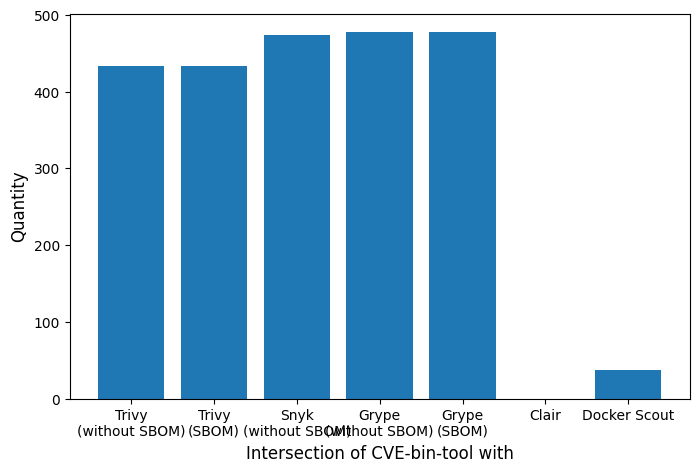

In [184]:
import matplotlib.pyplot as plt

centos_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(centos_trivy_no_sbom_intersection), len(centos_trivy_sbom_intersection), len(centos_snyk_no_sbom_intersection), len(centos_grype_no_sbom_intersection), len(centos_grype_sbom_intersection), len(centos_clair_intersection), len(centos_docker_scout_intersection)]
}

x = np.array(centos_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(centos_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [57]:
centos_data = {
    "trivy": len(centos_trivy),
    "trivy_sbom": len(centos_trivy_sbom),
    "snyk": len(centos_snyk_no_sbom),
    "grype": len(centos_grype_no_sbom),
    "grype_sbom": len(centos_grype_sbom),
    "clair": len(centos_clair),
    "docker_scout": len(centos_docker_scout),
    "cve_bin_tool": len(centos_cve_bin_tool),
    
    "trivy_intersection": len(centos_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(centos_trivy_sbom_intersection),
    "snyk_intersection": len(centos_snyk_no_sbom_intersection),
    "grype_intersection": len(centos_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(centos_grype_sbom_intersection),
    "clair_intersection": len(centos_clair_intersection),
    "docker_scout_intersection": len(centos_docker_scout_intersection),
}

# InfluxDB

In [58]:
influxdb_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_influxdb:1.11.8_2024-12-08T18:06:03.990017"

with open(influxdb_path + "/trivy.json", "r") as txt:
    influxdb_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_influxdb:1.11.8_2024-12-14T15:09:24.993160/trivy_sbom.json", "r") as txt:
    influxdb_trivy_sbom = json.load(txt)
with open(influxdb_path + "/snyk_no_sbom.json", "r") as txt:
    influxdb_snyk_no_sbom = json.load(txt)
with open(influxdb_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    influxdb_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_influxdb:1.11.8_2024-12-12T22:52:35.373634/grype_sbom.json", "r") as txt:
    influxdb_grype_sbom = json.load(txt)
with open(influxdb_path + "/clair.json", "r") as txt:
    influxdb_clair = json.load(txt)
with open(influxdb_path + "/tool.json", "r") as txt:
    influxdb_cve_bin_tool = json.load(txt)

influxdb_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_influxdb:1.11.8_2024-12-08T23:21:26.159109/docker_scout_no_sbom.json"

with open(influxdb_docker_scout_path, "r") as txt:
    influxdb_docker_scout = json.load(txt)

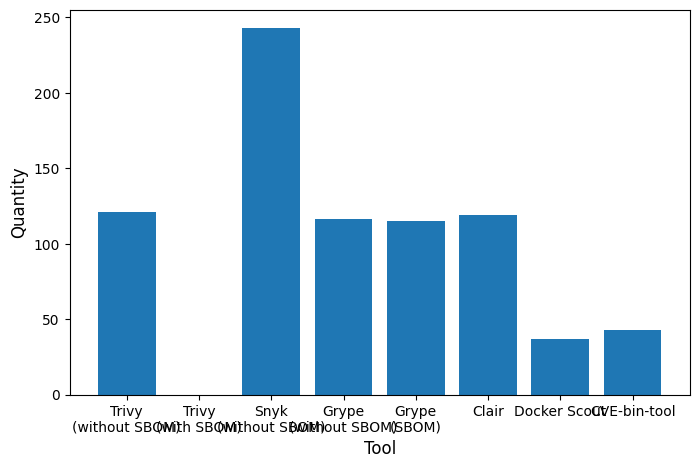

In [187]:
import matplotlib.pyplot as plt
import numpy as np

influxdb_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(influxdb_trivy), 0, len(influxdb_snyk_no_sbom), len(influxdb_grype_no_sbom),
                 len(influxdb_grype_sbom), len(influxdb_clair), len(influxdb_docker_scout), len(influxdb_cve_bin_tool)]
}

x = np.array(influxdb_data["Tool"])
y = np.array(influxdb_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [59]:
influxdb_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), influxdb_trivy))
influxdb_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), influxdb_trivy_sbom))
influxdb_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), influxdb_snyk_no_sbom))
influxdb_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), influxdb_grype_no_sbom))
influxdb_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), influxdb_grype_sbom))
influxdb_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), influxdb_clair))
influxdb_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), influxdb_docker_scout))
influxdb_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), influxdb_cve_bin_tool))

influxdb_trivy_no_sbom_intersection = find_cve_intersection(
    influxdb_trivy_no_sbom_cve,
    influxdb_cve_bin_tool_cve,
)

influxdb_trivy_sbom_intersection = find_cve_intersection(
    influxdb_trivy_sbom_cve,
    influxdb_cve_bin_tool_cve,
)

influxdb_snyk_no_sbom_intersection = find_cve_intersection(
    influxdb_snyk_no_sbom_cve,
    influxdb_cve_bin_tool_cve,
)

influxdb_grype_no_sbom_intersection = find_cve_intersection(
    influxdb_grype_no_sbom_cve,
    influxdb_cve_bin_tool_cve,
)

influxdb_grype_sbom_intersection = find_cve_intersection(
    influxdb_grype_sbom_cve,
    influxdb_cve_bin_tool_cve,
)

influxdb_clair_intersection = find_cve_intersection(
    influxdb_clair_cve,
    influxdb_cve_bin_tool_cve,
)

influxdb_docker_scout_intersection = find_cve_intersection(
    influxdb_docker_scout_cve,
    influxdb_cve_bin_tool_cve,
)

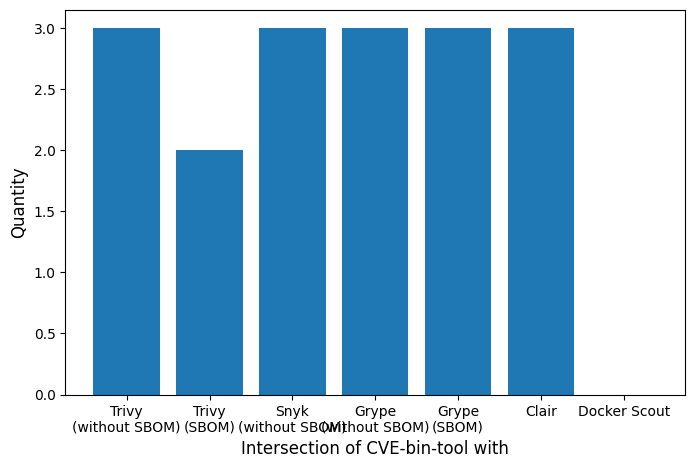

In [189]:
import matplotlib.pyplot as plt

influxdb_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(influxdb_trivy_no_sbom_intersection), len(influxdb_trivy_sbom_intersection), len(influxdb_snyk_no_sbom_intersection), len(influxdb_grype_no_sbom_intersection), len(influxdb_grype_sbom_intersection), len(influxdb_clair_intersection), len(influxdb_docker_scout_intersection)]
}

x = np.array(influxdb_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(influxdb_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [60]:
influxdb_data = {
    "trivy": len(influxdb_trivy),
    "trivy_sbom": len(influxdb_trivy_sbom),
    "snyk": len(influxdb_snyk_no_sbom),
    "grype": len(influxdb_grype_no_sbom),
    "grype_sbom": len(influxdb_grype_sbom),
    "clair": len(influxdb_clair),
    "docker_scout": len(influxdb_docker_scout),
    "cve_bin_tool": len(influxdb_cve_bin_tool),
    
    "trivy_intersection": len(influxdb_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(influxdb_trivy_sbom_intersection),
    "snyk_intersection": len(influxdb_snyk_no_sbom_intersection),
    "grype_intersection": len(influxdb_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(influxdb_grype_sbom_intersection),
    "clair_intersection": len(influxdb_clair_intersection),
    "docker_scout_intersection": len(influxdb_docker_scout_intersection),
}

# Consul

In [61]:
consul_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_consul:1.15.4_2024-12-08T18:07:25.271817"

with open(consul_path + "/trivy.json", "r") as txt:
    consul_trivy = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_consul:1.15.4_2024-12-14T15:09:31.720932/trivy_sbom.json", "r") as txt:
    consul_trivy_sbom = json.load(txt)
with open(consul_path + "/snyk_no_sbom.json", "r") as txt:
    consul_snyk_no_sbom = json.load(txt)
with open(consul_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    consul_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/sbom_scanning_results_consul:1.15.4_2024-12-12T22:52:44.195022/grype_sbom.json", "r") as txt:
    consul_grype_sbom = json.load(txt)
with open(consul_path + "/clair.json", "r") as txt:
    consul_clair = json.load(txt)
with open(consul_path + "/tool.json", "r") as txt:
    consul_cve_bin_tool = json.load(txt)

consul_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_consul:1.15.4_2024-12-08T23:21:29.161990/docker_scout_no_sbom.json"

with open(consul_docker_scout_path, "r") as txt:
    consul_docker_scout = json.load(txt)

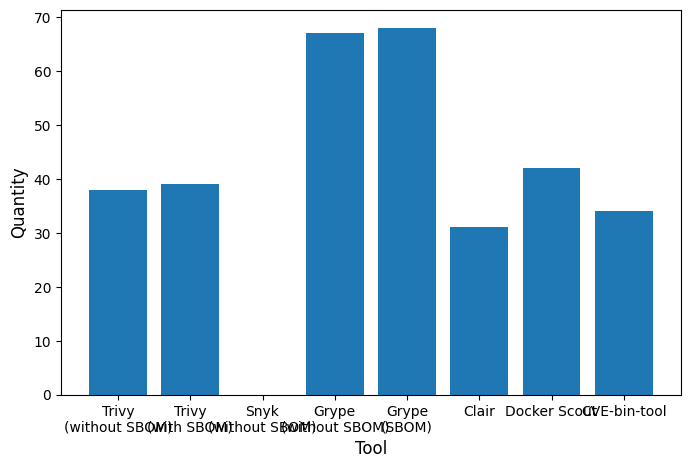

In [192]:
import matplotlib.pyplot as plt
import numpy as np

consul_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(consul_trivy), len(consul_trivy_sbom), len(consul_snyk_no_sbom), len(consul_grype_no_sbom),
                 len(consul_grype_sbom), len(consul_clair), len(consul_docker_scout), len(consul_cve_bin_tool)]
}

x = np.array(consul_data["Tool"])
y = np.array(consul_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [62]:
consul_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), consul_trivy))
consul_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), consul_trivy_sbom))
consul_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), consul_snyk_no_sbom))
consul_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), consul_grype_no_sbom))
consul_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), consul_grype_sbom))
consul_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), consul_clair))
consul_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), consul_docker_scout))
consul_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), consul_cve_bin_tool))

consul_trivy_no_sbom_intersection = find_cve_intersection(
    consul_trivy_no_sbom_cve,
    consul_cve_bin_tool_cve,
)

consul_trivy_sbom_intersection = find_cve_intersection(
    consul_trivy_sbom_cve,
    consul_cve_bin_tool_cve,
)

consul_snyk_no_sbom_intersection = find_cve_intersection(
    consul_snyk_no_sbom_cve,
    consul_cve_bin_tool_cve,
)

consul_grype_no_sbom_intersection = find_cve_intersection(
    consul_grype_no_sbom_cve,
    consul_cve_bin_tool_cve,
)

consul_grype_sbom_intersection = find_cve_intersection(
    consul_grype_sbom_cve,
    consul_cve_bin_tool_cve,
)

consul_clair_intersection = find_cve_intersection(
    consul_clair_cve,
    consul_cve_bin_tool_cve,
)

consul_docker_scout_intersection = find_cve_intersection(
    consul_docker_scout_cve,
    consul_cve_bin_tool_cve,
)

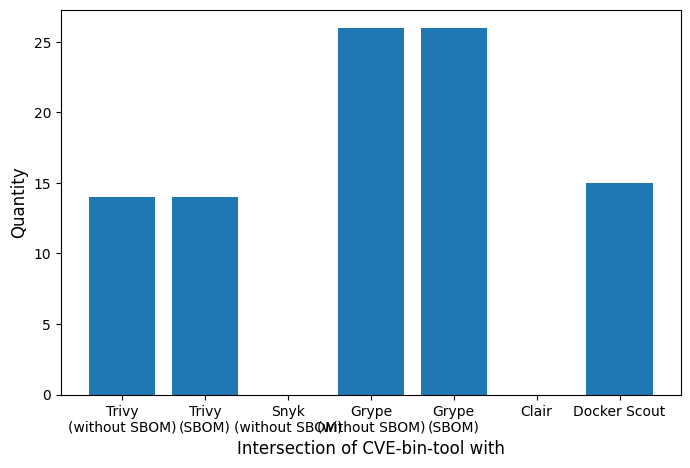

In [194]:
import matplotlib.pyplot as plt

consul_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(consul_trivy_no_sbom_intersection), len(consul_trivy_sbom_intersection), len(consul_snyk_no_sbom_intersection), len(consul_grype_no_sbom_intersection), len(consul_grype_sbom_intersection), len(consul_clair_intersection), len(consul_docker_scout_intersection)]
}

x = np.array(consul_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(consul_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [63]:
consul_data = {
    "trivy": len(consul_trivy),
    "trivy_sbom": len(consul_trivy_sbom),
    "snyk": len(consul_snyk_no_sbom),
    "grype": len(consul_grype_no_sbom),
    "grype_sbom": len(consul_grype_sbom),
    "clair": len(consul_clair),
    "docker_scout": len(consul_docker_scout),
    "cve_bin_tool": len(consul_cve_bin_tool),
    
    "trivy_intersection": len(consul_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(consul_trivy_sbom_intersection),
    "snyk_intersection": len(consul_snyk_no_sbom_intersection),
    "grype_intersection": len(consul_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(consul_grype_sbom_intersection),
    "clair_intersection": len(consul_clair_intersection),
    "docker_scout_intersection": len(consul_docker_scout_intersection),
}

# vulhub/activemq

In [64]:
activemq_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_activemq:5.17.3_2024-12-12T13:38:40.072711"

with open(activemq_path + "/trivy.json", "r") as txt:
    activemq_trivy = json.load(txt)
with open(activemq_path + "/trivy_sbom.json", "r") as txt:
    activemq_trivy_sbom = json.load(txt)
with open(activemq_path + "/snyk_no_sbom.json", "r") as txt:
    activemq_snyk_no_sbom = json.load(txt)
with open(activemq_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    activemq_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_activemq:5.17.3_2024-12-14T16:22:33.928648/grype_sbom.json", "r") as txt:
    activemq_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_vulhub_activemq/clair.json", "r") as txt:
    activemq_clair = json.load(txt)
with open(activemq_path + "/tool.json", "r") as txt:
    activemq_cve_bin_tool = json.load(txt)

# activemq_docker_scout_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_activemq:1.15.4_2024-12-08T23:21:29.161990/"

with open(activemq_path + "/docker_scout_no_sbom.json", "r") as txt:
    activemq_docker_scout = json.load(txt)

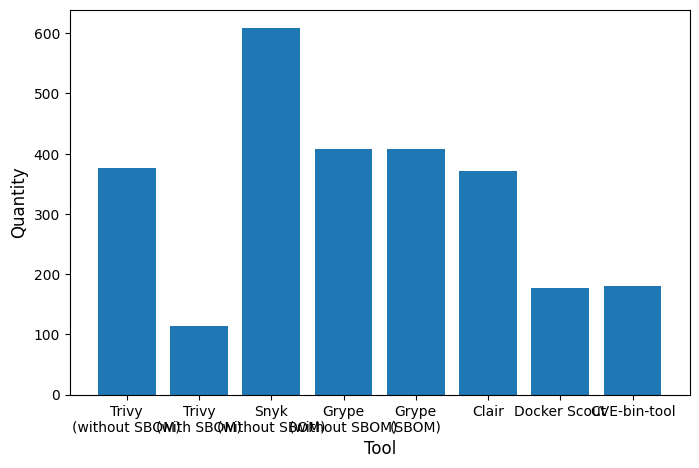

In [199]:
import matplotlib.pyplot as plt
import numpy as np

activemq_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(activemq_trivy), len(activemq_trivy_sbom), len(activemq_snyk_no_sbom), len(activemq_grype_no_sbom),
                 len(activemq_grype_sbom), len(activemq_clair), len(activemq_docker_scout), len(activemq_cve_bin_tool)]
}

x = np.array(activemq_data["Tool"])
y = np.array(activemq_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [65]:
activemq_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), activemq_trivy))
activemq_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), activemq_trivy_sbom))
activemq_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), activemq_snyk_no_sbom))
activemq_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), activemq_grype_no_sbom))
activemq_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), activemq_grype_sbom))
activemq_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), activemq_clair))
activemq_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), activemq_docker_scout))
activemq_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), activemq_cve_bin_tool))

activemq_trivy_no_sbom_intersection = find_cve_intersection(
    activemq_trivy_no_sbom_cve,
    activemq_cve_bin_tool_cve,
)

activemq_trivy_sbom_intersection = find_cve_intersection(
    activemq_trivy_sbom_cve,
    activemq_cve_bin_tool_cve,
)

activemq_snyk_no_sbom_intersection = find_cve_intersection(
    activemq_snyk_no_sbom_cve,
    activemq_cve_bin_tool_cve,
)

activemq_grype_no_sbom_intersection = find_cve_intersection(
    activemq_grype_no_sbom_cve,
    activemq_cve_bin_tool_cve,
)

activemq_grype_sbom_intersection = find_cve_intersection(
    activemq_grype_sbom_cve,
    activemq_cve_bin_tool_cve,
)

activemq_clair_intersection = find_cve_intersection(
    activemq_clair_cve,
    activemq_cve_bin_tool_cve,
)

activemq_docker_scout_intersection = find_cve_intersection(
    activemq_docker_scout_cve,
    activemq_cve_bin_tool_cve,
)

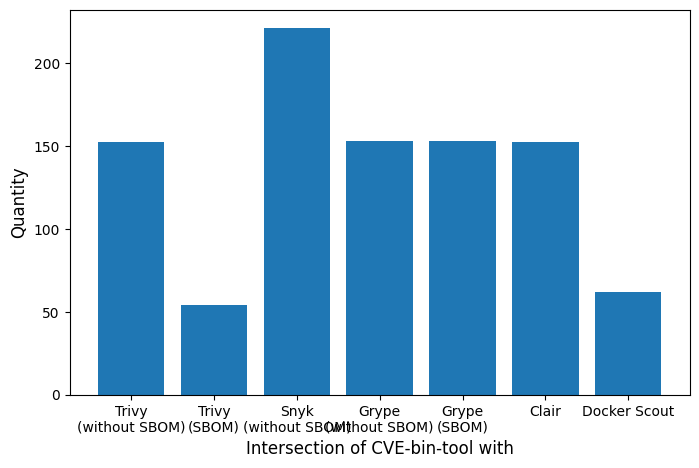

In [201]:
import matplotlib.pyplot as plt

activemq_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(activemq_trivy_no_sbom_intersection), len(activemq_trivy_sbom_intersection), len(activemq_snyk_no_sbom_intersection), len(activemq_grype_no_sbom_intersection), len(activemq_grype_sbom_intersection), len(activemq_clair_intersection), len(activemq_docker_scout_intersection)]
}

x = np.array(activemq_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(activemq_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [66]:
activemq_data = {
    "trivy": len(activemq_trivy),
    "trivy_sbom": len(activemq_trivy_sbom),
    "snyk": len(activemq_snyk_no_sbom),
    "grype": len(activemq_grype_no_sbom),
    "grype_sbom": len(activemq_grype_sbom),
    "clair": len(activemq_clair),
    "docker_scout": len(activemq_docker_scout),
    "cve_bin_tool": len(activemq_cve_bin_tool),
    
    "trivy_intersection": len(activemq_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(activemq_trivy_sbom_intersection),
    "snyk_intersection": len(activemq_snyk_no_sbom_intersection),
    "grype_intersection": len(activemq_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(activemq_grype_sbom_intersection),
    "clair_intersection": len(activemq_clair_intersection),
    "docker_scout_intersection": len(activemq_docker_scout_intersection),
}

# vulhub/adminer

In [67]:
adminer_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_adminer:4.7.8_2024-12-12T13:43:49.143350"

with open(adminer_path + "/trivy.json", "r") as txt:
    adminer_trivy = json.load(txt)
with open(adminer_path + "/trivy_sbom.json", "r") as txt:
    adminer_trivy_sbom = json.load(txt)
with open(adminer_path + "/snyk_no_sbom.json", "r") as txt:
    adminer_snyk_no_sbom = json.load(txt)
with open(adminer_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    adminer_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_adminer:4.7.8_2024-12-14T16:24:03.029906/grype_sbom.json", "r") as txt:
    adminer_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_vulhub_adminer/clair.json", "r") as txt:
    adminer_clair = json.load(txt)
with open(adminer_path + "/tool.json", "r") as txt:
    adminer_cve_bin_tool = json.load(txt)

with open(adminer_path + "/docker_scout_no_sbom.json", "r") as txt:
    adminer_docker_scout = json.load(txt)

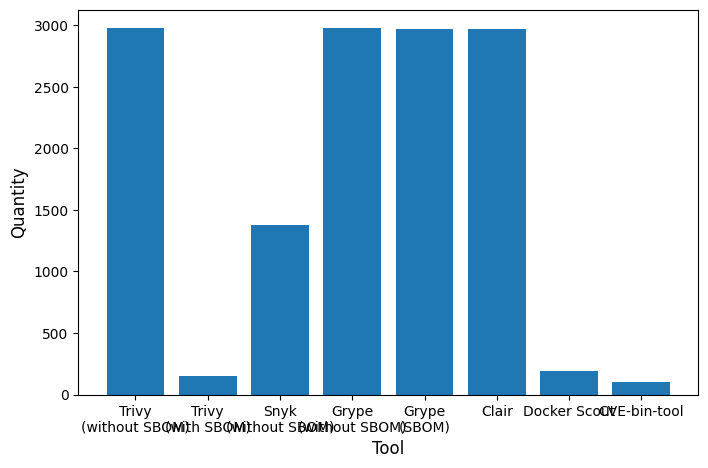

In [204]:
import matplotlib.pyplot as plt
import numpy as np

adminer_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(adminer_trivy), len(adminer_trivy_sbom), len(adminer_snyk_no_sbom), len(adminer_grype_no_sbom),
                 len(adminer_grype_sbom), len(adminer_clair), len(adminer_docker_scout), len(adminer_cve_bin_tool)]
}

x = np.array(adminer_data["Tool"])
y = np.array(adminer_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [68]:
adminer_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), adminer_trivy))
adminer_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), adminer_trivy_sbom))
adminer_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), adminer_snyk_no_sbom))
adminer_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), adminer_grype_no_sbom))
adminer_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), adminer_grype_sbom))
adminer_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), adminer_clair))
adminer_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), adminer_docker_scout))
adminer_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), adminer_cve_bin_tool))

adminer_trivy_no_sbom_intersection = find_cve_intersection(
    adminer_trivy_no_sbom_cve,
    adminer_cve_bin_tool_cve,
)

adminer_trivy_sbom_intersection = find_cve_intersection(
    adminer_trivy_sbom_cve,
    adminer_cve_bin_tool_cve,
)

adminer_snyk_no_sbom_intersection = find_cve_intersection(
    adminer_snyk_no_sbom_cve,
    adminer_cve_bin_tool_cve,
)

adminer_grype_no_sbom_intersection = find_cve_intersection(
    adminer_grype_no_sbom_cve,
    adminer_cve_bin_tool_cve,
)

adminer_grype_sbom_intersection = find_cve_intersection(
    adminer_grype_sbom_cve,
    adminer_cve_bin_tool_cve,
)

adminer_clair_intersection = find_cve_intersection(
    adminer_clair_cve,
    adminer_cve_bin_tool_cve,
)

adminer_docker_scout_intersection = find_cve_intersection(
    adminer_docker_scout_cve,
    adminer_cve_bin_tool_cve,
)

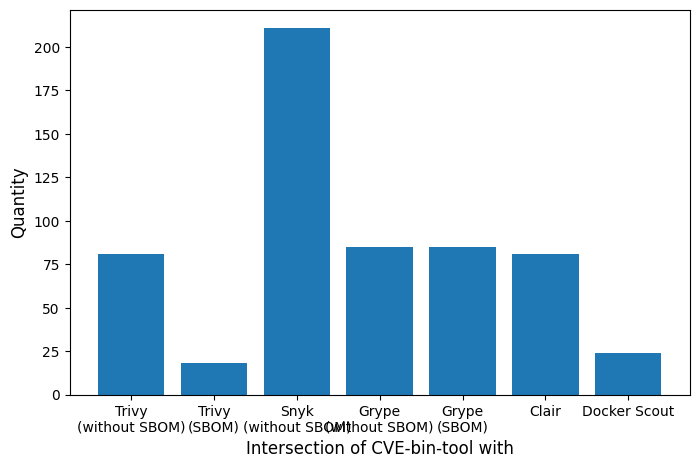

In [206]:
import matplotlib.pyplot as plt

adminer_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(adminer_trivy_no_sbom_intersection), len(adminer_trivy_sbom_intersection), len(adminer_snyk_no_sbom_intersection), len(adminer_grype_no_sbom_intersection), len(adminer_grype_sbom_intersection), len(adminer_clair_intersection), len(adminer_docker_scout_intersection)]
}

x = np.array(adminer_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(adminer_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [69]:
adminer_data = {
    "trivy": len(adminer_trivy),
    "trivy_sbom": len(adminer_trivy_sbom),
    "snyk": len(adminer_snyk_no_sbom),
    "grype": len(adminer_grype_no_sbom),
    "grype_sbom": len(adminer_grype_sbom),
    "clair": len(adminer_clair),
    "docker_scout": len(adminer_docker_scout),
    "cve_bin_tool": len(adminer_cve_bin_tool),
    
    "trivy_intersection": len(adminer_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(adminer_trivy_sbom_intersection),
    "snyk_intersection": len(adminer_snyk_no_sbom_intersection),
    "grype_intersection": len(adminer_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(adminer_grype_sbom_intersection),
    "clair_intersection": len(adminer_clair_intersection),
    "docker_scout_intersection": len(adminer_docker_scout_intersection),
}

# vulhub/apisix

In [70]:
apisix_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_apisix:2.9_2024-12-12T15:28:30.800744"

with open(apisix_path + "/trivy.json", "r") as txt:
    apisix_trivy = json.load(txt)
with open(apisix_path + "/trivy_sbom.json", "r") as txt:
    apisix_trivy_sbom = json.load(txt)
with open(apisix_path + "/snyk_no_sbom.json", "r") as txt:
    apisix_snyk_no_sbom = json.load(txt)
with open(apisix_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    apisix_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_apisix:2.9_2024-12-14T16:24:20.066937/grype_sbom.json", "r") as txt:
    apisix_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_vulhub_apisix/clair.json", "r") as txt:
    apisix_clair = json.load(txt)
with open(apisix_path + "/tool.json", "r") as txt:
    apisix_cve_bin_tool = json.load(txt)

with open(apisix_path + "/docker_scout_no_sbom.json", "r") as txt:
    apisix_docker_scout = json.load(txt)

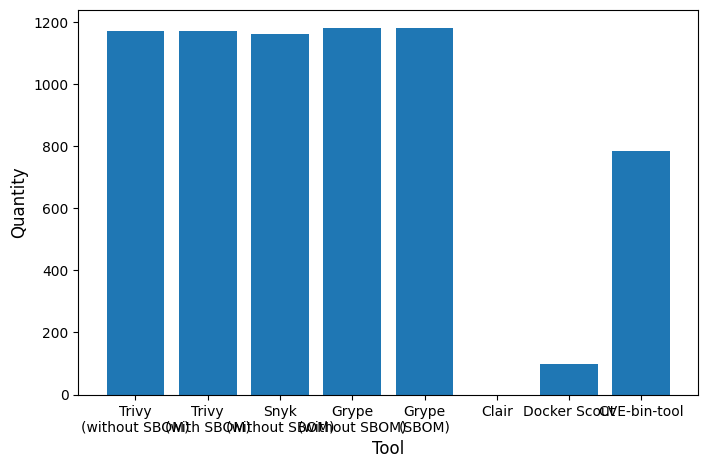

In [214]:
import matplotlib.pyplot as plt
import numpy as np

apisix_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(apisix_trivy), len(apisix_trivy_sbom), len(apisix_snyk_no_sbom), len(apisix_grype_no_sbom),
                 len(apisix_grype_sbom), len(apisix_clair), len(apisix_docker_scout), len(apisix_cve_bin_tool)]
}

x = np.array(apisix_data["Tool"])
y = np.array(apisix_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [71]:
apisix_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), apisix_trivy))
apisix_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), apisix_trivy_sbom))
apisix_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), apisix_snyk_no_sbom))
apisix_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), apisix_grype_no_sbom))
apisix_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), apisix_grype_sbom))
apisix_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), apisix_clair))
apisix_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), apisix_docker_scout))
apisix_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), apisix_cve_bin_tool))

apisix_trivy_no_sbom_intersection = find_cve_intersection(
    apisix_trivy_no_sbom_cve,
    apisix_cve_bin_tool_cve,
)

apisix_trivy_sbom_intersection = find_cve_intersection(
    apisix_trivy_sbom_cve,
    apisix_cve_bin_tool_cve,
)

apisix_snyk_no_sbom_intersection = find_cve_intersection(
    apisix_snyk_no_sbom_cve,
    apisix_cve_bin_tool_cve,
)

apisix_grype_no_sbom_intersection = find_cve_intersection(
    apisix_grype_no_sbom_cve,
    apisix_cve_bin_tool_cve,
)

apisix_grype_sbom_intersection = find_cve_intersection(
    apisix_grype_sbom_cve,
    apisix_cve_bin_tool_cve,
)

apisix_clair_intersection = find_cve_intersection(
    apisix_clair_cve,
    apisix_cve_bin_tool_cve,
)

apisix_docker_scout_intersection = find_cve_intersection(
    apisix_docker_scout_cve,
    apisix_cve_bin_tool_cve,
)

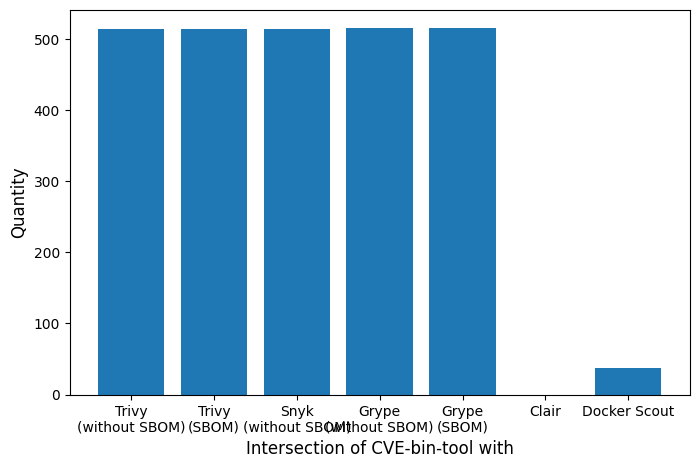

In [211]:
import matplotlib.pyplot as plt

apisix_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(apisix_trivy_no_sbom_intersection), len(apisix_trivy_sbom_intersection), len(apisix_snyk_no_sbom_intersection), len(apisix_grype_no_sbom_intersection), len(apisix_grype_sbom_intersection), len(apisix_clair_intersection), len(apisix_docker_scout_intersection)]
}

x = np.array(apisix_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(apisix_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [72]:
apisix_data = {
    "trivy": len(apisix_trivy),
    "trivy_sbom": len(apisix_trivy_sbom),
    "snyk": len(apisix_snyk_no_sbom),
    "grype": len(apisix_grype_no_sbom),
    "grype_sbom": len(apisix_grype_sbom),
    "clair": len(apisix_clair),
    "docker_scout": len(apisix_docker_scout),
    "cve_bin_tool": len(apisix_cve_bin_tool),
    
    "trivy_intersection": len(apisix_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(apisix_trivy_sbom_intersection),
    "snyk_intersection": len(apisix_snyk_no_sbom_intersection),
    "grype_intersection": len(apisix_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(apisix_grype_sbom_intersection),
    "clair_intersection": len(apisix_clair_intersection),
    "docker_scout_intersection": len(apisix_docker_scout_intersection),
}

# vulhub/appweb

In [73]:
appweb_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_appweb:7.0.1_2024-12-12T15:36:20.408748"

with open(appweb_path + "/trivy.json", "r") as txt:
    appweb_trivy = json.load(txt)
with open(appweb_path + "/trivy_sbom.json", "r") as txt:
    appweb_trivy_sbom = json.load(txt)
with open(appweb_path + "/snyk_no_sbom.json", "r") as txt:
    appweb_snyk_no_sbom = json.load(txt)
with open(appweb_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    appweb_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_appweb:7.0.1_2024-12-14T16:24:28.034743/grype_sbom.json", "r") as txt:
    appweb_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_vulhub_appweb/clair.json", "r") as txt:
    appweb_clair = json.load(txt)
with open(appweb_path + "/tool.json", "r") as txt:
    appweb_cve_bin_tool = json.load(txt)

with open(appweb_path + "/docker_scout_no_sbom.json", "r") as txt:
    appweb_docker_scout = json.load(txt)

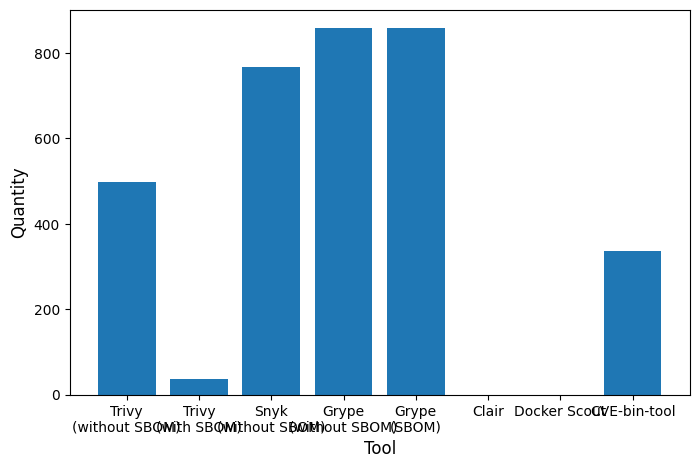

In [216]:
import matplotlib.pyplot as plt
import numpy as np

appweb_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(appweb_trivy), len(appweb_trivy_sbom), len(appweb_snyk_no_sbom), len(appweb_grype_no_sbom),
                 len(appweb_grype_sbom), len(appweb_clair), len(appweb_docker_scout), len(appweb_cve_bin_tool)]
}

x = np.array(appweb_data["Tool"])
y = np.array(appweb_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [74]:
appweb_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), appweb_trivy))
appweb_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), appweb_trivy_sbom))
appweb_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), appweb_snyk_no_sbom))
appweb_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), appweb_grype_no_sbom))
appweb_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), appweb_grype_sbom))
appweb_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), appweb_clair))
appweb_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), appweb_docker_scout))
appweb_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), appweb_cve_bin_tool))

appweb_trivy_no_sbom_intersection = find_cve_intersection(
    appweb_trivy_no_sbom_cve,
    appweb_cve_bin_tool_cve,
)

appweb_trivy_sbom_intersection = find_cve_intersection(
    appweb_trivy_sbom_cve,
    appweb_cve_bin_tool_cve,
)

appweb_snyk_no_sbom_intersection = find_cve_intersection(
    appweb_snyk_no_sbom_cve,
    appweb_cve_bin_tool_cve,
)

appweb_grype_no_sbom_intersection = find_cve_intersection(
    appweb_grype_no_sbom_cve,
    appweb_cve_bin_tool_cve,
)

appweb_grype_sbom_intersection = find_cve_intersection(
    appweb_grype_sbom_cve,
    appweb_cve_bin_tool_cve,
)

appweb_clair_intersection = find_cve_intersection(
    appweb_clair_cve,
    appweb_cve_bin_tool_cve,
)

appweb_docker_scout_intersection = find_cve_intersection(
    appweb_docker_scout_cve,
    appweb_cve_bin_tool_cve,
)

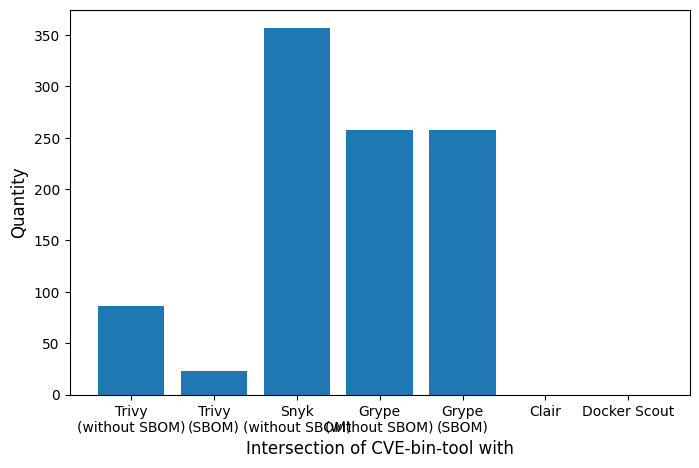

In [218]:
import matplotlib.pyplot as plt

appweb_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(appweb_trivy_no_sbom_intersection), len(appweb_trivy_sbom_intersection), len(appweb_snyk_no_sbom_intersection), len(appweb_grype_no_sbom_intersection), len(appweb_grype_sbom_intersection), len(appweb_clair_intersection), len(appweb_docker_scout_intersection)]
}

x = np.array(appweb_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(appweb_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [75]:
appweb_data = {
    "trivy": len(appweb_trivy),
    "trivy_sbom": len(appweb_trivy_sbom),
    "snyk": len(appweb_snyk_no_sbom),
    "grype": len(appweb_grype_no_sbom),
    "grype_sbom": len(appweb_grype_sbom),
    "clair": len(appweb_clair),
    "docker_scout": len(appweb_docker_scout),
    "cve_bin_tool": len(appweb_cve_bin_tool),
    
    "trivy_intersection": len(appweb_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(appweb_trivy_sbom_intersection),
    "snyk_intersection": len(appweb_snyk_no_sbom_intersection),
    "grype_intersection": len(appweb_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(appweb_grype_sbom_intersection),
    "clair_intersection": len(appweb_clair_intersection),
    "docker_scout_intersection": len(appweb_docker_scout_intersection),
}

# vulhub/aria2

In [76]:
aria2_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_aria2:1.18.8_2024-12-12T15:41:32.221983"

with open(aria2_path + "/trivy.json", "r") as txt:
    aria2_trivy = json.load(txt)
with open(aria2_path + "/trivy_sbom.json", "r") as txt:
    aria2_trivy_sbom = json.load(txt)
with open(aria2_path + "/snyk_no_sbom.json", "r") as txt:
    aria2_snyk_no_sbom = json.load(txt)
with open(aria2_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    aria2_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_aria2:1.18.8_2024-12-14T16:24:33.737503/grype_sbom.json", "r") as txt:
    aria2_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_vulhub_aria/clair.json", "r") as txt:
    aria2_clair = json.load(txt)
with open(aria2_path + "/tool.json", "r") as txt:
    aria2_cve_bin_tool = json.load(txt)

with open(aria2_path + "/docker_scout_no_sbom.json", "r") as txt:
    aria2_docker_scout = json.load(txt)

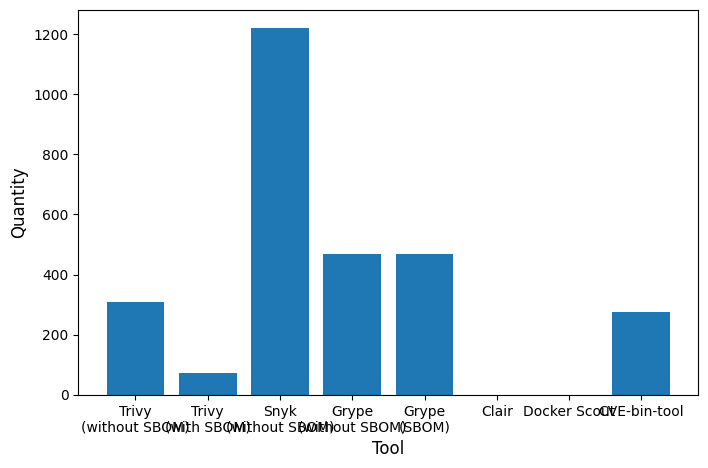

In [221]:
import matplotlib.pyplot as plt
import numpy as np

aria2_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(aria2_trivy), len(aria2_trivy_sbom), len(aria2_snyk_no_sbom), len(aria2_grype_no_sbom),
                 len(aria2_grype_sbom), len(aria2_clair), len(aria2_docker_scout), len(aria2_cve_bin_tool)]
}

x = np.array(aria2_data["Tool"])
y = np.array(aria2_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [77]:
aria2_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), aria2_trivy))
aria2_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), aria2_trivy_sbom))
aria2_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), aria2_snyk_no_sbom))
aria2_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), aria2_grype_no_sbom))
aria2_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), aria2_grype_sbom))
aria2_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), aria2_clair))
aria2_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), aria2_docker_scout))
aria2_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), aria2_cve_bin_tool))

aria2_trivy_no_sbom_intersection = find_cve_intersection(
    aria2_trivy_no_sbom_cve,
    aria2_cve_bin_tool_cve,
)

aria2_trivy_sbom_intersection = find_cve_intersection(
    aria2_trivy_sbom_cve,
    aria2_cve_bin_tool_cve,
)

aria2_snyk_no_sbom_intersection = find_cve_intersection(
    aria2_snyk_no_sbom_cve,
    aria2_cve_bin_tool_cve,
)

aria2_grype_no_sbom_intersection = find_cve_intersection(
    aria2_grype_no_sbom_cve,
    aria2_cve_bin_tool_cve,
)

aria2_grype_sbom_intersection = find_cve_intersection(
    aria2_grype_sbom_cve,
    aria2_cve_bin_tool_cve,
)

aria2_clair_intersection = find_cve_intersection(
    aria2_clair_cve,
    aria2_cve_bin_tool_cve,
)

aria2_docker_scout_intersection = find_cve_intersection(
    aria2_docker_scout_cve,
    aria2_cve_bin_tool_cve,
)

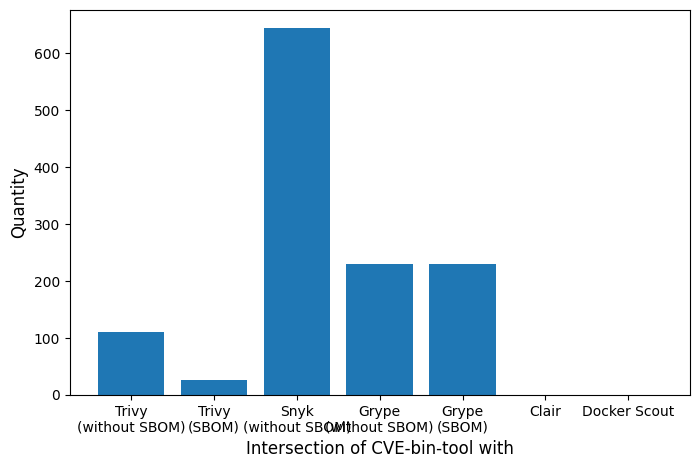

In [223]:
import matplotlib.pyplot as plt

aria2_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(aria2_trivy_no_sbom_intersection), len(aria2_trivy_sbom_intersection), len(aria2_snyk_no_sbom_intersection), len(aria2_grype_no_sbom_intersection), len(aria2_grype_sbom_intersection), len(aria2_clair_intersection), len(aria2_docker_scout_intersection)]
}

x = np.array(aria2_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(aria2_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [78]:
aria2_data = {
    "trivy": len(aria2_trivy),
    "trivy_sbom": len(aria2_trivy_sbom),
    "snyk": len(aria2_snyk_no_sbom),
    "grype": len(aria2_grype_no_sbom),
    "grype_sbom": len(aria2_grype_sbom),
    "clair": len(aria2_clair),
    "docker_scout": len(aria2_docker_scout),
    "cve_bin_tool": len(aria2_cve_bin_tool),
    
    "trivy_intersection": len(aria2_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(aria2_trivy_sbom_intersection),
    "snyk_intersection": len(aria2_snyk_no_sbom_intersection),
    "grype_intersection": len(aria2_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(aria2_grype_sbom_intersection),
    "clair_intersection": len(aria2_clair_intersection),
    "docker_scout_intersection": len(aria2_docker_scout_intersection),
}

# Bash

In [79]:
bash_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_bash:4.3.0-with-httpd_2024-12-12T15:46:48.743763"

with open(bash_path + "/trivy.json", "r") as txt:
    bash_trivy = json.load(txt)
with open(bash_path + "/trivy_sbom.json", "r") as txt:
    bash_trivy_sbom = json.load(txt)
with open(bash_path + "/snyk_no_sbom.json", "r") as txt:
    bash_snyk_no_sbom = json.load(txt)
with open(bash_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    bash_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_bash:4.3.0-with-httpd_2024-12-14T16:24:40.325121/grype_sbom.json", "r") as txt:
    bash_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_vulhub_bash/clair.json", "r") as txt:
    bash_clair = json.load(txt)
with open(bash_path + "/tool.json", "r") as txt:
    bash_cve_bin_tool = json.load(txt)

with open(bash_path + "/docker_scout_no_sbom.json", "r") as txt:
    bash_docker_scout = json.load(txt)

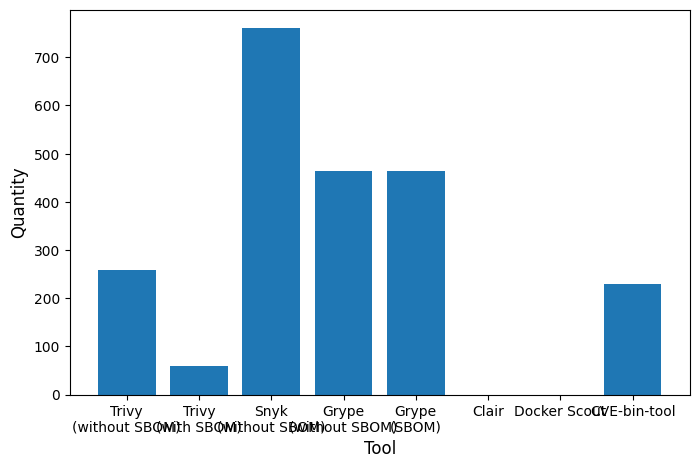

In [226]:
import matplotlib.pyplot as plt
import numpy as np

bash_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(bash_trivy), len(bash_trivy_sbom), len(bash_snyk_no_sbom), len(bash_grype_no_sbom),
                 len(bash_grype_sbom), len(bash_clair), len(bash_docker_scout), len(bash_cve_bin_tool)]
}

x = np.array(bash_data["Tool"])
y = np.array(bash_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [80]:
bash_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bash_trivy))
bash_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bash_trivy_sbom))
bash_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bash_snyk_no_sbom))
bash_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bash_grype_no_sbom))
bash_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bash_grype_sbom))
bash_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bash_clair))
bash_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bash_docker_scout))
bash_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bash_cve_bin_tool))

bash_trivy_no_sbom_intersection = find_cve_intersection(
    bash_trivy_no_sbom_cve,
    bash_cve_bin_tool_cve,
)

bash_trivy_sbom_intersection = find_cve_intersection(
    bash_trivy_sbom_cve,
    bash_cve_bin_tool_cve,
)

bash_snyk_no_sbom_intersection = find_cve_intersection(
    bash_snyk_no_sbom_cve,
    bash_cve_bin_tool_cve,
)

bash_grype_no_sbom_intersection = find_cve_intersection(
    bash_grype_no_sbom_cve,
    bash_cve_bin_tool_cve,
)

bash_grype_sbom_intersection = find_cve_intersection(
    bash_grype_sbom_cve,
    bash_cve_bin_tool_cve,
)

bash_clair_intersection = find_cve_intersection(
    bash_clair_cve,
    bash_cve_bin_tool_cve,
)

bash_docker_scout_intersection = find_cve_intersection(
    bash_docker_scout_cve,
    bash_cve_bin_tool_cve,
)

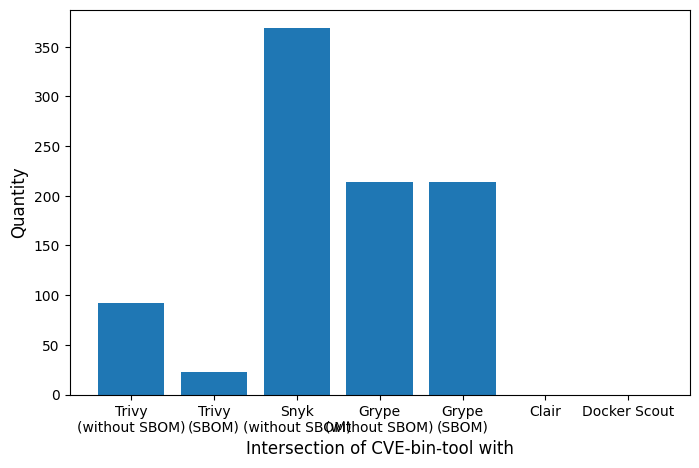

In [228]:
import matplotlib.pyplot as plt

bash_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(bash_trivy_no_sbom_intersection), len(bash_trivy_sbom_intersection), len(bash_snyk_no_sbom_intersection), len(bash_grype_no_sbom_intersection), len(bash_grype_sbom_intersection), len(bash_clair_intersection), len(bash_docker_scout_intersection)]
}

x = np.array(bash_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(bash_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [81]:
bash_data = {
    "trivy": len(bash_trivy),
    "trivy_sbom": len(bash_trivy_sbom),
    "snyk": len(bash_snyk_no_sbom),
    "grype": len(bash_grype_no_sbom),
    "grype_sbom": len(bash_grype_sbom),
    "clair": len(bash_clair),
    "docker_scout": len(bash_docker_scout),
    "cve_bin_tool": len(bash_cve_bin_tool),
    
    "trivy_intersection": len(bash_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(bash_trivy_sbom_intersection),
    "snyk_intersection": len(bash_snyk_no_sbom_intersection),
    "grype_intersection": len(bash_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(bash_grype_sbom_intersection),
    "clair_intersection": len(bash_clair_intersection),
    "docker_scout_intersection": len(bash_docker_scout_intersection),
}

# Cacti

In [82]:
cacti_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_cacti:1.2.22_2024-12-12T15:51:16.286453"

with open(cacti_path + "/trivy.json", "r") as txt:
    cacti_trivy = json.load(txt)
with open(cacti_path + "/trivy_sbom.json", "r") as txt:
    cacti_trivy_sbom = json.load(txt)
with open(cacti_path + "/snyk_no_sbom.json", "r") as txt:
    cacti_snyk_no_sbom = json.load(txt)
with open(cacti_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    cacti_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_cacti:1.2.22_2024-12-14T16:24:46.727837/grype_sbom.json", "r") as txt:
    cacti_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_vulhub_cacti/clair.json", "r") as txt:
    cacti_clair = json.load(txt)
with open(cacti_path + "/tool.json", "r") as txt:
    cacti_cve_bin_tool = json.load(txt)

with open(cacti_path + "/docker_scout_no_sbom.json", "r") as txt:
    cacti_docker_scout = json.load(txt)

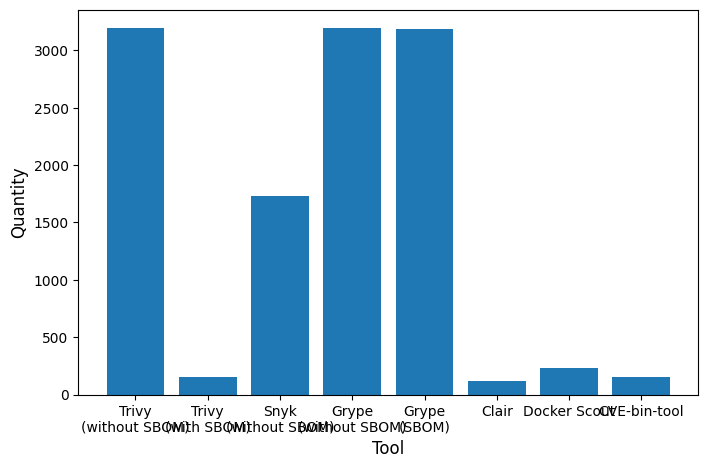

In [231]:
import matplotlib.pyplot as plt
import numpy as np

cacti_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(cacti_trivy), len(cacti_trivy_sbom), len(cacti_snyk_no_sbom), len(cacti_grype_no_sbom),
                 len(cacti_grype_sbom), len(cacti_clair), len(cacti_docker_scout), len(cacti_cve_bin_tool)]
}

x = np.array(cacti_data["Tool"])
y = np.array(cacti_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [83]:
cacti_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cacti_trivy))
cacti_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cacti_trivy_sbom))
cacti_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cacti_snyk_no_sbom))
cacti_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cacti_grype_no_sbom))
cacti_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cacti_grype_sbom))
cacti_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cacti_clair))
cacti_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cacti_docker_scout))
cacti_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cacti_cve_bin_tool))

cacti_trivy_no_sbom_intersection = find_cve_intersection(
    cacti_trivy_no_sbom_cve,
    cacti_cve_bin_tool_cve,
)

cacti_trivy_sbom_intersection = find_cve_intersection(
    cacti_trivy_sbom_cve,
    cacti_cve_bin_tool_cve,
)

cacti_snyk_no_sbom_intersection = find_cve_intersection(
    cacti_snyk_no_sbom_cve,
    cacti_cve_bin_tool_cve,
)

cacti_grype_no_sbom_intersection = find_cve_intersection(
    cacti_grype_no_sbom_cve,
    cacti_cve_bin_tool_cve,
)

cacti_grype_sbom_intersection = find_cve_intersection(
    cacti_grype_sbom_cve,
    cacti_cve_bin_tool_cve,
)

cacti_clair_intersection = find_cve_intersection(
    cacti_clair_cve,
    cacti_cve_bin_tool_cve,
)

cacti_docker_scout_intersection = find_cve_intersection(
    cacti_docker_scout_cve,
    cacti_cve_bin_tool_cve,
)

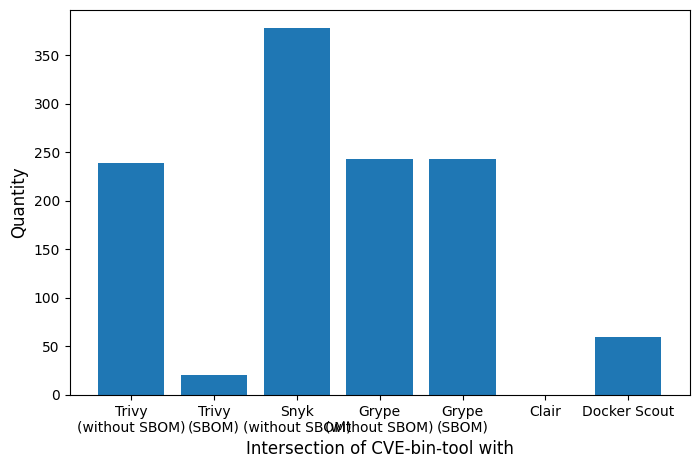

In [233]:
import matplotlib.pyplot as plt

cacti_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(cacti_trivy_no_sbom_intersection), len(cacti_trivy_sbom_intersection), len(cacti_snyk_no_sbom_intersection), len(cacti_grype_no_sbom_intersection), len(cacti_grype_sbom_intersection), len(cacti_clair_intersection), len(cacti_docker_scout_intersection)]
}

x = np.array(cacti_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(cacti_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [84]:
cacti_data = {
    "trivy": len(cacti_trivy),
    "trivy_sbom": len(cacti_trivy_sbom),
    "snyk": len(cacti_snyk_no_sbom),
    "grype": len(cacti_grype_no_sbom),
    "grype_sbom": len(cacti_grype_sbom),
    "clair": len(cacti_clair),
    "docker_scout": len(cacti_docker_scout),
    "cve_bin_tool": len(cacti_cve_bin_tool),
    
    "trivy_intersection": len(cacti_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(cacti_trivy_sbom_intersection),
    "snyk_intersection": len(cacti_snyk_no_sbom_intersection),
    "grype_intersection": len(cacti_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(cacti_grype_sbom_intersection),
    "clair_intersection": len(cacti_clair_intersection),
    "docker_scout_intersection": len(cacti_docker_scout_intersection),
}

# Celery

In [85]:
celery_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_celery:3.1.23_2024-12-12T16:09:51.303214"

with open(celery_path + "/trivy.json", "r") as txt:
    celery_trivy = json.load(txt)
with open(celery_path + "/trivy_sbom.json", "r") as txt:
    celery_trivy_sbom = json.load(txt)
with open(celery_path + "/snyk_no_sbom.json", "r") as txt:
    celery_snyk_no_sbom = json.load(txt)
with open(celery_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    celery_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_celery:3.1.23_2024-12-14T16:25:01.689985/grype_sbom.json", "r") as txt:
    celery_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/scanning_results_vulhub_celery/clair.json", "r") as txt:
    celery_clair = json.load(txt)
with open(celery_path + "/tool.json", "r") as txt:
    celery_cve_bin_tool = json.load(txt)

with open(celery_path + "/docker_scout_no_sbom.json", "r") as txt:
    celery_docker_scout = json.load(txt)

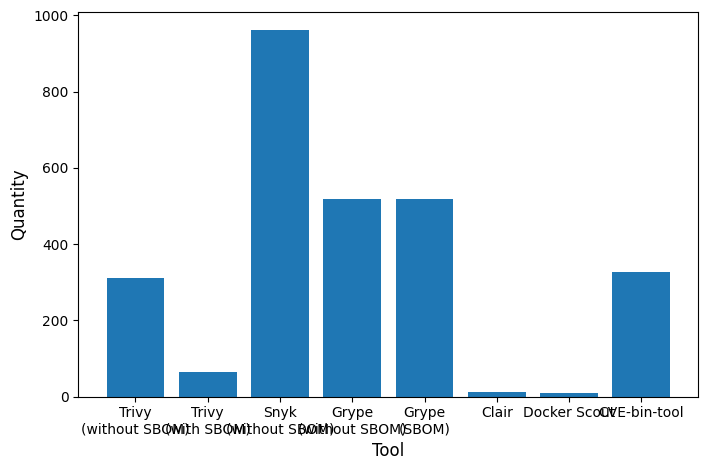

In [236]:
import matplotlib.pyplot as plt
import numpy as np

celery_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(celery_trivy), len(celery_trivy_sbom), len(celery_snyk_no_sbom), len(celery_grype_no_sbom),
                 len(celery_grype_sbom), len(celery_clair), len(celery_docker_scout), len(celery_cve_bin_tool)]
}

x = np.array(celery_data["Tool"])
y = np.array(celery_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [86]:
celery_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), celery_trivy))
celery_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), celery_trivy_sbom))
celery_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), celery_snyk_no_sbom))
celery_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), celery_grype_no_sbom))
celery_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), celery_grype_sbom))
celery_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), celery_clair))
celery_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), celery_docker_scout))
celery_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), celery_cve_bin_tool))

celery_trivy_no_sbom_intersection = find_cve_intersection(
    celery_trivy_no_sbom_cve,
    celery_cve_bin_tool_cve,
)

celery_trivy_sbom_intersection = find_cve_intersection(
    celery_trivy_sbom_cve,
    celery_cve_bin_tool_cve,
)

celery_snyk_no_sbom_intersection = find_cve_intersection(
    celery_snyk_no_sbom_cve,
    celery_cve_bin_tool_cve,
)

celery_grype_no_sbom_intersection = find_cve_intersection(
    celery_grype_no_sbom_cve,
    celery_cve_bin_tool_cve,
)

celery_grype_sbom_intersection = find_cve_intersection(
    celery_grype_sbom_cve,
    celery_cve_bin_tool_cve,
)

celery_clair_intersection = find_cve_intersection(
    celery_clair_cve,
    celery_cve_bin_tool_cve,
)

celery_docker_scout_intersection = find_cve_intersection(
    celery_docker_scout_cve,
    celery_cve_bin_tool_cve,
)

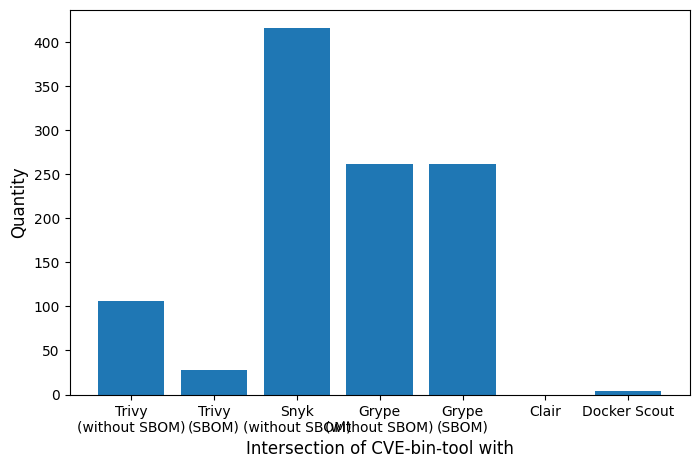

In [238]:
import matplotlib.pyplot as plt

celery_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(celery_trivy_no_sbom_intersection), len(celery_trivy_sbom_intersection), len(celery_snyk_no_sbom_intersection), len(celery_grype_no_sbom_intersection), len(celery_grype_sbom_intersection), len(celery_clair_intersection), len(celery_docker_scout_intersection)]
}

x = np.array(celery_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(celery_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [87]:
celery_data = {
    "trivy": len(celery_trivy),
    "trivy_sbom": len(celery_trivy_sbom),
    "snyk": len(celery_snyk_no_sbom),
    "grype": len(celery_grype_no_sbom),
    "grype_sbom": len(celery_grype_sbom),
    "clair": len(celery_clair),
    "docker_scout": len(celery_docker_scout),
    "cve_bin_tool": len(celery_cve_bin_tool),
    
    "trivy_intersection": len(celery_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(celery_trivy_sbom_intersection),
    "snyk_intersection": len(celery_snyk_no_sbom_intersection),
    "grype_intersection": len(celery_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(celery_grype_sbom_intersection),
    "clair_intersection": len(celery_clair_intersection),
    "docker_scout_intersection": len(celery_docker_scout_intersection),
}

# vulhub/cups-browsed

In [88]:
cups_browsed_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_cups-browsed:2.0.1_2024-12-14T19:01:40.499602"

with open(cups_browsed_path + "/trivy.json", "r") as txt:
    cups_browsed_trivy = json.load(txt)
with open(cups_browsed_path + "/trivy_sbom.json", "r") as txt:
    cups_browsed_trivy_sbom = json.load(txt)
with open(cups_browsed_path + "/snyk_no_sbom.json", "r") as txt:
    cups_browsed_snyk_no_sbom = json.load(txt)
with open(cups_browsed_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    cups_browsed_grype_no_sbom = json.load(txt)
with open(cups_browsed_path + "/grype_sbom.json", "r") as txt:
    cups_browsed_grype_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_cups-browsed:2.0.1_2024-12-12T19:31:34.739673/clair.json", "r") as txt:
    cups_browsed_clair = json.load(txt)
with open(cups_browsed_path + "/tool.json", "r") as txt:
    cups_browsed_cve_bin_tool = json.load(txt)

with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_cups-browsed:2.0.1_2024-12-12T19:31:34.739673/docker_scout_with_sbom.json", "r") as txt:
    cups_browsed_docker_scout = json.load(txt)

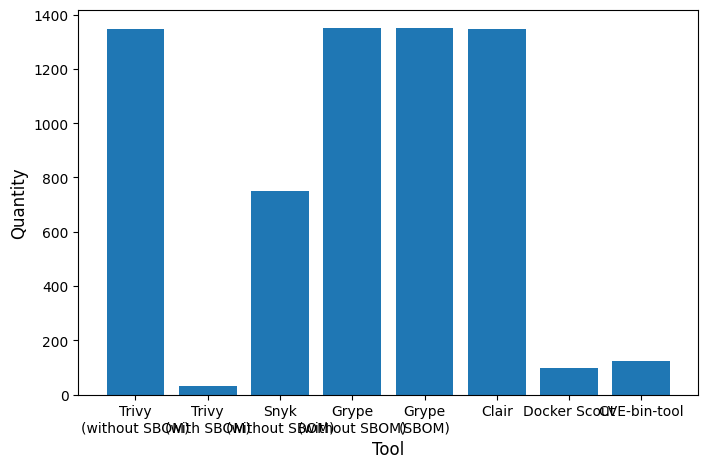

In [244]:
import matplotlib.pyplot as plt
import numpy as np

cups_browsed_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(cups_browsed_trivy), len(cups_browsed_trivy_sbom), len(cups_browsed_snyk_no_sbom), len(cups_browsed_grype_no_sbom),
                 len(cups_browsed_grype_sbom), len(cups_browsed_clair), len(cups_browsed_docker_scout), len(cups_browsed_cve_bin_tool)]
}

x = np.array(cups_browsed_data["Tool"])
y = np.array(cups_browsed_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [89]:
cups_browsed_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cups_browsed_trivy))
cups_browsed_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cups_browsed_trivy_sbom))
cups_browsed_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cups_browsed_snyk_no_sbom))
cups_browsed_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cups_browsed_grype_no_sbom))
cups_browsed_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cups_browsed_grype_sbom))
cups_browsed_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cups_browsed_clair))
cups_browsed_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cups_browsed_docker_scout))
cups_browsed_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), cups_browsed_cve_bin_tool))

cups_browsed_trivy_no_sbom_intersection = find_cve_intersection(
    cups_browsed_trivy_no_sbom_cve,
    cups_browsed_cve_bin_tool_cve,
)

cups_browsed_trivy_sbom_intersection = find_cve_intersection(
    cups_browsed_trivy_sbom_cve,
    cups_browsed_cve_bin_tool_cve,
)

cups_browsed_snyk_no_sbom_intersection = find_cve_intersection(
    cups_browsed_snyk_no_sbom_cve,
    cups_browsed_cve_bin_tool_cve,
)

cups_browsed_grype_no_sbom_intersection = find_cve_intersection(
    cups_browsed_grype_no_sbom_cve,
    cups_browsed_cve_bin_tool_cve,
)

cups_browsed_grype_sbom_intersection = find_cve_intersection(
    cups_browsed_grype_sbom_cve,
    cups_browsed_cve_bin_tool_cve,
)

cups_browsed_clair_intersection = find_cve_intersection(
    cups_browsed_clair_cve,
    cups_browsed_cve_bin_tool_cve,
)

cups_browsed_docker_scout_intersection = find_cve_intersection(
    cups_browsed_docker_scout_cve,
    cups_browsed_cve_bin_tool_cve,
)

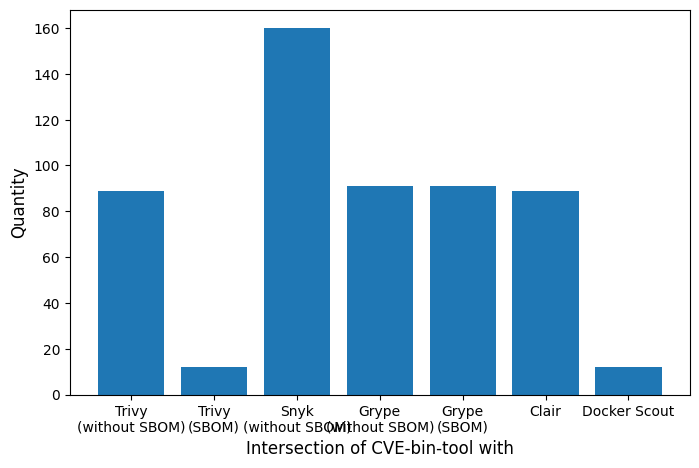

In [246]:
import matplotlib.pyplot as plt

cups_browsed_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(cups_browsed_trivy_no_sbom_intersection), len(cups_browsed_trivy_sbom_intersection), len(cups_browsed_snyk_no_sbom_intersection), len(cups_browsed_grype_no_sbom_intersection), len(cups_browsed_grype_sbom_intersection), len(cups_browsed_clair_intersection), len(cups_browsed_docker_scout_intersection)]
}

x = np.array(cups_browsed_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(cups_browsed_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [90]:
cups_browsed_data = {
    "trivy": len(cups_browsed_trivy),
    "trivy_sbom": len(cups_browsed_trivy_sbom),
    "snyk": len(cups_browsed_snyk_no_sbom),
    "grype": len(cups_browsed_grype_no_sbom),
    "grype_sbom": len(cups_browsed_grype_sbom),
    "clair": len(cups_browsed_clair),
    "docker_scout": len(cups_browsed_docker_scout),
    "cve_bin_tool": len(cups_browsed_cve_bin_tool),
    
    "trivy_intersection": len(cups_browsed_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(cups_browsed_trivy_sbom_intersection),
    "snyk_intersection": len(cups_browsed_snyk_no_sbom_intersection),
    "grype_intersection": len(cups_browsed_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(cups_browsed_grype_sbom_intersection),
    "clair_intersection": len(cups_browsed_clair_intersection),
    "docker_scout_intersection": len(cups_browsed_docker_scout_intersection),
}

# vulhub/git:2.12.2-with-openssh

In [91]:
git_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/docker_scout_scanning_results_vulhub_git:2.12.2-with-openssh_2024-12-12T19:47:59.680235"

with open(git_path + "/trivy.json", "r") as txt:
    git_trivy = json.load(txt)
with open(git_path + "/trivy_sbom.json", "r") as txt:
    git_trivy_sbom = json.load(txt)
with open(git_path + "/snyk_no_sbom.json", "r") as txt:
    git_snyk_no_sbom = json.load(txt)
with open(git_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    git_grype_no_sbom = json.load(txt)
with open("/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/grype_scanning_results_vulhub_git:2.12.2-with-openssh_2024-12-14T19:15:26.924645" + "/grype_sbom.json", "r") as txt:
    git_grype_sbom = json.load(txt)
with open(git_path + "/clair.json", "r") as txt:
    git_clair = json.load(txt)
with open(git_path + "/tool.json", "r") as txt:
    git_cve_bin_tool = json.load(txt)

with open(git_path + "/docker_scout_with_sbom.json", "r") as txt:
    git_docker_scout = json.load(txt)

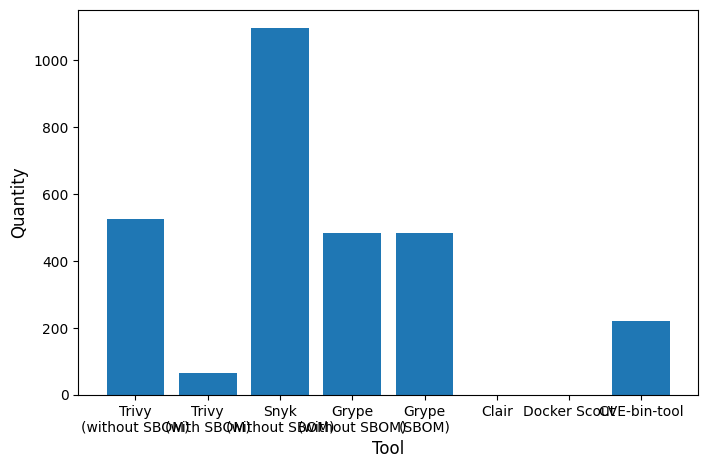

In [251]:
import matplotlib.pyplot as plt
import numpy as np

git_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(git_trivy), len(git_trivy_sbom), len(git_snyk_no_sbom), len(git_grype_no_sbom),
                 len(git_grype_sbom), len(git_clair), len(git_docker_scout), len(git_cve_bin_tool)]
}

x = np.array(git_data["Tool"])
y = np.array(git_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [92]:
git_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), git_trivy))
git_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), git_trivy_sbom))
git_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), git_snyk_no_sbom))
git_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), git_grype_no_sbom))
git_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), git_grype_sbom))
git_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), git_clair))
git_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), git_docker_scout))
git_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), git_cve_bin_tool))

git_trivy_no_sbom_intersection = find_cve_intersection(
    git_trivy_no_sbom_cve,
    git_cve_bin_tool_cve,
)

git_trivy_sbom_intersection = find_cve_intersection(
    git_trivy_sbom_cve,
    git_cve_bin_tool_cve,
)

git_snyk_no_sbom_intersection = find_cve_intersection(
    git_snyk_no_sbom_cve,
    git_cve_bin_tool_cve,
)

git_grype_no_sbom_intersection = find_cve_intersection(
    git_grype_no_sbom_cve,
    git_cve_bin_tool_cve,
)

git_grype_sbom_intersection = find_cve_intersection(
    git_grype_sbom_cve,
    git_cve_bin_tool_cve,
)

git_clair_intersection = find_cve_intersection(
    git_clair_cve,
    git_cve_bin_tool_cve,
)

git_docker_scout_intersection = find_cve_intersection(
    git_docker_scout_cve,
    git_cve_bin_tool_cve,
)

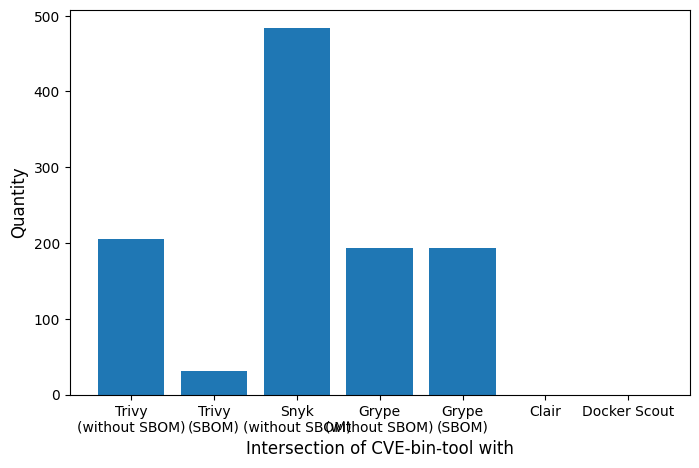

In [253]:
import matplotlib.pyplot as plt

git_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(git_trivy_no_sbom_intersection), len(git_trivy_sbom_intersection), len(git_snyk_no_sbom_intersection), len(git_grype_no_sbom_intersection), len(git_grype_sbom_intersection), len(git_clair_intersection), len(git_docker_scout_intersection)]
}

x = np.array(git_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(git_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [94]:
git_data = {
    "trivy": len(git_trivy),
    "trivy_sbom": len(git_trivy_sbom),
    "snyk": len(git_snyk_no_sbom),
    "grype": len(git_grype_no_sbom),
    "grype_sbom": len(git_grype_sbom),
    "clair": len(git_clair),
    "docker_scout": len(git_docker_scout),
    "cve_bin_tool": len(git_cve_bin_tool),
    
    "trivy_intersection": len(git_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(git_trivy_sbom_intersection),
    "snyk_intersection": len(git_snyk_no_sbom_intersection),
    "grype_intersection": len(git_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(git_grype_sbom_intersection),
    "clair_intersection": len(git_clair_intersection),
    "docker_scout_intersection": len(git_docker_scout_intersection),
}

# doughnutdough5/bangbangbang-lobby

In [4]:
lobby_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_doughnutdough5_bangbangbang-lobby_2024-12-21T18:25:47.451177"

with open(lobby_path + "/trivy.json", "r") as txt:
    lobby_trivy = json.load(txt)
with open(lobby_path + "/trivy_sbom.json", "r") as txt:
    lobby_trivy_sbom = json.load(txt)
with open(lobby_path + "/snyk_no_sbom.json", "r") as txt:
    lobby_snyk_no_sbom = json.load(txt)
with open(lobby_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    lobby_grype_no_sbom = json.load(txt)
with open(lobby_path + "/grype_sbom.json", "r") as txt:
    lobby_grype_sbom = json.load(txt)
with open(lobby_path + "/clair.json", "r") as txt:
    lobby_clair = json.load(txt)
with open(lobby_path + "/tool.json", "r") as txt:
    lobby_cve_bin_tool = json.load(txt)

with open(lobby_path + "/docker_scout_with_sbom.json", "r") as txt:
    lobby_docker_scout = json.load(txt)

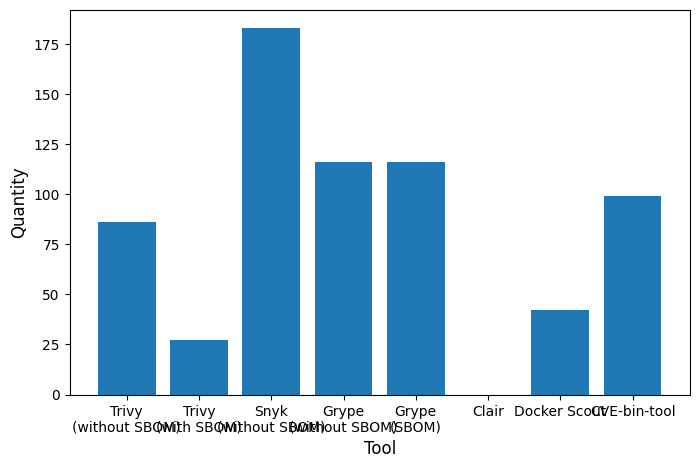

In [5]:
import matplotlib.pyplot as plt
import numpy as np

lobby_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(lobby_trivy), len(lobby_trivy_sbom), len(lobby_snyk_no_sbom), len(lobby_grype_no_sbom),
                 len(lobby_grype_sbom), len(lobby_clair), len(lobby_docker_scout), len(lobby_cve_bin_tool)]
}

x = np.array(lobby_data["Tool"])
y = np.array(lobby_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [6]:
lobby_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), lobby_trivy))
lobby_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), lobby_trivy_sbom))
lobby_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), lobby_snyk_no_sbom))
lobby_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), lobby_grype_no_sbom))
lobby_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), lobby_grype_sbom))
lobby_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), lobby_clair))
lobby_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), lobby_docker_scout))
lobby_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), lobby_cve_bin_tool))

lobby_trivy_no_sbom_intersection = find_cve_intersection(
    lobby_trivy_no_sbom_cve,
    lobby_cve_bin_tool_cve,
)

lobby_trivy_sbom_intersection = find_cve_intersection(
    lobby_trivy_sbom_cve,
    lobby_cve_bin_tool_cve,
)

lobby_snyk_no_sbom_intersection = find_cve_intersection(
    lobby_snyk_no_sbom_cve,
    lobby_cve_bin_tool_cve,
)

lobby_grype_no_sbom_intersection = find_cve_intersection(
    lobby_grype_no_sbom_cve,
    lobby_cve_bin_tool_cve,
)

lobby_grype_sbom_intersection = find_cve_intersection(
    lobby_grype_sbom_cve,
    lobby_cve_bin_tool_cve,
)

lobby_clair_intersection = find_cve_intersection(
    lobby_clair_cve,
    lobby_cve_bin_tool_cve,
)

lobby_docker_scout_intersection = find_cve_intersection(
    lobby_docker_scout_cve,
    lobby_cve_bin_tool_cve,
)

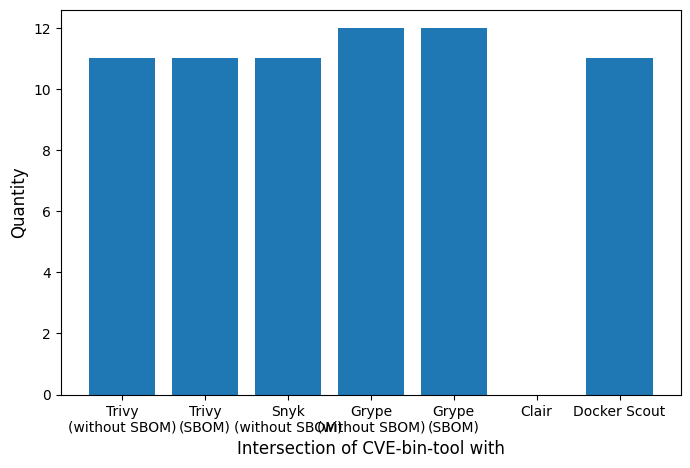

In [7]:
import matplotlib.pyplot as plt

lobby_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(lobby_trivy_no_sbom_intersection), len(lobby_trivy_sbom_intersection), len(lobby_snyk_no_sbom_intersection), len(lobby_grype_no_sbom_intersection), len(lobby_grype_sbom_intersection), len(lobby_clair_intersection), len(lobby_docker_scout_intersection)]
}

x = np.array(lobby_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(lobby_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x,y)
plt.show()

In [8]:
lobby_data = {
    "trivy": len(lobby_trivy),
    "trivy_sbom": len(lobby_trivy_sbom),
    "snyk": len(lobby_snyk_no_sbom),
    "grype": len(lobby_grype_no_sbom),
    "grype_sbom": len(lobby_grype_sbom),
    "clair": len(lobby_clair),
    "docker_scout": len(lobby_docker_scout),
    "cve_bin_tool": len(lobby_cve_bin_tool),
    
    "trivy_intersection": len(lobby_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(lobby_trivy_sbom_intersection),
    "snyk_intersection": len(lobby_snyk_no_sbom_intersection),
    "grype_intersection": len(lobby_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(lobby_grype_sbom_intersection),
    "clair_intersection": len(lobby_clair_intersection),
    "docker_scout_intersection": len(lobby_docker_scout_intersection),
}

# balenalib/up-core-fedora-node

In [9]:
balenalib_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_balenalib_up-core-fedora-node_2024-12-21T18:50:11.169580"

with open(balenalib_path + "/trivy.json", "r") as txt:
    balenalib_trivy = json.load(txt)
with open(balenalib_path + "/trivy_sbom.json", "r") as txt:
    balenalib_trivy_sbom = json.load(txt)
with open(balenalib_path + "/snyk_no_sbom.json", "r") as txt:
    balenalib_snyk_no_sbom = json.load(txt)
with open(balenalib_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    balenalib_grype_no_sbom = json.load(txt)
with open(balenalib_path + "/grype_sbom.json", "r") as txt:
    balenalib_grype_sbom = json.load(txt)
with open(balenalib_path + "/clair.json", "r") as txt:
    balenalib_clair = json.load(txt)
with open(balenalib_path + "/tool.json", "r") as txt:
    balenalib_cve_bin_tool = json.load(txt)

with open(balenalib_path + "/docker_scout_with_sbom.json", "r") as txt:
    balenalib_docker_scout = json.load(txt)

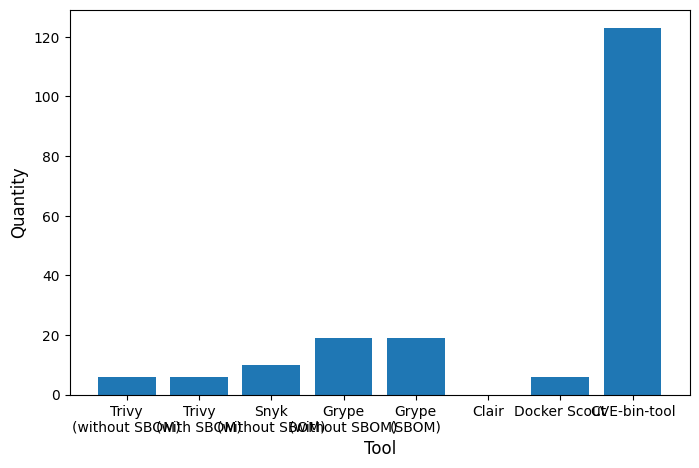

In [10]:
import matplotlib.pyplot as plt
import numpy as np

balenalib_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(balenalib_trivy), len(balenalib_trivy_sbom), len(balenalib_snyk_no_sbom), len(balenalib_grype_no_sbom),
                 len(balenalib_grype_sbom), len(balenalib_clair), len(balenalib_docker_scout), len(balenalib_cve_bin_tool)]
}

x = np.array(balenalib_data["Tool"])
y = np.array(balenalib_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [11]:
balenalib_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), balenalib_trivy))
balenalib_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), balenalib_trivy_sbom))
balenalib_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), balenalib_snyk_no_sbom))
balenalib_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), balenalib_grype_no_sbom))
balenalib_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), balenalib_grype_sbom))
balenalib_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), balenalib_clair))
balenalib_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), balenalib_docker_scout))
balenalib_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), balenalib_cve_bin_tool))

balenalib_trivy_no_sbom_intersection = find_cve_intersection(
    balenalib_trivy_no_sbom_cve,
    balenalib_cve_bin_tool_cve,
)

balenalib_trivy_sbom_intersection = find_cve_intersection(
    balenalib_trivy_sbom_cve,
    balenalib_cve_bin_tool_cve,
)

balenalib_snyk_no_sbom_intersection = find_cve_intersection(
    balenalib_snyk_no_sbom_cve,
    balenalib_cve_bin_tool_cve,
)

balenalib_grype_no_sbom_intersection = find_cve_intersection(
    balenalib_grype_no_sbom_cve,
    balenalib_cve_bin_tool_cve,
)

balenalib_grype_sbom_intersection = find_cve_intersection(
    balenalib_grype_sbom_cve,
    balenalib_cve_bin_tool_cve,
)

balenalib_clair_intersection = find_cve_intersection(
    balenalib_clair_cve,
    balenalib_cve_bin_tool_cve,
)

balenalib_docker_scout_intersection = find_cve_intersection(
    balenalib_docker_scout_cve,
    balenalib_cve_bin_tool_cve,
)

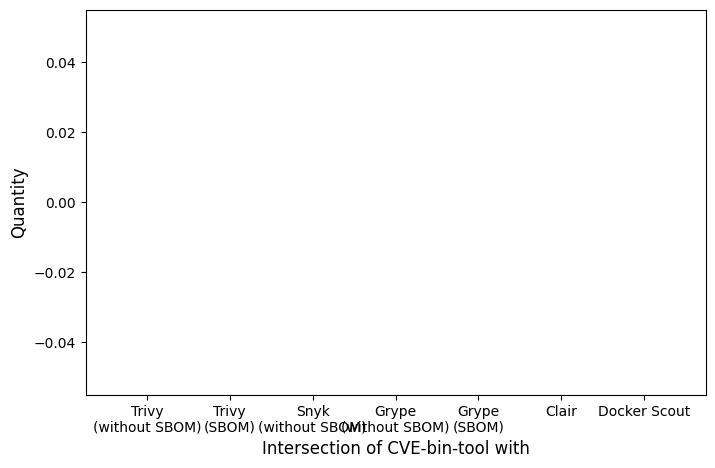

In [12]:
import matplotlib.pyplot as plt

balenalib_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(balenalib_trivy_no_sbom_intersection), len(balenalib_trivy_sbom_intersection),
                 len(balenalib_snyk_no_sbom_intersection), len(balenalib_grype_no_sbom_intersection),
                 len(balenalib_grype_sbom_intersection), len(balenalib_clair_intersection),
                 len(balenalib_docker_scout_intersection)]
}

x = np.array(balenalib_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(balenalib_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [13]:
balenalib_data = {
    "trivy": len(balenalib_trivy),
    "trivy_sbom": len(balenalib_trivy_sbom),
    "snyk": len(balenalib_snyk_no_sbom),
    "grype": len(balenalib_grype_no_sbom),
    "grype_sbom": len(balenalib_grype_sbom),
    "clair": len(balenalib_clair),
    "docker_scout": len(balenalib_docker_scout),
    "cve_bin_tool": len(balenalib_cve_bin_tool),

    "trivy_intersection": len(balenalib_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(balenalib_trivy_sbom_intersection),
    "snyk_intersection": len(balenalib_snyk_no_sbom_intersection),
    "grype_intersection": len(balenalib_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(balenalib_grype_sbom_intersection),
    "clair_intersection": len(balenalib_clair_intersection),
    "docker_scout_intersection": len(balenalib_docker_scout_intersection),
}

# vaibhavsingh007/rp_lyra

In [14]:
rp_lyra_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_vaibhavsingh007_rp_lyra_2024-12-21T18:56:03.957617"

with open(rp_lyra_path + "/trivy.json", "r") as txt:
    rp_lyra_trivy = json.load(txt)
with open(rp_lyra_path + "/trivy_sbom.json", "r") as txt:
    rp_lyra_trivy_sbom = json.load(txt)
with open(rp_lyra_path + "/snyk_no_sbom.json", "r") as txt:
    rp_lyra_snyk_no_sbom = json.load(txt)
with open(rp_lyra_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    rp_lyra_grype_no_sbom = json.load(txt)
with open(rp_lyra_path + "/grype_sbom.json", "r") as txt:
    rp_lyra_grype_sbom = json.load(txt)
with open(rp_lyra_path + "/clair.json", "r") as txt:
    rp_lyra_clair = json.load(txt)
with open(rp_lyra_path + "/tool.json", "r") as txt:
    rp_lyra_cve_bin_tool = json.load(txt)

with open(rp_lyra_path + "/docker_scout_with_sbom.json", "r") as txt:
    rp_lyra_docker_scout = json.load(txt)

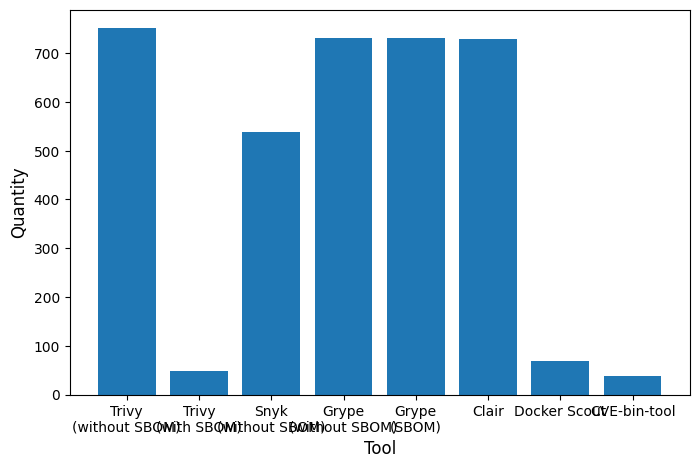

In [15]:
import matplotlib.pyplot as plt
import numpy as np

rp_lyra_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(rp_lyra_trivy), len(rp_lyra_trivy_sbom), len(rp_lyra_snyk_no_sbom), len(rp_lyra_grype_no_sbom),
                 len(rp_lyra_grype_sbom), len(rp_lyra_clair), len(rp_lyra_docker_scout), len(rp_lyra_cve_bin_tool)]
}

x = np.array(rp_lyra_data["Tool"])
y = np.array(rp_lyra_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [16]:
rp_lyra_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rp_lyra_trivy))
rp_lyra_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rp_lyra_trivy_sbom))
rp_lyra_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rp_lyra_snyk_no_sbom))
rp_lyra_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rp_lyra_grype_no_sbom))
rp_lyra_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rp_lyra_grype_sbom))
rp_lyra_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rp_lyra_clair))
rp_lyra_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rp_lyra_docker_scout))
rp_lyra_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), rp_lyra_cve_bin_tool))

rp_lyra_trivy_no_sbom_intersection = find_cve_intersection(
    rp_lyra_trivy_no_sbom_cve,
    rp_lyra_cve_bin_tool_cve,
)

rp_lyra_trivy_sbom_intersection = find_cve_intersection(
    rp_lyra_trivy_sbom_cve,
    rp_lyra_cve_bin_tool_cve,
)

rp_lyra_snyk_no_sbom_intersection = find_cve_intersection(
    rp_lyra_snyk_no_sbom_cve,
    rp_lyra_cve_bin_tool_cve,
)

rp_lyra_grype_no_sbom_intersection = find_cve_intersection(
    rp_lyra_grype_no_sbom_cve,
    rp_lyra_cve_bin_tool_cve,
)

rp_lyra_grype_sbom_intersection = find_cve_intersection(
    rp_lyra_grype_sbom_cve,
    rp_lyra_cve_bin_tool_cve,
)

rp_lyra_clair_intersection = find_cve_intersection(
    rp_lyra_clair_cve,
    rp_lyra_cve_bin_tool_cve,
)

rp_lyra_docker_scout_intersection = find_cve_intersection(
    rp_lyra_docker_scout_cve,
    rp_lyra_cve_bin_tool_cve,
)

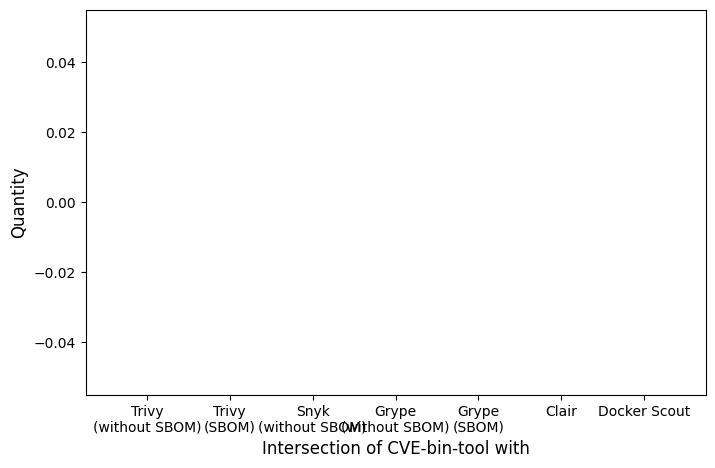

In [17]:
import matplotlib.pyplot as plt

rp_lyra_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(rp_lyra_trivy_no_sbom_intersection), len(rp_lyra_trivy_sbom_intersection),
                 len(rp_lyra_snyk_no_sbom_intersection), len(rp_lyra_grype_no_sbom_intersection),
                 len(rp_lyra_grype_sbom_intersection), len(rp_lyra_clair_intersection),
                 len(rp_lyra_docker_scout_intersection)]
}

x = np.array(rp_lyra_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(rp_lyra_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [18]:
rp_lyra_data = {
    "trivy": len(rp_lyra_trivy),
    "trivy_sbom": len(rp_lyra_trivy_sbom),
    "snyk": len(rp_lyra_snyk_no_sbom),
    "grype": len(rp_lyra_grype_no_sbom),
    "grype_sbom": len(rp_lyra_grype_sbom),
    "clair": len(rp_lyra_clair),
    "docker_scout": len(rp_lyra_docker_scout),
    "cve_bin_tool": len(rp_lyra_cve_bin_tool),

    "trivy_intersection": len(rp_lyra_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(rp_lyra_trivy_sbom_intersection),
    "snyk_intersection": len(rp_lyra_snyk_no_sbom_intersection),
    "grype_intersection": len(rp_lyra_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(rp_lyra_grype_sbom_intersection),
    "clair_intersection": len(rp_lyra_clair_intersection),
    "docker_scout_intersection": len(rp_lyra_docker_scout_intersection),
}

# psimler/myworkerservice

In [20]:
myworkerservice_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_psimler_myworkerservice_2024-12-21T19:01:25.284597"

with open(myworkerservice_path + "/trivy.json", "r") as txt:
    myworkerservice_trivy = json.load(txt)
with open(myworkerservice_path + "/trivy_sbom.json", "r") as txt:
    myworkerservice_trivy_sbom = json.load(txt)
with open(myworkerservice_path + "/snyk_no_sbom.json", "r") as txt:
    myworkerservice_snyk_no_sbom = json.load(txt)
with open(myworkerservice_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    myworkerservice_grype_no_sbom = json.load(txt)
with open(myworkerservice_path + "/grype_sbom.json", "r") as txt:
    myworkerservice_grype_sbom = json.load(txt)
with open(myworkerservice_path + "/clair.json", "r") as txt:
    myworkerservice_clair = json.load(txt)
with open(myworkerservice_path + "/tool.json", "r") as txt:
    myworkerservice_cve_bin_tool = json.load(txt)

with open(myworkerservice_path + "/docker_scout_with_sbom.json", "r") as txt:
    myworkerservice_docker_scout = json.load(txt)

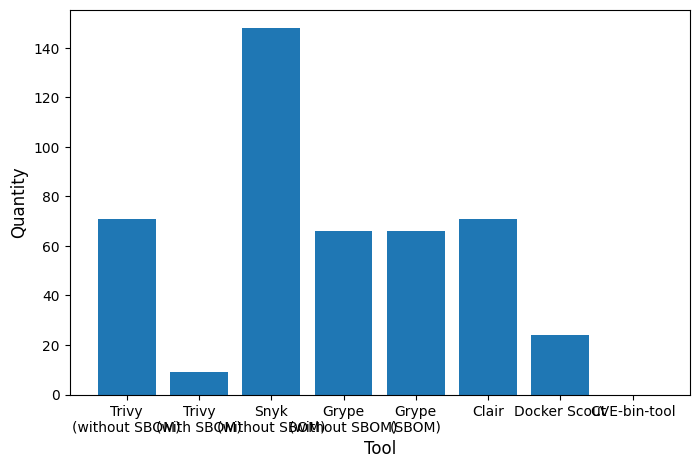

In [21]:
import matplotlib.pyplot as plt
import numpy as np

myworkerservice_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(myworkerservice_trivy), len(myworkerservice_trivy_sbom), len(myworkerservice_snyk_no_sbom), len(myworkerservice_grype_no_sbom),
                 len(myworkerservice_grype_sbom), len(myworkerservice_clair), len(myworkerservice_docker_scout), len(myworkerservice_cve_bin_tool)]
}

x = np.array(myworkerservice_data["Tool"])
y = np.array(myworkerservice_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [22]:
myworkerservice_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), myworkerservice_trivy))
myworkerservice_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), myworkerservice_trivy_sbom))
myworkerservice_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), myworkerservice_snyk_no_sbom))
myworkerservice_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), myworkerservice_grype_no_sbom))
myworkerservice_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), myworkerservice_grype_sbom))
myworkerservice_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), myworkerservice_clair))
myworkerservice_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), myworkerservice_docker_scout))
myworkerservice_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), myworkerservice_cve_bin_tool))

myworkerservice_trivy_no_sbom_intersection = find_cve_intersection(
    myworkerservice_trivy_no_sbom_cve,
    myworkerservice_cve_bin_tool_cve,
)

myworkerservice_trivy_sbom_intersection = find_cve_intersection(
    myworkerservice_trivy_sbom_cve,
    myworkerservice_cve_bin_tool_cve,
)

myworkerservice_snyk_no_sbom_intersection = find_cve_intersection(
    myworkerservice_snyk_no_sbom_cve,
    myworkerservice_cve_bin_tool_cve,
)

myworkerservice_grype_no_sbom_intersection = find_cve_intersection(
    myworkerservice_grype_no_sbom_cve,
    myworkerservice_cve_bin_tool_cve,
)

myworkerservice_grype_sbom_intersection = find_cve_intersection(
    myworkerservice_grype_sbom_cve,
    myworkerservice_cve_bin_tool_cve,
)

myworkerservice_clair_intersection = find_cve_intersection(
    myworkerservice_clair_cve,
    myworkerservice_cve_bin_tool_cve,
)

myworkerservice_docker_scout_intersection = find_cve_intersection(
    myworkerservice_docker_scout_cve,
    myworkerservice_cve_bin_tool_cve,
)

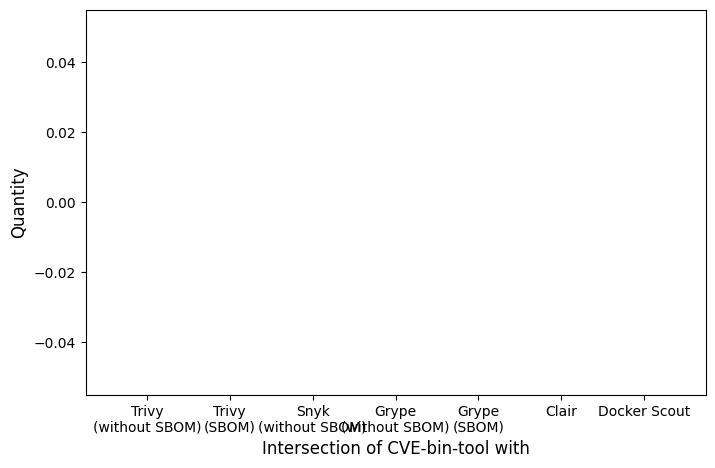

In [23]:
import matplotlib.pyplot as plt

myworkerservice_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(myworkerservice_trivy_no_sbom_intersection), len(myworkerservice_trivy_sbom_intersection),
                 len(myworkerservice_snyk_no_sbom_intersection), len(myworkerservice_grype_no_sbom_intersection),
                 len(myworkerservice_grype_sbom_intersection), len(myworkerservice_clair_intersection),
                 len(myworkerservice_docker_scout_intersection)]
}

x = np.array(myworkerservice_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(myworkerservice_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [24]:
myworkerservice_data = {
    "trivy": len(myworkerservice_trivy),
    "trivy_sbom": len(myworkerservice_trivy_sbom),
    "snyk": len(myworkerservice_snyk_no_sbom),
    "grype": len(myworkerservice_grype_no_sbom),
    "grype_sbom": len(myworkerservice_grype_sbom),
    "clair": len(myworkerservice_clair),
    "docker_scout": len(myworkerservice_docker_scout),
    "cve_bin_tool": len(myworkerservice_cve_bin_tool),

    "trivy_intersection": len(myworkerservice_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(myworkerservice_trivy_sbom_intersection),
    "snyk_intersection": len(myworkerservice_snyk_no_sbom_intersection),
    "grype_intersection": len(myworkerservice_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(myworkerservice_grype_sbom_intersection),
    "clair_intersection": len(myworkerservice_clair_intersection),
    "docker_scout_intersection": len(myworkerservice_docker_scout_intersection),
}

# binartist/mo-service-graph

In [27]:
mo_service_graph_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_binartist_mo-service-graph_2024-12-21T19:02:26.776598"

with open(mo_service_graph_path + "/trivy.json", "r") as txt:
    mo_service_graph_trivy = json.load(txt)
with open(mo_service_graph_path + "/trivy_sbom.json", "r") as txt:
    mo_service_graph_trivy_sbom = json.load(txt)
with open(mo_service_graph_path + "/snyk_no_sbom.json", "r") as txt:
    mo_service_graph_snyk_no_sbom = json.load(txt)
with open(mo_service_graph_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    mo_service_graph_grype_no_sbom = json.load(txt)
with open(mo_service_graph_path + "/grype_sbom.json", "r") as txt:
    mo_service_graph_grype_sbom = json.load(txt)
with open(mo_service_graph_path + "/clair.json", "r") as txt:
    mo_service_graph_clair = json.load(txt)
with open(mo_service_graph_path + "/tool.json", "r") as txt:
    mo_service_graph_cve_bin_tool = json.load(txt)

with open(mo_service_graph_path + "/docker_scout_with_sbom.json", "r") as txt:
    mo_service_graph_docker_scout = json.load(txt)

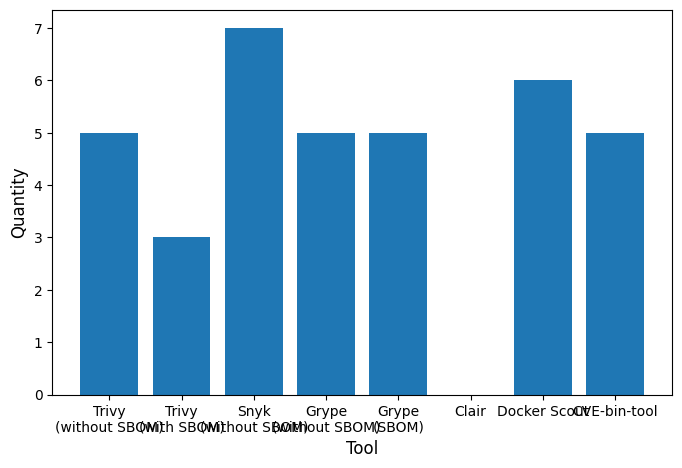

In [28]:
import matplotlib.pyplot as plt
import numpy as np

mo_service_graph_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(mo_service_graph_trivy), len(mo_service_graph_trivy_sbom), len(mo_service_graph_snyk_no_sbom), len(mo_service_graph_grype_no_sbom),
                 len(mo_service_graph_grype_sbom), len(mo_service_graph_clair), len(mo_service_graph_docker_scout), len(mo_service_graph_cve_bin_tool)]
}

x = np.array(mo_service_graph_data["Tool"])
y = np.array(mo_service_graph_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [29]:
mo_service_graph_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mo_service_graph_trivy))
mo_service_graph_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mo_service_graph_trivy_sbom))
mo_service_graph_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mo_service_graph_snyk_no_sbom))
mo_service_graph_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mo_service_graph_grype_no_sbom))
mo_service_graph_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mo_service_graph_grype_sbom))
mo_service_graph_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mo_service_graph_clair))
mo_service_graph_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mo_service_graph_docker_scout))
mo_service_graph_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), mo_service_graph_cve_bin_tool))

mo_service_graph_trivy_no_sbom_intersection = find_cve_intersection(
    mo_service_graph_trivy_no_sbom_cve,
    mo_service_graph_cve_bin_tool_cve,
)

mo_service_graph_trivy_sbom_intersection = find_cve_intersection(
    mo_service_graph_trivy_sbom_cve,
    mo_service_graph_cve_bin_tool_cve,
)

mo_service_graph_snyk_no_sbom_intersection = find_cve_intersection(
    mo_service_graph_snyk_no_sbom_cve,
    mo_service_graph_cve_bin_tool_cve,
)

mo_service_graph_grype_no_sbom_intersection = find_cve_intersection(
    mo_service_graph_grype_no_sbom_cve,
    mo_service_graph_cve_bin_tool_cve,
)

mo_service_graph_grype_sbom_intersection = find_cve_intersection(
    mo_service_graph_grype_sbom_cve,
    mo_service_graph_cve_bin_tool_cve,
)

mo_service_graph_clair_intersection = find_cve_intersection(
    mo_service_graph_clair_cve,
    mo_service_graph_cve_bin_tool_cve,
)

mo_service_graph_docker_scout_intersection = find_cve_intersection(
    mo_service_graph_docker_scout_cve,
    mo_service_graph_cve_bin_tool_cve,
)

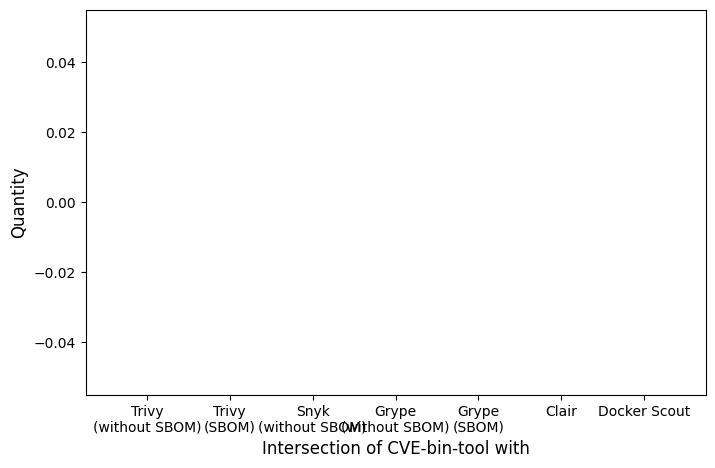

In [30]:
import matplotlib.pyplot as plt

mo_service_graph_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(mo_service_graph_trivy_no_sbom_intersection), len(mo_service_graph_trivy_sbom_intersection),
                 len(mo_service_graph_snyk_no_sbom_intersection), len(mo_service_graph_grype_no_sbom_intersection),
                 len(mo_service_graph_grype_sbom_intersection), len(mo_service_graph_clair_intersection),
                 len(mo_service_graph_docker_scout_intersection)]
}

x = np.array(mo_service_graph_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(mo_service_graph_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [31]:
mo_service_graph_data = {
    "trivy": len(mo_service_graph_trivy),
    "trivy_sbom": len(mo_service_graph_trivy_sbom),
    "snyk": len(mo_service_graph_snyk_no_sbom),
    "grype": len(mo_service_graph_grype_no_sbom),
    "grype_sbom": len(mo_service_graph_grype_sbom),
    "clair": len(mo_service_graph_clair),
    "docker_scout": len(mo_service_graph_docker_scout),
    "cve_bin_tool": len(mo_service_graph_cve_bin_tool),

    "trivy_intersection": len(mo_service_graph_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(mo_service_graph_trivy_sbom_intersection),
    "snyk_intersection": len(mo_service_graph_snyk_no_sbom_intersection),
    "grype_intersection": len(mo_service_graph_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(mo_service_graph_grype_sbom_intersection),
    "clair_intersection": len(mo_service_graph_clair_intersection),
    "docker_scout_intersection": len(mo_service_graph_docker_scout_intersection),
}

# kubesphere/whizard-telemetry-apiserver

In [32]:
kubesphere_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_kubesphere_whizard-telemetry-apiserver_2024-12-21T21:13:27.834206"

with open(kubesphere_path + "/trivy.json", "r") as txt:
    kubesphere_trivy = json.load(txt)
with open(kubesphere_path + "/trivy_sbom.json", "r") as txt:
    kubesphere_trivy_sbom = json.load(txt)
with open(kubesphere_path + "/snyk_no_sbom.json", "r") as txt:
    kubesphere_snyk_no_sbom = json.load(txt)
with open(kubesphere_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    kubesphere_grype_no_sbom = json.load(txt)
with open(kubesphere_path + "/grype_sbom.json", "r") as txt:
    kubesphere_grype_sbom = json.load(txt)
with open(kubesphere_path + "/clair.json", "r") as txt:
    kubesphere_clair = json.load(txt)
with open(kubesphere_path + "/tool.json", "r") as txt:
    kubesphere_cve_bin_tool = json.load(txt)

with open(kubesphere_path + "/docker_scout_with_sbom.json", "r") as txt:
    kubesphere_docker_scout = json.load(txt)

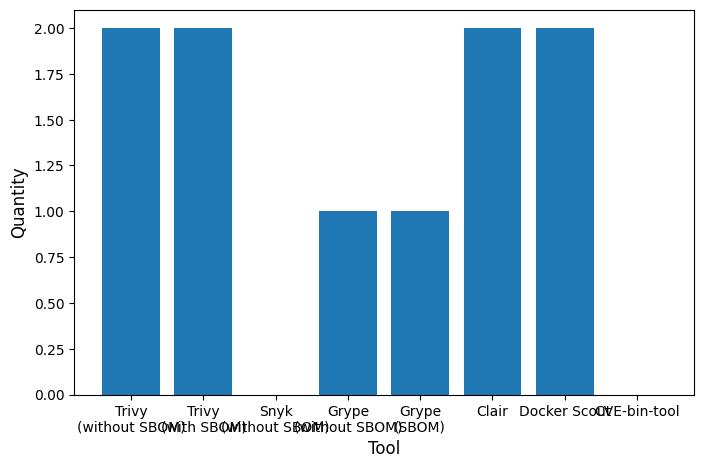

In [33]:
import matplotlib.pyplot as plt
import numpy as np

kubesphere_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(kubesphere_trivy), len(kubesphere_trivy_sbom), len(kubesphere_snyk_no_sbom), len(kubesphere_grype_no_sbom),
                 len(kubesphere_grype_sbom), len(kubesphere_clair), len(kubesphere_docker_scout), len(kubesphere_cve_bin_tool)]
}

x = np.array(kubesphere_data["Tool"])
y = np.array(kubesphere_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [34]:
kubesphere_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kubesphere_trivy))
kubesphere_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kubesphere_trivy_sbom))
kubesphere_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kubesphere_snyk_no_sbom))
kubesphere_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kubesphere_grype_no_sbom))
kubesphere_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kubesphere_grype_sbom))
kubesphere_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kubesphere_clair))
kubesphere_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kubesphere_docker_scout))
kubesphere_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kubesphere_cve_bin_tool))

kubesphere_trivy_no_sbom_intersection = find_cve_intersection(
    kubesphere_trivy_no_sbom_cve,
    kubesphere_cve_bin_tool_cve,
)

kubesphere_trivy_sbom_intersection = find_cve_intersection(
    kubesphere_trivy_sbom_cve,
    kubesphere_cve_bin_tool_cve,
)

kubesphere_snyk_no_sbom_intersection = find_cve_intersection(
    kubesphere_snyk_no_sbom_cve,
    kubesphere_cve_bin_tool_cve,
)

kubesphere_grype_no_sbom_intersection = find_cve_intersection(
    kubesphere_grype_no_sbom_cve,
    kubesphere_cve_bin_tool_cve,
)

kubesphere_grype_sbom_intersection = find_cve_intersection(
    kubesphere_grype_sbom_cve,
    kubesphere_cve_bin_tool_cve,
)

kubesphere_clair_intersection = find_cve_intersection(
    kubesphere_clair_cve,
    kubesphere_cve_bin_tool_cve,
)

kubesphere_docker_scout_intersection = find_cve_intersection(
    kubesphere_docker_scout_cve,
    kubesphere_cve_bin_tool_cve,
)

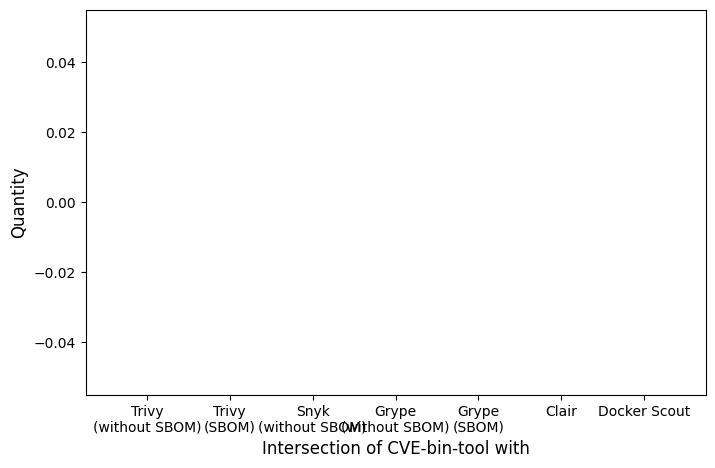

In [35]:
import matplotlib.pyplot as plt

kubesphere_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(kubesphere_trivy_no_sbom_intersection), len(kubesphere_trivy_sbom_intersection),
                 len(kubesphere_snyk_no_sbom_intersection), len(kubesphere_grype_no_sbom_intersection),
                 len(kubesphere_grype_sbom_intersection), len(kubesphere_clair_intersection),
                 len(kubesphere_docker_scout_intersection)]
}

x = np.array(kubesphere_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(kubesphere_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [36]:
kubesphere_data = {
    "trivy": len(kubesphere_trivy),
    "trivy_sbom": len(kubesphere_trivy_sbom),
    "snyk": len(kubesphere_snyk_no_sbom),
    "grype": len(kubesphere_grype_no_sbom),
    "grype_sbom": len(kubesphere_grype_sbom),
    "clair": len(kubesphere_clair),
    "docker_scout": len(kubesphere_docker_scout),
    "cve_bin_tool": len(kubesphere_cve_bin_tool),

    "trivy_intersection": len(kubesphere_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(kubesphere_trivy_sbom_intersection),
    "snyk_intersection": len(kubesphere_snyk_no_sbom_intersection),
    "grype_intersection": len(kubesphere_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(kubesphere_grype_sbom_intersection),
    "clair_intersection": len(kubesphere_clair_intersection),
    "docker_scout_intersection": len(kubesphere_docker_scout_intersection),
}

# hexlo/terraria-tmodloader-server

In [37]:
terraria_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_hexlo_terraria-tmodloader-server_2024-12-21T21:15:19.828715"

with open(terraria_path + "/trivy.json", "r") as txt:
    terraria_trivy = json.load(txt)
with open(terraria_path + "/trivy_sbom.json", "r") as txt:
    terraria_trivy_sbom = json.load(txt)
with open(terraria_path + "/snyk_no_sbom.json", "r") as txt:
    terraria_snyk_no_sbom = json.load(txt)
with open(terraria_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    terraria_grype_no_sbom = json.load(txt)
with open(terraria_path + "/grype_sbom.json", "r") as txt:
    terraria_grype_sbom = json.load(txt)
with open(terraria_path + "/clair.json", "r") as txt:
    terraria_clair = json.load(txt)
with open(terraria_path + "/tool.json", "r") as txt:
    terraria_cve_bin_tool = json.load(txt)

with open(terraria_path + "/docker_scout_with_sbom.json", "r") as txt:
    terraria_docker_scout = json.load(txt)

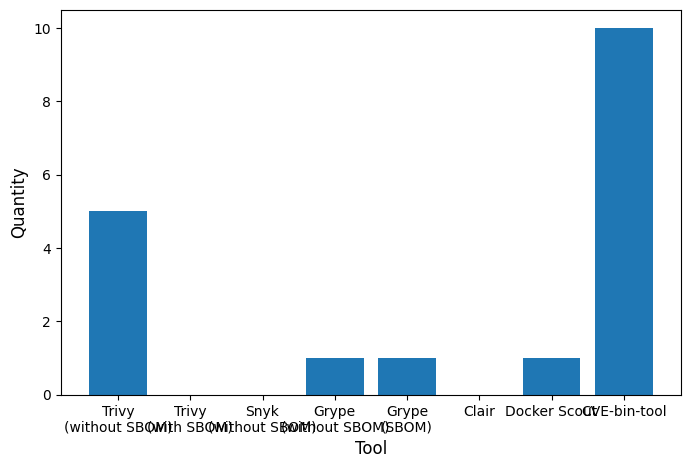

In [38]:
import matplotlib.pyplot as plt
import numpy as np

terraria_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(terraria_trivy), len(terraria_trivy_sbom), len(terraria_snyk_no_sbom), len(terraria_grype_no_sbom),
                 len(terraria_grype_sbom), len(terraria_clair), len(terraria_docker_scout), len(terraria_cve_bin_tool)]
}

x = np.array(terraria_data["Tool"])
y = np.array(terraria_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [39]:
terraria_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), terraria_trivy))
terraria_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), terraria_trivy_sbom))
terraria_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), terraria_snyk_no_sbom))
terraria_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), terraria_grype_no_sbom))
terraria_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), terraria_grype_sbom))
terraria_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), terraria_clair))
terraria_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), terraria_docker_scout))
terraria_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), terraria_cve_bin_tool))

terraria_trivy_no_sbom_intersection = find_cve_intersection(
    terraria_trivy_no_sbom_cve,
    terraria_cve_bin_tool_cve,
)

terraria_trivy_sbom_intersection = find_cve_intersection(
    terraria_trivy_sbom_cve,
    terraria_cve_bin_tool_cve,
)

terraria_snyk_no_sbom_intersection = find_cve_intersection(
    terraria_snyk_no_sbom_cve,
    terraria_cve_bin_tool_cve,
)

terraria_grype_no_sbom_intersection = find_cve_intersection(
    terraria_grype_no_sbom_cve,
    terraria_cve_bin_tool_cve,
)

terraria_grype_sbom_intersection = find_cve_intersection(
    terraria_grype_sbom_cve,
    terraria_cve_bin_tool_cve,
)

terraria_clair_intersection = find_cve_intersection(
    terraria_clair_cve,
    terraria_cve_bin_tool_cve,
)

terraria_docker_scout_intersection = find_cve_intersection(
    terraria_docker_scout_cve,
    terraria_cve_bin_tool_cve,
)

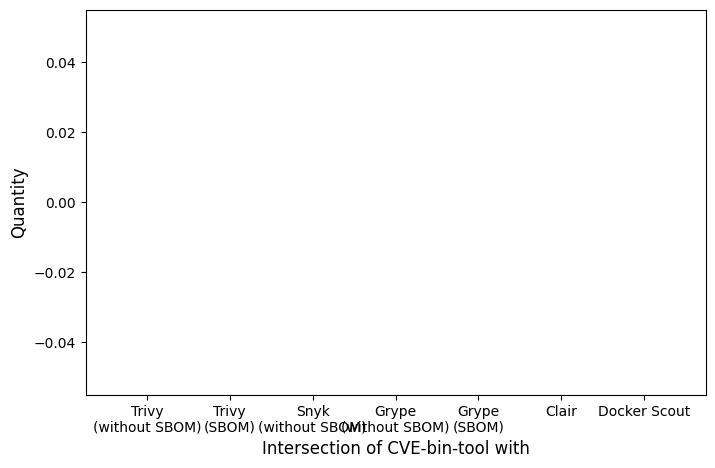

In [40]:
import matplotlib.pyplot as plt

terraria_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(terraria_trivy_no_sbom_intersection), len(terraria_trivy_sbom_intersection),
                 len(terraria_snyk_no_sbom_intersection), len(terraria_grype_no_sbom_intersection),
                 len(terraria_grype_sbom_intersection), len(terraria_clair_intersection),
                 len(terraria_docker_scout_intersection)]
}

x = np.array(terraria_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(terraria_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [41]:
terraria_data = {
    "trivy": len(terraria_trivy),
    "trivy_sbom": len(terraria_trivy_sbom),
    "snyk": len(terraria_snyk_no_sbom),
    "grype": len(terraria_grype_no_sbom),
    "grype_sbom": len(terraria_grype_sbom),
    "clair": len(terraria_clair),
    "docker_scout": len(terraria_docker_scout),
    "cve_bin_tool": len(terraria_cve_bin_tool),

    "trivy_intersection": len(terraria_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(terraria_trivy_sbom_intersection),
    "snyk_intersection": len(terraria_snyk_no_sbom_intersection),
    "grype_intersection": len(terraria_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(terraria_grype_sbom_intersection),
    "clair_intersection": len(terraria_clair_intersection),
    "docker_scout_intersection": len(terraria_docker_scout_intersection),
}

# llidor1223/kaplatdb

In [42]:
kaplatdb_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_llidor1223_kaplatdb_2024-12-21T23:54:38.222283"

with open(kaplatdb_path + "/trivy.json", "r") as txt:
    kaplatdb_trivy = json.load(txt)
with open(kaplatdb_path + "/trivy_sbom.json", "r") as txt:
    kaplatdb_trivy_sbom = json.load(txt)
with open(kaplatdb_path + "/snyk_no_sbom.json", "r") as txt:
    kaplatdb_snyk_no_sbom = json.load(txt)
with open(kaplatdb_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    kaplatdb_grype_no_sbom = json.load(txt)
with open(kaplatdb_path + "/grype_sbom.json", "r") as txt:
    kaplatdb_grype_sbom = json.load(txt)
with open(kaplatdb_path + "/clair.json", "r") as txt:
    kaplatdb_clair = json.load(txt)
with open(kaplatdb_path + "/tool.json", "r") as txt:
    kaplatdb_cve_bin_tool = json.load(txt)
with open(kaplatdb_path + "/docker_scout_with_sbom.json", "r") as txt:
    kaplatdb_docker_scout = json.load(txt)

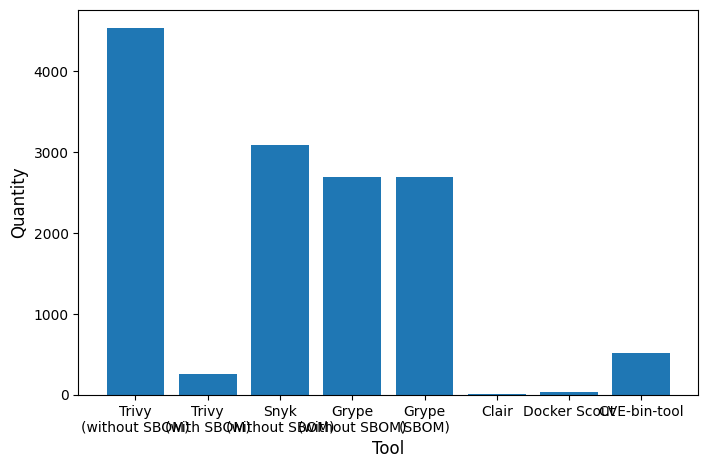

In [43]:
import matplotlib.pyplot as plt
import numpy as np

kaplatdb_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(kaplatdb_trivy), len(kaplatdb_trivy_sbom), len(kaplatdb_snyk_no_sbom), len(kaplatdb_grype_no_sbom),
                 len(kaplatdb_grype_sbom), len(kaplatdb_clair), len(kaplatdb_docker_scout), len(kaplatdb_cve_bin_tool)]
}

x = np.array(kaplatdb_data["Tool"])
y = np.array(kaplatdb_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [44]:
kaplatdb_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kaplatdb_trivy))
kaplatdb_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kaplatdb_trivy_sbom))
kaplatdb_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kaplatdb_snyk_no_sbom))
kaplatdb_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kaplatdb_grype_no_sbom))
kaplatdb_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kaplatdb_grype_sbom))
kaplatdb_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kaplatdb_clair))
kaplatdb_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kaplatdb_docker_scout))
kaplatdb_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), kaplatdb_cve_bin_tool))

kaplatdb_trivy_no_sbom_intersection = find_cve_intersection(
    kaplatdb_trivy_no_sbom_cve,
    kaplatdb_cve_bin_tool_cve,
)

kaplatdb_trivy_sbom_intersection = find_cve_intersection(
    kaplatdb_trivy_sbom_cve,
    kaplatdb_cve_bin_tool_cve,
)

kaplatdb_snyk_no_sbom_intersection = find_cve_intersection(
    kaplatdb_snyk_no_sbom_cve,
    kaplatdb_cve_bin_tool_cve,
)

kaplatdb_grype_no_sbom_intersection = find_cve_intersection(
    kaplatdb_grype_no_sbom_cve,
    kaplatdb_cve_bin_tool_cve,
)

kaplatdb_grype_sbom_intersection = find_cve_intersection(
    kaplatdb_grype_sbom_cve,
    kaplatdb_cve_bin_tool_cve,
)

kaplatdb_clair_intersection = find_cve_intersection(
    kaplatdb_clair_cve,
    kaplatdb_cve_bin_tool_cve,
)

kaplatdb_docker_scout_intersection = find_cve_intersection(
    kaplatdb_docker_scout_cve,
    kaplatdb_cve_bin_tool_cve,
)

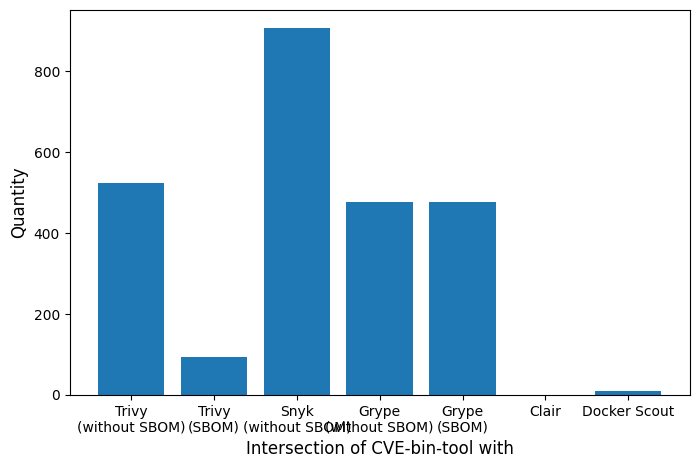

In [45]:
import matplotlib.pyplot as plt

kaplatdb_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(kaplatdb_trivy_no_sbom_intersection), len(kaplatdb_trivy_sbom_intersection),
                 len(kaplatdb_snyk_no_sbom_intersection), len(kaplatdb_grype_no_sbom_intersection),
                 len(kaplatdb_grype_sbom_intersection), len(kaplatdb_clair_intersection),
                 len(kaplatdb_docker_scout_intersection)]
}

x = np.array(kaplatdb_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(kaplatdb_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [46]:
kaplatdb_data = {
    "trivy": len(kaplatdb_trivy),
    "trivy_sbom": len(kaplatdb_trivy_sbom),
    "snyk": len(kaplatdb_snyk_no_sbom),
    "grype": len(kaplatdb_grype_no_sbom),
    "grype_sbom": len(kaplatdb_grype_sbom),
    "clair": len(kaplatdb_clair),
    "docker_scout": len(kaplatdb_docker_scout),
    "cve_bin_tool": len(kaplatdb_cve_bin_tool),

    "trivy_intersection": len(kaplatdb_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(kaplatdb_trivy_sbom_intersection),
    "snyk_intersection": len(kaplatdb_snyk_no_sbom_intersection),
    "grype_intersection": len(kaplatdb_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(kaplatdb_grype_sbom_intersection),
    "clair_intersection": len(kaplatdb_clair_intersection),
    "docker_scout_intersection": len(kaplatdb_docker_scout_intersection),
}

# bytez/mlfoundations-dev_mistral_7b_0-3_oh-dcft-v3.1-llama-3.1-8b

In [48]:
bytez_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_bytez_mlfoundations-dev_mistral_7b_0-3_oh-dcft-v3.1-llama-3.1-8b_2024-12-22T00:26:26.869826"

with open(bytez_path + "/trivy.json", "r") as txt:
    bytez_trivy = json.load(txt)
with open(bytez_path + "/trivy_sbom.json", "r") as txt:
    bytez_trivy_sbom = json.load(txt)
with open(bytez_path + "/snyk_no_sbom.json", "r") as txt:
    bytez_snyk_no_sbom = json.load(txt)
with open(bytez_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    bytez_grype_no_sbom = json.load(txt)
with open(bytez_path + "/grype_sbom.json", "r") as txt:
    bytez_grype_sbom = json.load(txt)
with open(bytez_path + "/clair.json", "r") as txt:
    bytez_clair = json.load(txt)
with open(bytez_path + "/tool.json", "r") as txt:
    bytez_cve_bin_tool = json.load(txt)
with open(bytez_path + "/docker_scout_with_sbom.json", "r") as txt:
    bytez_docker_scout = json.load(txt)

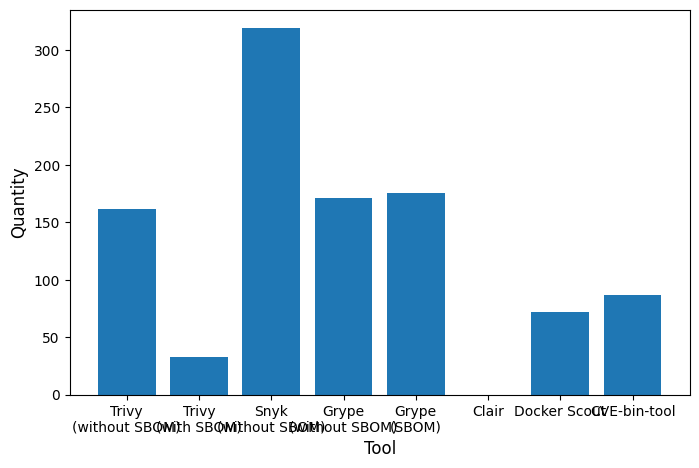

In [49]:
import matplotlib.pyplot as plt
import numpy as np

bytez_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(bytez_trivy), len(bytez_trivy_sbom), len(bytez_snyk_no_sbom), len(bytez_grype_no_sbom),
                 len(bytez_grype_sbom), len(bytez_clair), len(bytez_docker_scout), len(bytez_cve_bin_tool)]
}

x = np.array(bytez_data["Tool"])
y = np.array(bytez_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [50]:
bytez_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bytez_trivy))
bytez_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bytez_trivy_sbom))
bytez_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bytez_snyk_no_sbom))
bytez_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bytez_grype_no_sbom))
bytez_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bytez_grype_sbom))
bytez_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bytez_clair))
bytez_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bytez_docker_scout))
bytez_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), bytez_cve_bin_tool))

bytez_trivy_no_sbom_intersection = find_cve_intersection(
    bytez_trivy_no_sbom_cve,
    bytez_cve_bin_tool_cve,
)

bytez_trivy_sbom_intersection = find_cve_intersection(
    bytez_trivy_sbom_cve,
    bytez_cve_bin_tool_cve,
)

bytez_snyk_no_sbom_intersection = find_cve_intersection(
    bytez_snyk_no_sbom_cve,
    bytez_cve_bin_tool_cve,
)

bytez_grype_no_sbom_intersection = find_cve_intersection(
    bytez_grype_no_sbom_cve,
    bytez_cve_bin_tool_cve,
)

bytez_grype_sbom_intersection = find_cve_intersection(
    bytez_grype_sbom_cve,
    bytez_cve_bin_tool_cve,
)

bytez_clair_intersection = find_cve_intersection(
    bytez_clair_cve,
    bytez_cve_bin_tool_cve,
)

bytez_docker_scout_intersection = find_cve_intersection(
    bytez_docker_scout_cve,
    bytez_cve_bin_tool_cve,
)

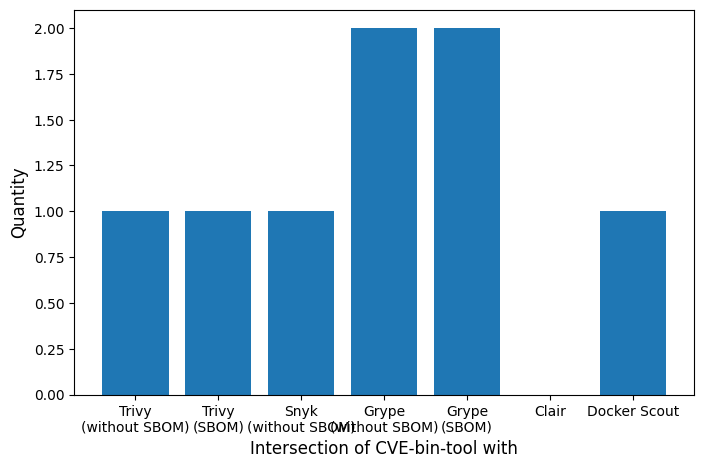

In [51]:
import matplotlib.pyplot as plt

bytez_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(bytez_trivy_no_sbom_intersection), len(bytez_trivy_sbom_intersection),
                 len(bytez_snyk_no_sbom_intersection), len(bytez_grype_no_sbom_intersection),
                 len(bytez_grype_sbom_intersection), len(bytez_clair_intersection),
                 len(bytez_docker_scout_intersection)]
}

x = np.array(bytez_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(bytez_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [52]:
bytez_data = {
    "trivy": len(bytez_trivy),
    "trivy_sbom": len(bytez_trivy_sbom),
    "snyk": len(bytez_snyk_no_sbom),
    "grype": len(bytez_grype_no_sbom),
    "grype_sbom": len(bytez_grype_sbom),
    "clair": len(bytez_clair),
    "docker_scout": len(bytez_docker_scout),
    "cve_bin_tool": len(bytez_cve_bin_tool),

    "trivy_intersection": len(bytez_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(bytez_trivy_sbom_intersection),
    "snyk_intersection": len(bytez_snyk_no_sbom_intersection),
    "grype_intersection": len(bytez_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(bytez_grype_sbom_intersection),
    "clair_intersection": len(bytez_clair_intersection),
    "docker_scout_intersection": len(bytez_docker_scout_intersection),
}

# tryuu/my-computeclass

In [54]:
computeclass_path = "/Users/ilnarkhasanov/Documents/WorkSpace/Diploma/tool/community_images_scanning_results_tryuu_my-computeclass_2024-12-22T00:49:47.437847"

with open(computeclass_path + "/trivy.json", "r") as txt:
    computeclass_trivy = json.load(txt)
with open(computeclass_path + "/trivy_sbom.json", "r") as txt:
    computeclass_trivy_sbom = json.load(txt)
with open(computeclass_path + "/snyk_no_sbom.json", "r") as txt:
    computeclass_snyk_no_sbom = json.load(txt)
with open(computeclass_path + "/grype_without_sbom_no_sbom.json", "r") as txt:
    computeclass_grype_no_sbom = json.load(txt)
with open(computeclass_path + "/grype_sbom.json", "r") as txt:
    computeclass_grype_sbom = json.load(txt)
with open(computeclass_path + "/clair.json", "r") as txt:
    computeclass_clair = json.load(txt)
with open(computeclass_path + "/tool.json", "r") as txt:
    computeclass_cve_bin_tool = json.load(txt)
with open(computeclass_path + "/docker_scout_with_sbom.json", "r") as txt:
    computeclass_docker_scout = json.load(txt)

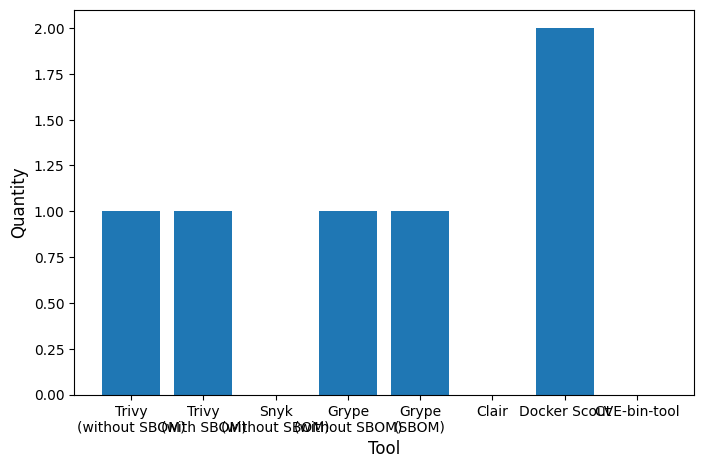

In [55]:
import matplotlib.pyplot as plt
import numpy as np

computeclass_data = {
    "Tool": ["Trivy\n(without SBOM)", "Trivy\n(with SBOM)", "Snyk\n(without SBOM)", "Grype\n(without SBOM)",
             "Grype\n(SBOM)", "Clair", "Docker Scout", "CVE-bin-tool"],
    "Quantity": [len(computeclass_trivy), len(computeclass_trivy_sbom), len(computeclass_snyk_no_sbom), len(computeclass_grype_no_sbom),
                 len(computeclass_grype_sbom), len(computeclass_clair), len(computeclass_docker_scout), len(computeclass_cve_bin_tool)]
}

x = np.array(computeclass_data["Tool"])
y = np.array(computeclass_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Tool', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [57]:
computeclass_trivy_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), computeclass_trivy))
computeclass_trivy_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), computeclass_trivy_sbom))
computeclass_snyk_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), computeclass_snyk_no_sbom))
computeclass_grype_no_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), computeclass_grype_no_sbom))
computeclass_grype_sbom_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), computeclass_grype_sbom))
computeclass_clair_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), computeclass_clair))
computeclass_docker_scout_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), computeclass_docker_scout))
computeclass_cve_bin_tool_cve: list[CVE] = list(map(lambda cve_dict: CVE(**cve_dict), computeclass_cve_bin_tool))

computeclass_trivy_no_sbom_intersection = find_cve_intersection(
    computeclass_trivy_no_sbom_cve,
    computeclass_cve_bin_tool_cve,
)

computeclass_trivy_sbom_intersection = find_cve_intersection(
    computeclass_trivy_sbom_cve,
    computeclass_cve_bin_tool_cve,
)

computeclass_snyk_no_sbom_intersection = find_cve_intersection(
    computeclass_snyk_no_sbom_cve,
    computeclass_cve_bin_tool_cve,
)

computeclass_grype_no_sbom_intersection = find_cve_intersection(
    computeclass_grype_no_sbom_cve,
    computeclass_cve_bin_tool_cve,
)

computeclass_grype_sbom_intersection = find_cve_intersection(
    computeclass_grype_sbom_cve,
    computeclass_cve_bin_tool_cve,
)

computeclass_clair_intersection = find_cve_intersection(
    computeclass_clair_cve,
    computeclass_cve_bin_tool_cve,
)

computeclass_docker_scout_intersection = find_cve_intersection(
    computeclass_docker_scout_cve,
    computeclass_cve_bin_tool_cve,
)

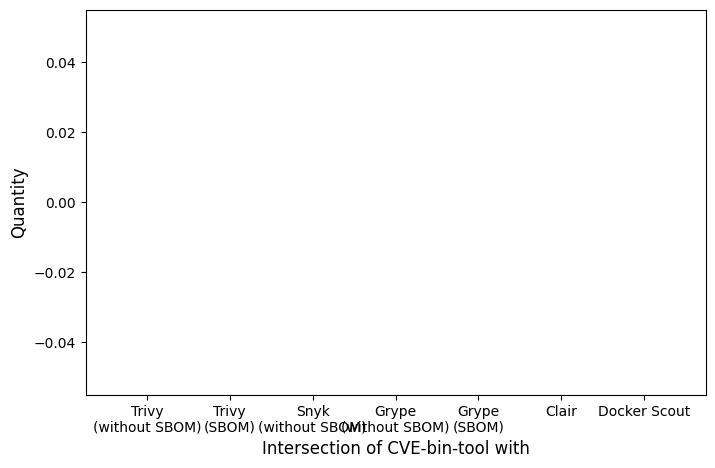

In [58]:
import matplotlib.pyplot as plt

computeclass_intersection_data = {
    "Intersection of CVE-bin-tool with": ["Trivy\n(without SBOM)", "Trivy\n(SBOM)", "Snyk\n(without SBOM)",
                                          "Grype\n(without SBOM)", "Grype\n(SBOM)", "Clair", "Docker Scout"],
    "Quantity": [len(computeclass_trivy_no_sbom_intersection), len(computeclass_trivy_sbom_intersection),
                 len(computeclass_snyk_no_sbom_intersection), len(computeclass_grype_no_sbom_intersection),
                 len(computeclass_grype_sbom_intersection), len(computeclass_clair_intersection),
                 len(computeclass_docker_scout_intersection)]
}

x = np.array(computeclass_intersection_data["Intersection of CVE-bin-tool with"])
y = np.array(computeclass_intersection_data["Quantity"])

plt.figure(figsize=(8, 5))
plt.xlabel('Intersection of CVE-bin-tool with', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.bar(x, y)
plt.show()

In [59]:
computeclass_data = {
    "trivy": len(computeclass_trivy),
    "trivy_sbom": len(computeclass_trivy_sbom),
    "snyk": len(computeclass_snyk_no_sbom),
    "grype": len(computeclass_grype_no_sbom),
    "grype_sbom": len(computeclass_grype_sbom),
    "clair": len(computeclass_clair),
    "docker_scout": len(computeclass_docker_scout),
    "cve_bin_tool": len(computeclass_cve_bin_tool),

    "trivy_intersection": len(computeclass_trivy_no_sbom_intersection),
    "trivy_sbom_intersection": len(computeclass_trivy_sbom_intersection),
    "snyk_intersection": len(computeclass_snyk_no_sbom_intersection),
    "grype_intersection": len(computeclass_grype_no_sbom_intersection),
    "grype_sbom_intersection": len(computeclass_grype_sbom_intersection),
    "clair_intersection": len(computeclass_clair_intersection),
    "docker_scout_intersection": len(computeclass_docker_scout_intersection),
}

# Aggregating results

In [53]:
import pandas as pd

data = {
    "Mem": []
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


In [60]:
community_results_data = [
    ("doughnutdough5/bangbangbang-lobby", lobby_data),
    ("balenalib/up-core-fedora-node", balenalib_data),
    ("vaibhavsingh007/rp_lyra", rp_lyra_data),
    ("psimler/myworkerservice", myworkerservice_data),
    ("binartist/mo-service-graph", mo_service_graph_data),
    ("kubesphere/whizard-telemetry-apiserver", kubesphere_data),
    ("hexlo/terraria-tmodloader-server", terraria_data),
    ("llidor1223/kaplatdb", kaplatdb_data),
    ("bytez/mlfoundations-dev_mistral_7b_0-3_oh-dcft-v3.1-llama-3.1-8b", bytez_data),
    ("tryuu/my-computeclass", computeclass_data),
]

In [95]:
images_results_data = [
    ("Memcached", memcached_data),
    ("Tensorflow", tensorflow_data),
    ("Nginx", nginx_data),
    ("Busybox", busybox_data),
    ("Alpine", alpine_data),
    ("Ubuntu", ubuntu_data),
    ("Redis", redis_data),
    ("Postgres", postgres_data),
    ("Python", python_data),
    ("Node", node_data),
    ("httpd", httpd_data),
    ("Mongo", mongo_data),
    ("RabbitMQ", rabbitmq_data),
    ("MariaDB", mariadb_data),
    ("Registry", registry_data),
    ("Debian", debian_data),
    ("PHP", php_data),
    ("CentOS", centos_data),
    ("InfluxDB", influxdb_data),
    ("Consul", consul_data),
    ("vulhub/activemq", activemq_data),
    ("vulhub/adminer", adminer_data),
    ("vulhub/apisix", apisix_data),
    ("vulhub/appweb", appweb_data),
    ("vulhub/aria2", aria2_data),
    ("vulhub/bash", bash_data),
    ("vulhub/cacti", cacti_data),
    ("vulhub/celery", celery_data),
    ("vulhub/cups_browsed_data", cups_browsed_data),
    ("vulhub/git", git_data),
]

In [96]:
import pandas as pd

df_data = {
    "Name": [],
    "Trivy (no SBOM)": [],
    "Trivy (scanning SBOM)": [],
    "Snyk (scanning SBOM)": [],
    "Grype (no SBOM)": [],
    "Grype (scanning SBOM)": [],
    "Clair": [],
    "Docker Scout": [],
    "CVE-bin-tool": [],

    # "Trivy (no SBOM) intersection": [],
    # "Trivy (scanning SBOM) intersection": [],
    # "Snyk (scanning SBOM) intersection": [],
    # "Grype (no SBOM) intersection": [],
    # "Grype (scanning SBOM) intersection": [],
    # "Clair intersection": [],
    # "Docker Scout intersection": [],
}

for image_data in images_results_data:
    print(image_data)
    
    a: str = 1

    name, data = image_data
    df_data["Name"].append(name)
    df_data["Trivy (no SBOM)"].append(data["trivy"])
    df_data["Trivy (scanning SBOM)"].append(data["trivy_sbom"])
    df_data["Snyk (scanning SBOM)"].append(data["snyk"])
    df_data["Grype (no SBOM)"].append(data["grype"])
    df_data["Grype (scanning SBOM)"].append(data["grype_sbom"])
    df_data["Clair"].append(data["clair"])
    df_data["Docker Scout"].append(data["docker_scout"])
    df_data["CVE-bin-tool"].append(data["cve_bin_tool"])
    # df_data["Trivy (no SBOM) intersection"].append(data["trivy_intersection"])
    # df_data["Trivy (scanning SBOM) intersection"].append(data["trivy_sbom_intersection"])
    # df_data["Snyk (scanning SBOM) intersection"].append(data["snyk_intersection"])
    # df_data["Grype (no SBOM) intersection"].append(data["grype_intersection"])
    # df_data["Grype (scanning SBOM) intersection"].append(data["grype_sbom_intersection"])
    # df_data["Clair intersection"].append(data["clair_intersection"])
    # df_data["Docker Scout intersection"].append(data["docker_scout_intersection"])

# Create a DataFrame
df = pd.DataFrame(df_data)

# Display the table
df

('Memcached', {'trivy': 75, 'trivy_sbom': 9, 'snyk': 160, 'grype': 70, 'grype_sbom': 66, 'clair': 69, 'docker_scout': 24, 'cve_bin_tool': 0, 'trivy_intersection': 0, 'trivy_sbom_intersection': 0, 'snyk_intersection': 0, 'grype_intersection': 0, 'grype_sbom_intersection': 0, 'clair_intersection': 0, 'docker_scout_intersection': 0})
('Tensorflow', {'trivy': 926, 'trivy_sbom': 37, 'snyk': 359, 'grype': 1271, 'grype_sbom': 1282, 'clair': 295, 'docker_scout': 779, 'cve_bin_tool': 87, 'trivy_intersection': 1, 'trivy_sbom_intersection': 3, 'snyk_intersection': 1, 'grype_intersection': 2, 'grype_sbom_intersection': 2, 'clair_intersection': 6, 'docker_scout_intersection': 3})
('Nginx', {'trivy': 141, 'trivy_sbom': 20, 'snyk': 291, 'grype': 136, 'grype_sbom': 134, 'clair': 137, 'docker_scout': 54, 'cve_bin_tool': 59, 'trivy_intersection': 13, 'trivy_sbom_intersection': 1, 'snyk_intersection': 13, 'grype_intersection': 13, 'grype_sbom_intersection': 13, 'clair_intersection': 13, 'docker_scout_int

,Name,Trivy (no SBOM),Trivy (scanning SBOM),Snyk (scanning SBOM),Grype (no SBOM),Grype (scanning SBOM),Clair,Docker Scout,CVE-bin-tool,Trivy (no SBOM) intersection,Trivy (scanning SBOM) intersection,Snyk (scanning SBOM) intersection,Grype (no SBOM) intersection,Grype (scanning SBOM) intersection,Clair intersection,Docker Scout intersection
0,Memcached,75,9,160,70,66,69,24,0,0,0,0,0,0,0,0
1,Tensorflow,926,37,359,1271,1282,295,779,87,1,3,1,2,2,6,3
2,Nginx,141,20,291,136,134,137,54,59,13,1,13,13,13,13,3
3,Busybox,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alpine,2,0,7,2,2,0,1,4,0,0,0,0,0,0,0
5,Ubuntu,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0
6,Redis,130,64,160,126,122,86,80,52,44,44,0,43,43,0,45
7,Postgres,193,71,297,188,184,149,92,50,44,44,0,43,43,0,45
8,Python,1119,57,1053,1086,1086,1095,123,86,46,5,62,46,46,46,6
9,Node,1085,56,1022,1052,1050,1060,113,85,46,5,64,46,46,46,6


In [276]:
df_data

{'Name': ['Memcached', 'Tensorflow'],
 'Trivy (no SBOM)': [],
 'Trivy (scanning SBOM)': [9, 37],
 'Snyk (scanning SBOM)': [160, 359],
 'Grype (no SBOM)': [70, 1271],
 'Grype (scanning SBOM)': [66, 1282],
 'Clair': [69, 295],
 'Docker Scout': [24, 779],
 'CVE-bin-tool': [0, 87],
 'Trivy (no SBOM) intersection': [0, 1],
 'Trivy (scanning SBOM) intersection': [0, 3],
 'Snyk (scanning SBOM) intersection': [0, 1],
 'Grype (no SBOM) intersection': [0, 2],
 'Grype (scanning SBOM) intersection': [0, 2],
 'Clair intersection': [0, 6],
 'Docker Scout intersection': [0, 3]}

In [62]:
import pandas as pd

community_df_data = {
    "Name": [],
    "Trivy (no SBOM)": [],
    "Trivy (scanning SBOM)": [],
    "Snyk (scanning SBOM)": [],
    "Grype (no SBOM)": [],
    "Grype (scanning SBOM)": [],
    "Clair": [],
    "Docker Scout": [],
    "CVE-bin-tool": [],

    # "Trivy (no SBOM) intersection": [],
    # "Trivy (scanning SBOM) intersection": [],
    # "Snyk (scanning SBOM) intersection": [],
    # "Grype (no SBOM) intersection": [],
    # "Grype (scanning SBOM) intersection": [],
    # "Clair intersection": [],
    # "Docker Scout intersection": [],
}

for community_image_data in community_results_data:
    name, data = community_image_data
    community_df_data["Name"].append(name)
    community_df_data["Trivy (no SBOM)"].append(data["trivy"])
    community_df_data["Trivy (scanning SBOM)"].append(data["trivy_sbom"])
    community_df_data["Snyk (scanning SBOM)"].append(data["snyk"])
    community_df_data["Grype (no SBOM)"].append(data["grype"])
    community_df_data["Grype (scanning SBOM)"].append(data["grype_sbom"])
    community_df_data["Clair"].append(data["clair"])
    community_df_data["Docker Scout"].append(data["docker_scout"])
    community_df_data["CVE-bin-tool"].append(data["cve_bin_tool"])
    # df_data["Trivy (no SBOM) intersection"].append(data["trivy_intersection"])
    # df_data["Trivy (scanning SBOM) intersection"].append(data["trivy_sbom_intersection"])
    # df_data["Snyk (scanning SBOM) intersection"].append(data["snyk_intersection"])
    # df_data["Grype (no SBOM) intersection"].append(data["grype_intersection"])
    # df_data["Grype (scanning SBOM) intersection"].append(data["grype_sbom_intersection"])
    # df_data["Clair intersection"].append(data["clair_intersection"])
    # df_data["Docker Scout intersection"].append(data["docker_scout_intersection"])

# Create a DataFrame
community_df = pd.DataFrame(community_df_data)

# Display the table
community_df

,Name,Trivy (no SBOM),Trivy (scanning SBOM),Snyk (scanning SBOM),Grype (no SBOM),Grype (scanning SBOM),Clair,Docker Scout,CVE-bin-tool
0,doughnutdough5/bangbangbang-lobby,86,27,183,116,116,0,42,99
1,balenalib/up-core-fedora-node,6,6,10,19,19,0,6,123
2,vaibhavsingh007/rp_lyra,752,48,538,731,731,730,68,39
3,psimler/myworkerservice,71,9,148,66,66,71,24,0
4,binartist/mo-service-graph,5,3,7,5,5,0,6,5
5,kubesphere/whizard-telemetry-apiserver,2,2,0,1,1,2,2,0
6,hexlo/terraria-tmodloader-server,5,0,0,1,1,0,1,10
7,llidor1223/kaplatdb,4536,250,3085,2686,2687,2,28,509
8,bytez/mlfoundations-dev_mistral_7b_0-3_oh-dcft...,161,33,319,171,175,0,72,87
9,tryuu/my-computeclass,1,1,0,1,1,0,2,0


In [65]:
community_df_intersection_data = {
    "Name": [],
    # "Trivy (no SBOM)": [],
    # "Trivy (scanning SBOM)": [],
    # "Snyk (scanning SBOM)": [],
    # "Grype (no SBOM)": [],
    # "Grype (scanning SBOM)": [],
    # "Clair": [],
    # "Docker Scout": [],
    # "CVE-bin-tool": [],

    "Trivy (no SBOM) intersection": [],
    "Trivy (scanning SBOM) intersection": [],
    "Snyk (scanning SBOM) intersection": [],
    "Grype (no SBOM) intersection": [],
    "Grype (scanning SBOM) intersection": [],
    "Clair intersection": [],
    "Docker Scout intersection": [],
}

for community_image_data in community_results_data:
    name, data = community_image_data
    community_df_intersection_data["Name"].append(name)
    # community_df_intersection_data["Trivy (no SBOM)"].append(data["trivy"])
    # community_df_intersection_data["Trivy (scanning SBOM)"].append(data["trivy_sbom"])
    # community_df_intersection_data["Snyk (scanning SBOM)"].append(data["snyk"])
    # community_df_intersection_data["Grype (no SBOM)"].append(data["grype"])
    # community_df_intersection_data["Grype (scanning SBOM)"].append(data["grype_sbom"])
    # community_df_intersection_data["Clair"].append(data["clair"])
    # community_df_intersection_data["Docker Scout"].append(data["docker_scout"])
    # community_df_intersection_data["CVE-bin-tool"].append(data["cve_bin_tool"])
    community_df_intersection_data["Trivy (no SBOM) intersection"].append(data["trivy_intersection"])
    community_df_intersection_data["Trivy (scanning SBOM) intersection"].append(data["trivy_sbom_intersection"])
    community_df_intersection_data["Snyk (scanning SBOM) intersection"].append(data["snyk_intersection"])
    community_df_intersection_data["Grype (no SBOM) intersection"].append(data["grype_intersection"])
    community_df_intersection_data["Grype (scanning SBOM) intersection"].append(data["grype_sbom_intersection"])
    community_df_intersection_data["Clair intersection"].append(data["clair_intersection"])
    community_df_intersection_data["Docker Scout intersection"].append(data["docker_scout_intersection"])

# Create a DataFrame
community_df_intersection = pd.DataFrame(community_df_intersection_data)

# Display the table
community_df_intersection

,Name,Trivy (no SBOM) intersection,Trivy (scanning SBOM) intersection,Snyk (scanning SBOM) intersection,Grype (no SBOM) intersection,Grype (scanning SBOM) intersection,Clair intersection,Docker Scout intersection
0,doughnutdough5/bangbangbang-lobby,11,11,11,12,12,0,11
1,balenalib/up-core-fedora-node,0,0,0,0,0,0,0
2,vaibhavsingh007/rp_lyra,0,0,0,0,0,0,0
3,psimler/myworkerservice,0,0,0,0,0,0,0
4,binartist/mo-service-graph,0,0,0,0,0,0,0
5,kubesphere/whizard-telemetry-apiserver,0,0,0,0,0,0,0
6,hexlo/terraria-tmodloader-server,0,0,0,0,0,0,0
7,llidor1223/kaplatdb,522,94,907,475,475,0,9
8,bytez/mlfoundations-dev_mistral_7b_0-3_oh-dcft...,1,1,1,2,2,0,1
9,tryuu/my-computeclass,0,0,0,0,0,0,0
